# <center> Prediccion de Precios en Bienes Raices - Mercado Australiano - Regresion Avanzada

# Tabla de Contenido

1. [Introduccion](#Introduccion)
2. [Configuracion e Instalacion](#Configuracion-e-Instalacion)
3. [Entendimiento de los Datos](#Entendimiento-de-los-Datos)  
4. [Manipulacion y Limpieza de Datos](#Manipulacion-y-Limpieza-de-Datos)
    1. [Dropping Data](#Dropping-Data)
    2. [Derived Data](#Derived-Data)
5. [Analisis de Datos](#Analisis-de-Datos)
    1. [Analisis-Univariable](#Analisis-Univariable)
        1. [Plot Numeric Data](#Plot-Numeric-Data)
        2. [Plot Categorical Data](#Plot-Categorical-Data)
    2. [Analisis-Bivariable](#Analisis-Bivariable)
6. [Preparacion de Datos y Modelado](#Preparacion-de-Datos-y-Modelado)
    1. [Splitting data into Train Test](#Splitting-data-into-Train-Test)
7. [Construccion-del-Modelo](#Model-Building)
    1. [Ridge Regression](#Ridge-Regression)
    2. [Lasso Regression](#Lasso-Regression)
    3. [ElasticNet Regression](#ElasticNet-Regression)
8. [Conclusions y Observaciones](#Conclusiones-y-Observaciones)

# 1. Introduccion

### Integrates de Grupo:
* Katty Ode Paton(katty.ode@gmail.com)
* Daniel Olivera (3daniel.olivera@gmail.com)
* Maria Lucero Yañez Guzman (lyanezguz@gmail.com)



# 2. Configuracion e Instalacion

In [ ]:
# Importar Librerias Requeridas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import sys

# Importar Librerias de Machine Learning
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Importar Librerias de Estadistica
import statsmodels.api as stats
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

# Ignorar Alertas (Warnings)
import warnings
warnings.filterwarnings('ignore')

# Definir precision del FLOAT a dos digitos.
pd.options.display.float_format = '{:.2f}'.format

# Establecer max_output a None para mostrar todas las salidas
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [ ]:
# Leer el DATASET CSV con en un Dataframe.

# Direccion relativa del Dataset
DATA_FILE_PATH = 'dataset.csv'

raw_data = pd.read_csv(DATA_FILE_PATH)

# 3. Entendimiento de los datos

Una empresa de vivienda con sede en EE. UU. llamada Surprise Housing ha decidido ingresar al mercado australiano. La empresa utiliza el análisis de datos para comprar casas a un precio inferior a sus valores reales y venderlas a un precio más alto. Con el mismo propósito, la empresa ha recopilado un conjunto de datos de la venta de casas en Australia. Los datos se proporcionan en el archivo CSV a continuación.

La compañía está buscando posibles propiedades para comprar e ingresar al mercado. Debe construir un modelo de regresión utilizando la regularización para predecir el valor real de las posibles propiedades y decidir si invertir en ellas o no.

La empresa quiere saber:

* Qué variables son significativas para predecir el precio de una casa, y
* Qué tan bien esas variables describen el precio de una casa.

Además, determine el valor óptimo de lambda para la regresión de Ridge y Lasso.

### Objetivo del Negocio:

Debe modelar el precio de las casas con las variables independientes disponibles. Luego, la gerencia utilizará este modelo para comprender cómo varían exactamente los precios con las variables. En consecuencia, pueden manipular la estrategia de la empresa y concentrarse en áreas que generarán altos rendimientos. Además, el modelo será una buena manera para que la gerencia entienda la dinámica de precios de un nuevo mercado.

## Descripción de features

Cada descripcion de las catogerias mencionadas se encuentran en el archivo data_description.txt en la carpeta _data.

- MSSubClass: Tipo de vivienda a considerar en ela venta.	(Categórica)
- MSZoning: Casificacion de zona de la venta (Categórica).
- LotFrontage: Pies lineales de calle conectados a la propiedad (Continua)
- LotArea: Area de la propiedad en pies cuadrados (Continua)
- Street: Tipo de camino para acceder a la propiedad (Categórica)
- Alley: Tipo de paseo para acceder a la propiedad (Categórica)
- LotShape: Forma de la propiedad (Categórica)
- LandContour: Planitud de la propiedad (Categórica)
- Utilities: Tipo de servicios básicos disponibles (Categórica)
- LotConfig: Configuración de la propiedad.(Categórica)
- LandSlope: Pendiente de la propiedad (Categórica)
- Neighborhood: Ubicaciones físicas dentro de los límites de la ciudad de Ames (Categórica)
- Condition1: Condiciones de proximidad en la propiedad (Categórica)
- Condition2: Condiciones de proximidad en la propiedad (si tiene más de una) (Categórica)
- BldgType: Tipo de vivienda (Categórica)
- HouseStyle: Estilo de vivienda (Categórica)
- OverallQual: Califica el material y acabado de la vivienda (Categórica)
- OverallCond: Califica el estado general de la casa.(Categórica)
- YearBuilt: Original construction date (Categórica)
- YearRemodAdd: Fecha de remodelación o en su defecto construcción (Continua)
- RoofStyle: Tipo de Techo (Categórica)
- RoofMatl: Material del Techo (Categórica)
- Exterior1st: Cobertura exterior de la casa (Categórica)
- Exterior2nd: Cobertura exterior de la casa (si hay mas de un material) (Categórica)
- MasVnrType: Tipo de revistemiento de mampostería (Categórica)
- MasVnrArea: Área de revestimiento de mampostería en pies cuadrados (Continua)
- ExterQual: Calidad del material en el exterior (Categórica)
- ExterCond: Calidad actual del material en el exterior (Categórica)
- Foundation: Tipo de cimentación (Categórica)
- BsmtQual: Evalua la altura del sotano	(Categórica)
- BsmtCond: Evalua la condicion general del sotano (Categórica)
- BsmtExposure: Se refiere a paredes a nivel de jardín o de salida en el sotano.(Categórica)
- BsmtFinType1: Clasificación del área terminada del sótano Tipo 1 (Categórica)
- BsmtFinSF1: Area terminada en pies cuadrados del Tipo 1 (Continua)
- BsmtFinType2: Clasificación del área terminada del sótano Tipo 2 (Si hay mas de un tipo) (Categórica)
- BsmtFinSF2: Area terminada en pies cuadrados del Tipo 2 (Continua)
- BsmtUnfSF: Area no terminada del sotano en pies cuadrados (Continua)
- TotalBsmtSF: Area total de sotano en pies cuadrados (Continua)
- Heating: Tipo de calefaccion (Categórica)
- HeatingQC: Calidad y condicion de la calefacción (Categórica)
- CentralAir: Existe aire acondicionado central (Categórica)
- Electrical: Sistema electrico (Categórica)
- 1stFlrSF: Primer piso en pies cuadrados (Continua)
- 2ndFlrSF: Segundo piso en pies cuadrados (Continua)
- LowQualFinSF: Pies cuadrados con acabados de baja calidad (todos los pisos) (Continua)
- GrLivArea: Superficie habitable sobre el nivel del suelo (suelo) en pies cuadrados (Continua)
- BsmtFullBath: Baños enteros en el sotano (Categorica)
- BsmtHalfBath: Medios baños en el sotano (Categorica)
- FullBath: Baños enteros en pisos superiores (Categorica)
- HalfBath: Medios baños en pisos superiores (Categorica)
- Bedroom: Dormitorios en pisos superiores (Categorica)
- Kitchen: Cocinas en pisos superiores (Categorica)
- KitchenQual: Calidad de cocina (Categorica)
- TotRmsAbvGrd: Total de habitaciones sobre rasante (no incluye baños) (Categorica)
- Functional: Funcionalidad del hogar (suponga que es típico a menos que se justifiquen deducciones)(Categorica)
- Fireplaces: Number of fireplaces (Categorica)
- FireplaceQu: Calidad de la chimenea (Categorica)
- GarageType: Ubicación de garaje (Categorica)
- GarageYrBlt: Año que se construyo el garaje (Continua)
- GarageFinish: Acabado interior del garaje. (Continua)
- GarageCars: Capacidad del garaje en cantidad de autos (Categorica)
- GarageArea: Area del garaje en pies cuadrados (Continua)
- GarageQual: Calidad de Garaje (Categorica)
- GarageCond: Condicion del Garaje (Categorica)
- PavedDrive: Camino pavimentado (Categorica)
- WoodDeckSF: Área de cubierta de madera en pies cuadrados (Continua)
- OpenPorchSF: Área abierta del porche en pies cuadrados (Continua)
- EnclosedPorch: Área de porche cerrado en pies cuadrados (Continua)
- 3SsnPorch: Área de porche de tres estaciones en pies cuadrados (Continua)
- ScreenPorch: Área del porche cubierto en pies cuadrados (Continua)
- PoolArea: Area de piscina en pies cuadrados (Continua)
- PoolQC: Calidad de piscina (Categorica)
- Fence: Calidad de la barda (Categorica)
- MiscFeature: Característica miscelánea no cubierta en otras categorías (Categorica)
- MiscVal: Valor monetario de caracteristica miscelanea (Continua)
- MoSold: Mes de venta (MM)(Categorica)
- YrSold: Año de Venta (YYYY) (Continua)
- SaleType: Tipo de venta (Categorica)
- SaleCondition: Condicion de la Venta (Categorica)


# 4. Manipulación y Limpieza de los Datos

In [ ]:
df_head_train = raw_data.head()
print(df_head_train, "\n")

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.00     8450   Pave   NaN      Reg   
1   2          20       RL        80.00     9600   Pave   NaN      Reg   
2   3          60       RL        68.00    11250   Pave   NaN      IR1   
3   4          70       RL        60.00     9550   Pave   NaN      IR1   
4   5          60       RL        84.00    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [ ]:
df_describe_train = raw_data.describe()
print(df_describe_train)

           Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
count 1460.00     1460.00      1201.00   1460.00      1460.00      1460.00   
mean   730.50       56.90        70.05  10516.83         6.10         5.58   
std    421.61       42.30        24.28   9981.26         1.38         1.11   
min      1.00       20.00        21.00   1300.00         1.00         1.00   
25%    365.75       20.00        59.00   7553.50         5.00         5.00   
50%    730.50       50.00        69.00   9478.50         6.00         5.00   
75%   1095.25       70.00        80.00  11601.50         7.00         6.00   
max   1460.00      190.00       313.00 215245.00        10.00         9.00   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
count    1460.00       1460.00     1452.00     1460.00  ...     1460.00   
mean     1971.27       1984.87      103.69      443.64  ...       94.24   
std        30.20         20.65      181.07      456.10  ...      125.34 

In [ ]:
print("El dataset train tiene: {} filas y {} columnas".format(raw_data.shape[0], raw_data.shape[1]))

El dataset train tiene: 1460 filas y 81 columnas


In [ ]:
def comprobar_valores_nulos(dataframe):
    valores_nulos = dataframe.isnull().sum()
    total_valores_nulos = valores_nulos.sum()
    if total_valores_nulos > 0:
        return f"Total de valores nulos en el DataFrame: {total_valores_nulos}"
    else:
        return "No existen valores nulos en el DataFrame."

In [ ]:
print("Tipo de dato por columna ")
for columna, tipo in zip(raw_data.columns, raw_data.dtypes):
    print(f"'{columna}':".ljust(20), tipo)

Tipo de dato por columna 
'Id':                int64
'MSSubClass':        int64
'MSZoning':          object
'LotFrontage':       float64
'LotArea':           int64
'Street':            object
'Alley':             object
'LotShape':          object
'LandContour':       object
'Utilities':         object
'LotConfig':         object
'LandSlope':         object
'Neighborhood':      object
'Condition1':        object
'Condition2':        object
'BldgType':          object
'HouseStyle':        object
'OverallQual':       int64
'OverallCond':       int64
'YearBuilt':         int64
'YearRemodAdd':      int64
'RoofStyle':         object
'RoofMatl':          object
'Exterior1st':       object
'Exterior2nd':       object
'MasVnrType':        object
'MasVnrArea':        float64
'ExterQual':         object
'ExterCond':         object
'Foundation':        object
'BsmtQual':          object
'BsmtCond':          object
'BsmtExposure':      object
'BsmtFinType1':      object
'BsmtFinSF1':        int64


In [ ]:
total_filas = len(raw_data)
for columna in raw_data.columns:
    valores_nulos = raw_data[columna].isnull().sum()
    porcentaje_faltantes = (valores_nulos / total_filas) * 100
    print(f"Cantidad de valores nulos en la columna '{columna}':".ljust(70), valores_nulos, "\t\t",f"{porcentaje_faltantes:.2f}%")

Cantidad de valores nulos en la columna 'Id':                          0 		 0.00%
Cantidad de valores nulos en la columna 'MSSubClass':                  0 		 0.00%
Cantidad de valores nulos en la columna 'MSZoning':                    0 		 0.00%
Cantidad de valores nulos en la columna 'LotFrontage':                 259 		 17.74%
Cantidad de valores nulos en la columna 'LotArea':                     0 		 0.00%
Cantidad de valores nulos en la columna 'Street':                      0 		 0.00%
Cantidad de valores nulos en la columna 'Alley':                       1369 		 93.77%
Cantidad de valores nulos en la columna 'LotShape':                    0 		 0.00%
Cantidad de valores nulos en la columna 'LandContour':                 0 		 0.00%
Cantidad de valores nulos en la columna 'Utilities':                   0 		 0.00%
Cantidad de valores nulos en la columna 'LotConfig':                   0 		 0.00%
Cantidad de valores nulos en la columna 'LandSlope':                   0 		 0.00%
Cantidad 

In [ ]:
resultado_comprobacion_original = comprobar_valores_nulos(raw_data)
print(resultado_comprobacion_original)

Total de valores nulos en el DataFrame: 6965


## 4.1 Dropping Data

Como primera consideración tenemos que:

* Alley         1369    (93.77%)
* FireplaceQu   690     (47.26%)
* PoolQC        1453    (99.52%)
* Fence         1179    (80.75%)
* MiscFeature   1406    (96.30%)

Tienen una gran cantidad de datos faltantes, por ende, serán eliminadas para el subsecuente estudio.

In [ ]:
# Eliminar columnas con valores nulos
columnas_a_eliminar = ['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
df = raw_data.drop(columnas_a_eliminar, axis=1)

In [ ]:
# Comprobar la cantidad de valores nulos luego de eliminar columnas
resultado_comprobacion_df = comprobar_valores_nulos(df)
print(resultado_comprobacion_df)

Total de valores nulos en el DataFrame: 868


In [ ]:
# mostrar columnas categoricas de tipo objeto y sus distintos valores
columnas_objeto = df.select_dtypes(include=['object'])
print("Categorías en columnas de tipo objeto:")
for columna in columnas_objeto.columns:
    categorias_unicas = raw_data[columna].unique()
    print(f"'{columna}':".ljust(20), str(columnas_objeto[columna].dtype), end="\t")

    for categoria in categorias_unicas:
        print(f"{categoria}, ", end="")
    print()

Categorías en columnas de tipo objeto:
'MSZoning':          object	RL, RM, C (all), FV, RH, 
'Street':            object	Pave, Grvl, 
'LotShape':          object	Reg, IR1, IR2, IR3, 
'LandContour':       object	Lvl, Bnk, Low, HLS, 
'Utilities':         object	AllPub, NoSeWa, 
'LotConfig':         object	Inside, FR2, Corner, CulDSac, FR3, 
'LandSlope':         object	Gtl, Mod, Sev, 
'Neighborhood':      object	CollgCr, Veenker, Crawfor, NoRidge, Mitchel, Somerst, NWAmes, OldTown, BrkSide, Sawyer, NridgHt, NAmes, SawyerW, IDOTRR, MeadowV, Edwards, Timber, Gilbert, StoneBr, ClearCr, NPkVill, Blmngtn, BrDale, SWISU, Blueste, 
'Condition1':        object	Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, PosA, RRNe, 
'Condition2':        object	Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, RRAe, 
'BldgType':          object	1Fam, 2fmCon, Duplex, TwnhsE, Twnhs, 
'HouseStyle':        object	2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl, 2.5Unf, 2.5Fin, 
'RoofStyle':         object	Gable, Hip, Gambrel

In [ ]:
# mostrar columnas categoricas de tipo objeto con valores nulos y sus distintos valores
columnas_objeto = df.select_dtypes(include=['object'])
columnas_con_valores_faltantes = []
print("Categorías en columnas de tipo objeto con valores faltantes:")
for columna in columnas_objeto.columns:
    valores_faltantes = df[columna].isnull().sum()  # Obtener la cantidad de valores faltantes
    if valores_faltantes > 0:
        columnas_con_valores_faltantes.append(columna)
        categorias_unicas = df[columna].unique()
        print(f"'{columna}':".ljust(20), str(columnas_objeto[columna].dtype), end="\t")

        for categoria in categorias_unicas:
            print(f"{categoria},", end="")

        print("\t".ljust(30), f"\t(nan: {valores_faltantes})")  # Agregar la cantidad de valores faltantes

Categorías en columnas de tipo objeto con valores faltantes:
'MasVnrType':        object	BrkFace,None,Stone,BrkCmn,nan,	                              	(nan: 8)
'BsmtQual':          object	Gd,TA,Ex,nan,Fa,	                              	(nan: 37)
'BsmtCond':          object	TA,Gd,nan,Fa,Po,	                              	(nan: 37)
'BsmtExposure':      object	No,Gd,Mn,Av,nan,	                              	(nan: 38)
'BsmtFinType1':      object	GLQ,ALQ,Unf,Rec,BLQ,nan,LwQ,	                              	(nan: 37)
'BsmtFinType2':      object	Unf,BLQ,nan,ALQ,Rec,LwQ,GLQ,	                              	(nan: 38)
'Electrical':        object	SBrkr,FuseF,FuseA,FuseP,Mix,nan,	                              	(nan: 1)
'GarageType':        object	Attchd,Detchd,BuiltIn,CarPort,nan,Basment,2Types,	                              	(nan: 81)
'GarageFinish':      object	RFn,Unf,Fin,nan,	                              	(nan: 81)
'GarageQual':        object	TA,Fa,Gd,nan,Ex,Po,	                              	(

In [ ]:
# Visualizar valores faltantes en variables continuas de tipo float
columnas_float = df.select_dtypes(include=['float'])
columnas_con_valores_faltantes_float = []
print("Resumen de valores faltantes en columnas de tipo float:")
for columna in columnas_float.columns:
    valores_faltantes_float = df[columna].isnull().sum()
    if valores_faltantes_float > 0:
        columnas_con_valores_faltantes_float.append(columna)
        print(f"'{columna}':".ljust(20), str(columnas_float[columna].dtype), "\tnan: ", valores_faltantes_float)

Resumen de valores faltantes en columnas de tipo float:
'LotFrontage':       float64 	nan:  259
'MasVnrArea':        float64 	nan:  8
'GarageYrBlt':       float64 	nan:  81


In [ ]:
# Visualizar valores faltantes en variables continuas de tipo int
columnas_objeto = df.select_dtypes(include=['int64'])
columnas_con_valores_faltantes = []

print("Categorías en columnas de tipo int64 con valores faltantes:")
for columna in columnas_objeto.columns:
    if df[columna].isnull().any():
        columnas_con_valores_faltantes.append(columna)
        categorias_unicas = df[columna].unique()
        print(f"'{columna}':".ljust(20), str(columnas_objeto[columna].dtype), end="\t")
        print()  # Agregar una línea en blanco para separar las categorías de diferentes columnas

Categorías en columnas de tipo int64 con valores faltantes:


* ###########################################

In [ ]:
# Nota 1 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' tienen una corr de -36.98%, -54.44%, 12.85% y 16.57% respectivamente, ademas que si 'GarageType' = NaN, 'GarageFinish', 'GarageQual', 'GarageCond' igual son NaN
# Se opta por eliminar dichas instancias.

df = df.dropna(subset=['GarageType'])

columnas_objeto = df.select_dtypes(include=['object'])
columnas_con_valores_faltantes = []
print("Categorías en columnas de tipo objeto con valores faltantes:")
for columna in columnas_objeto.columns:
    valores_faltantes = df[columna].isnull().sum()  # Obtener la cantidad de valores faltantes
    if valores_faltantes > 0:
        columnas_con_valores_faltantes.append(columna)
        categorias_unicas = df[columna].unique()
        print(f"'{columna}':".ljust(20), str(columnas_objeto[columna].dtype), end="\t")

        for categoria in categorias_unicas:
            print(f"{categoria},", end="")

        print("\t".ljust(30), f"\t(nan: {valores_faltantes})")  # Agregar la cantidad de valores faltantes

Categorías en columnas de tipo objeto con valores faltantes:
'MasVnrType':        object	BrkFace,None,Stone,BrkCmn,nan,	                              	(nan: 8)
'BsmtQual':          object	Gd,TA,Ex,nan,Fa,	                              	(nan: 30)
'BsmtCond':          object	TA,Gd,nan,Fa,Po,	                              	(nan: 30)
'BsmtExposure':      object	No,Gd,Mn,Av,nan,	                              	(nan: 31)
'BsmtFinType1':      object	GLQ,ALQ,Unf,Rec,BLQ,nan,LwQ,	                              	(nan: 30)
'BsmtFinType2':      object	Unf,BLQ,nan,ALQ,Rec,LwQ,GLQ,	                              	(nan: 31)
'Electrical':        object	SBrkr,FuseF,FuseA,FuseP,Mix,nan,	                              	(nan: 1)


In [ ]:
nan_values_mode = [
    'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'Electrical']

# Reemplazar los valores faltantes por la moda en cada columna
for columna in nan_values_mode:
    moda = df[columna].mode()[0]
    df[columna].fillna(moda, inplace=True)

# Verificar que ya no existen valores faltantes
print("Cantidad de valores faltantes en columnas de tipo objeto después de la sustitución:")
print(df[nan_values_mode].isnull().sum())

Cantidad de valores faltantes en columnas de tipo objeto después de la sustitución:
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
dtype: int64


In [ ]:
# Lista de columnas con valores faltantes
# Nota 1 'LotFrontage' tiene una corr de 33.4% con 'SalePrice', por lo que aplicar una media o mediana podría afectar el modelo de regresión, por lo que se opta por eliminar la columna.
# Nota 2 'GarageYrBlt' tiene una corr de 48.7% con 'SalePrice', por lo que aplicar una media o mediana podría afectar el modelo de regresión, por lo que se opta por eliminar la columna.

df = df.dropna(subset=['LotFrontage'])
df = df.dropna(subset=['GarageYrBlt'])

nan_values_float = ['MasVnrArea']

# Reemplazar los valores faltantes por el promedio en cada columna
for columna in nan_values_float:
    promedio = df[columna].mean()
    df[columna].fillna(promedio, inplace=True)

# Verificar que ya no existen valores faltantes
print("Cantidad de valores faltantes en columnas de tipo float después de la sustitución:")
print(df[nan_values_float].isnull().sum())


Cantidad de valores faltantes en columnas de tipo float después de la sustitución:
MasVnrArea    0
dtype: int64


In [ ]:
#Eliminando las columnas e instancias que no aportan valor del dataset tenemos que de 1460 instancias y 81 columnas pasamos a 1127 instancias y 75 columnas
raw_data.shape
df.shape

(1460, 81)

(1127, 75)

In [ ]:
resultado_final = comprobar_valores_nulos(df)
print(resultado_final)


No existen valores nulos en el DataFrame.


In [ ]:
#Al elimnar todos los registros con valores nulos, se redujo el dataset de 1460 a 1201 registros, lo cual hizo que 'Utilities' se transforme a una constante.
#Por lo que se procede a eliminar la columna 'Utilities' del dataset.
print(df['Utilities'].value_counts())
df = df.drop(['Utilities'], axis=1)

AllPub    1127
Name: Utilities, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dff = df.copy()


In [ ]:
## obtener una lista de columnas categoricas y numericas
cates = list()
numer = list()
for columna in dff.columns:
    if dff[columna].dtype == 'object' or dff[columna].dtype == 'int64':
        cates.append(columna)
    else:
        numer.append(columna)

In [ ]:
for columna in dff.columns:
    if dff[columna].dtype == 'object':
        dff[columna] = label_encoder.fit_transform(dff[columna])

In [ ]:
print("Tipo de dato por columna ")
for columna, tipo in zip(dff.columns, dff.dtypes):
    print(f"'{columna}':".ljust(20), tipo)

Tipo de dato por columna 
'MSSubClass':        int64
'MSZoning':          int64
'LotFrontage':       float64
'LotArea':           int64
'Street':            int64
'LotShape':          int64
'LandContour':       int64
'LotConfig':         int64
'LandSlope':         int64
'Neighborhood':      int64
'Condition1':        int64
'Condition2':        int64
'BldgType':          int64
'HouseStyle':        int64
'OverallQual':       int64
'OverallCond':       int64
'YearBuilt':         int64
'YearRemodAdd':      int64
'RoofStyle':         int64
'RoofMatl':          int64
'Exterior1st':       int64
'Exterior2nd':       int64
'MasVnrType':        int64
'MasVnrArea':        float64
'ExterQual':         int64
'ExterCond':         int64
'Foundation':        int64
'BsmtQual':          int64
'BsmtCond':          int64
'BsmtExposure':      int64
'BsmtFinType1':      int64
'BsmtFinSF1':        int64
'BsmtFinType2':      int64
'BsmtFinSF2':        int64
'BsmtUnfSF':         int64
'TotalBsmtSF':       int6

# 5. Analisis de Datos

<Figure size 5000x3000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Mapa de Calor de Correlación')

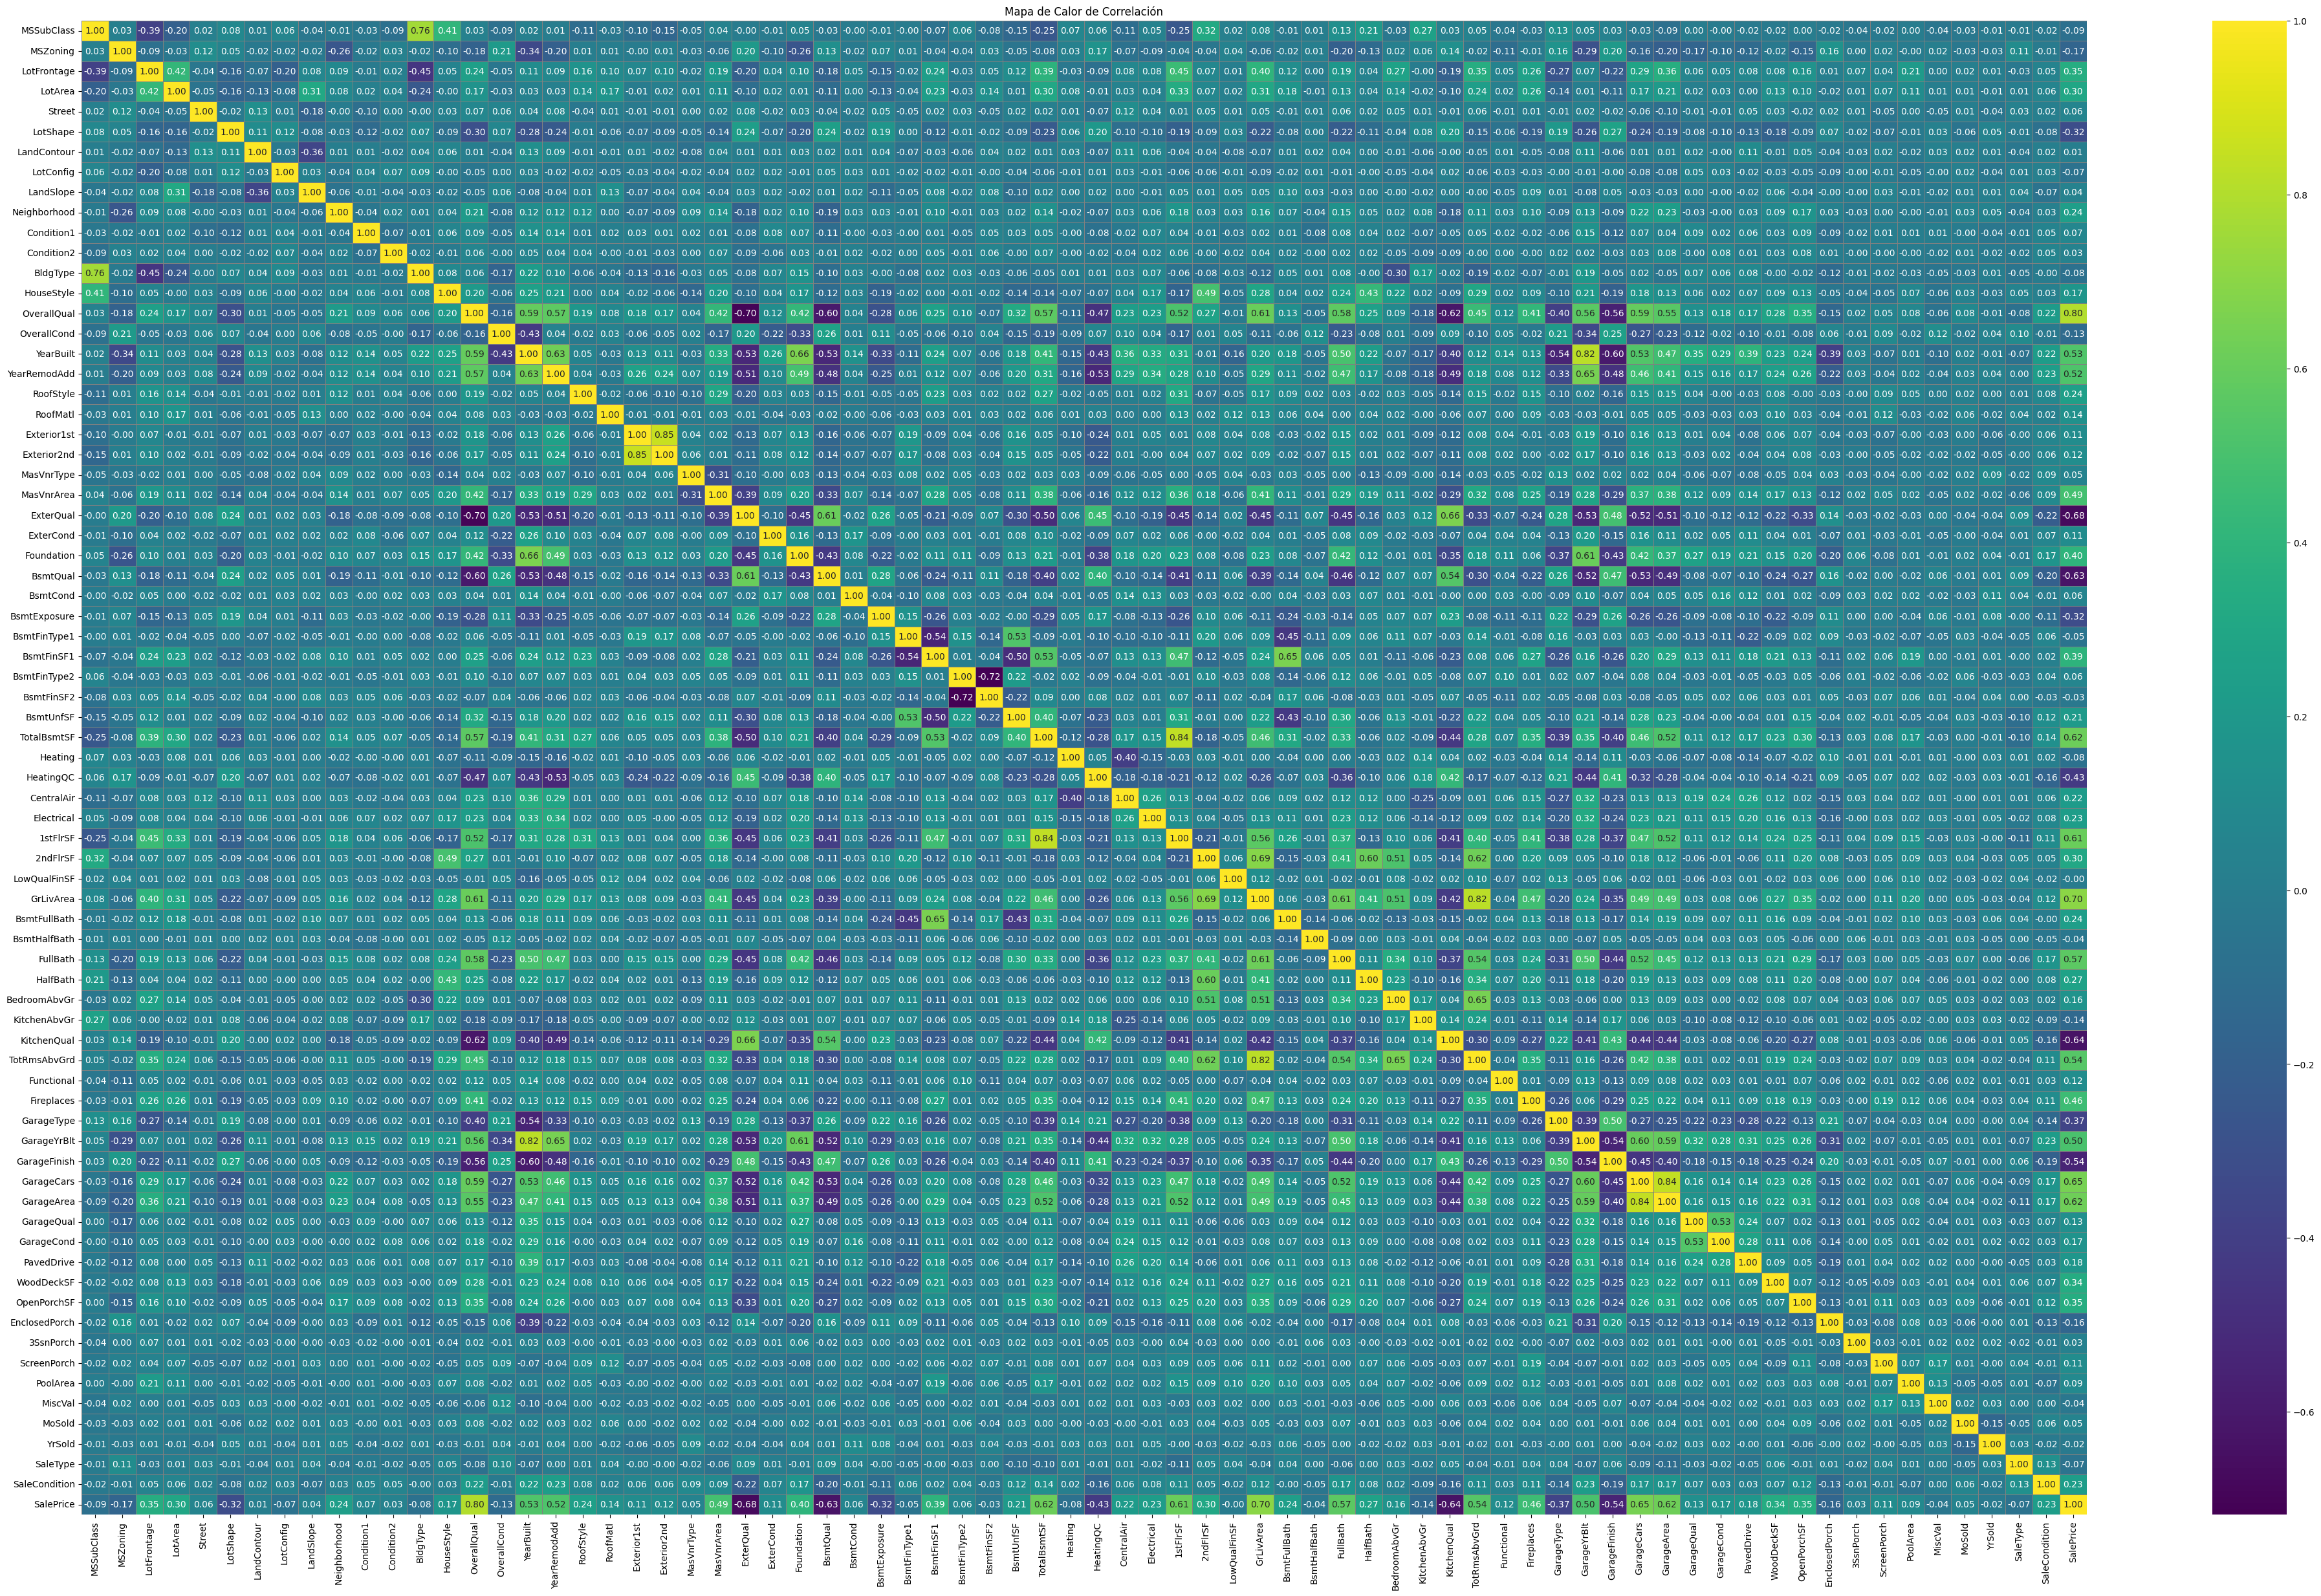

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = dff.corr()
plt.figure(figsize=(50, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title('Mapa de Calor de Correlación')
plt.show()


## 5.1 Analsis Univariable

### 5.1.1 Plot numeric data

In [ ]:
columnas_numericas = numer.copy()

# Palabras que deseas buscar en las cadenas porque pertenecen a columnas continuas
palabras_a_anadir = ["SF", "Area", "Year","EnclosedPorch","ScreenPorch","SalePrice","3SsnPorch","MiscVal"]

# Utiliza una comprensión de lista para remover las cadenas que contienen las palabras
nuevas = [cadena for cadena in cates if any(palabra in cadena for palabra in palabras_a_anadir)]
columnas_numericas = columnas_numericas + nuevas


print(len(columnas_numericas))
print(columnas_numericas)

23
['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


### BOX PLOT

Text(0.5, 0.98, 'Box plot')

<Axes: xlabel='LotFrontage'>

Text(0, 0.5, 'values')

Text(0.5, 0, 'LotFrontage')

<Axes: xlabel='MasVnrArea'>

Text(0, 0.5, 'values')

Text(0.5, 0, 'MasVnrArea')

<Axes: xlabel='GarageYrBlt'>

Text(0, 0.5, 'values')

Text(0.5, 0, 'GarageYrBlt')

<Axes: xlabel='LotArea'>

Text(0, 0.5, 'values')

Text(0.5, 0, 'LotArea')

<Axes: xlabel='YearBuilt'>

Text(0, 0.5, 'values')

Text(0.5, 0, 'YearBuilt')

<Axes: xlabel='YearRemodAdd'>

Text(0, 0.5, 'values')

Text(0.5, 0, 'YearRemodAdd')

<Axes: xlabel='BsmtFinSF1'>

Text(0, 0.5, 'values')

Text(0.5, 0, 'BsmtFinSF1')

<Axes: xlabel='BsmtFinSF2'>

Text(0, 0.5, 'values')

Text(0.5, 0, 'BsmtFinSF2')

<Axes: xlabel='BsmtUnfSF'>

Text(0, 0.5, 'values')

Text(0.5, 0, 'BsmtUnfSF')

<Axes: xlabel='TotalBsmtSF'>

Text(0, 0.5, 'values')

Text(0.5, 0, 'TotalBsmtSF')

<Axes: xlabel='1stFlrSF'>

Text(0, 0.5, 'values')

Text(0.5, 0, '1stFlrSF')

<Axes: xlabel='2ndFlrSF'>

Text(0, 0.5, 'values')

Text(0.5, 0, '2ndFlrSF')

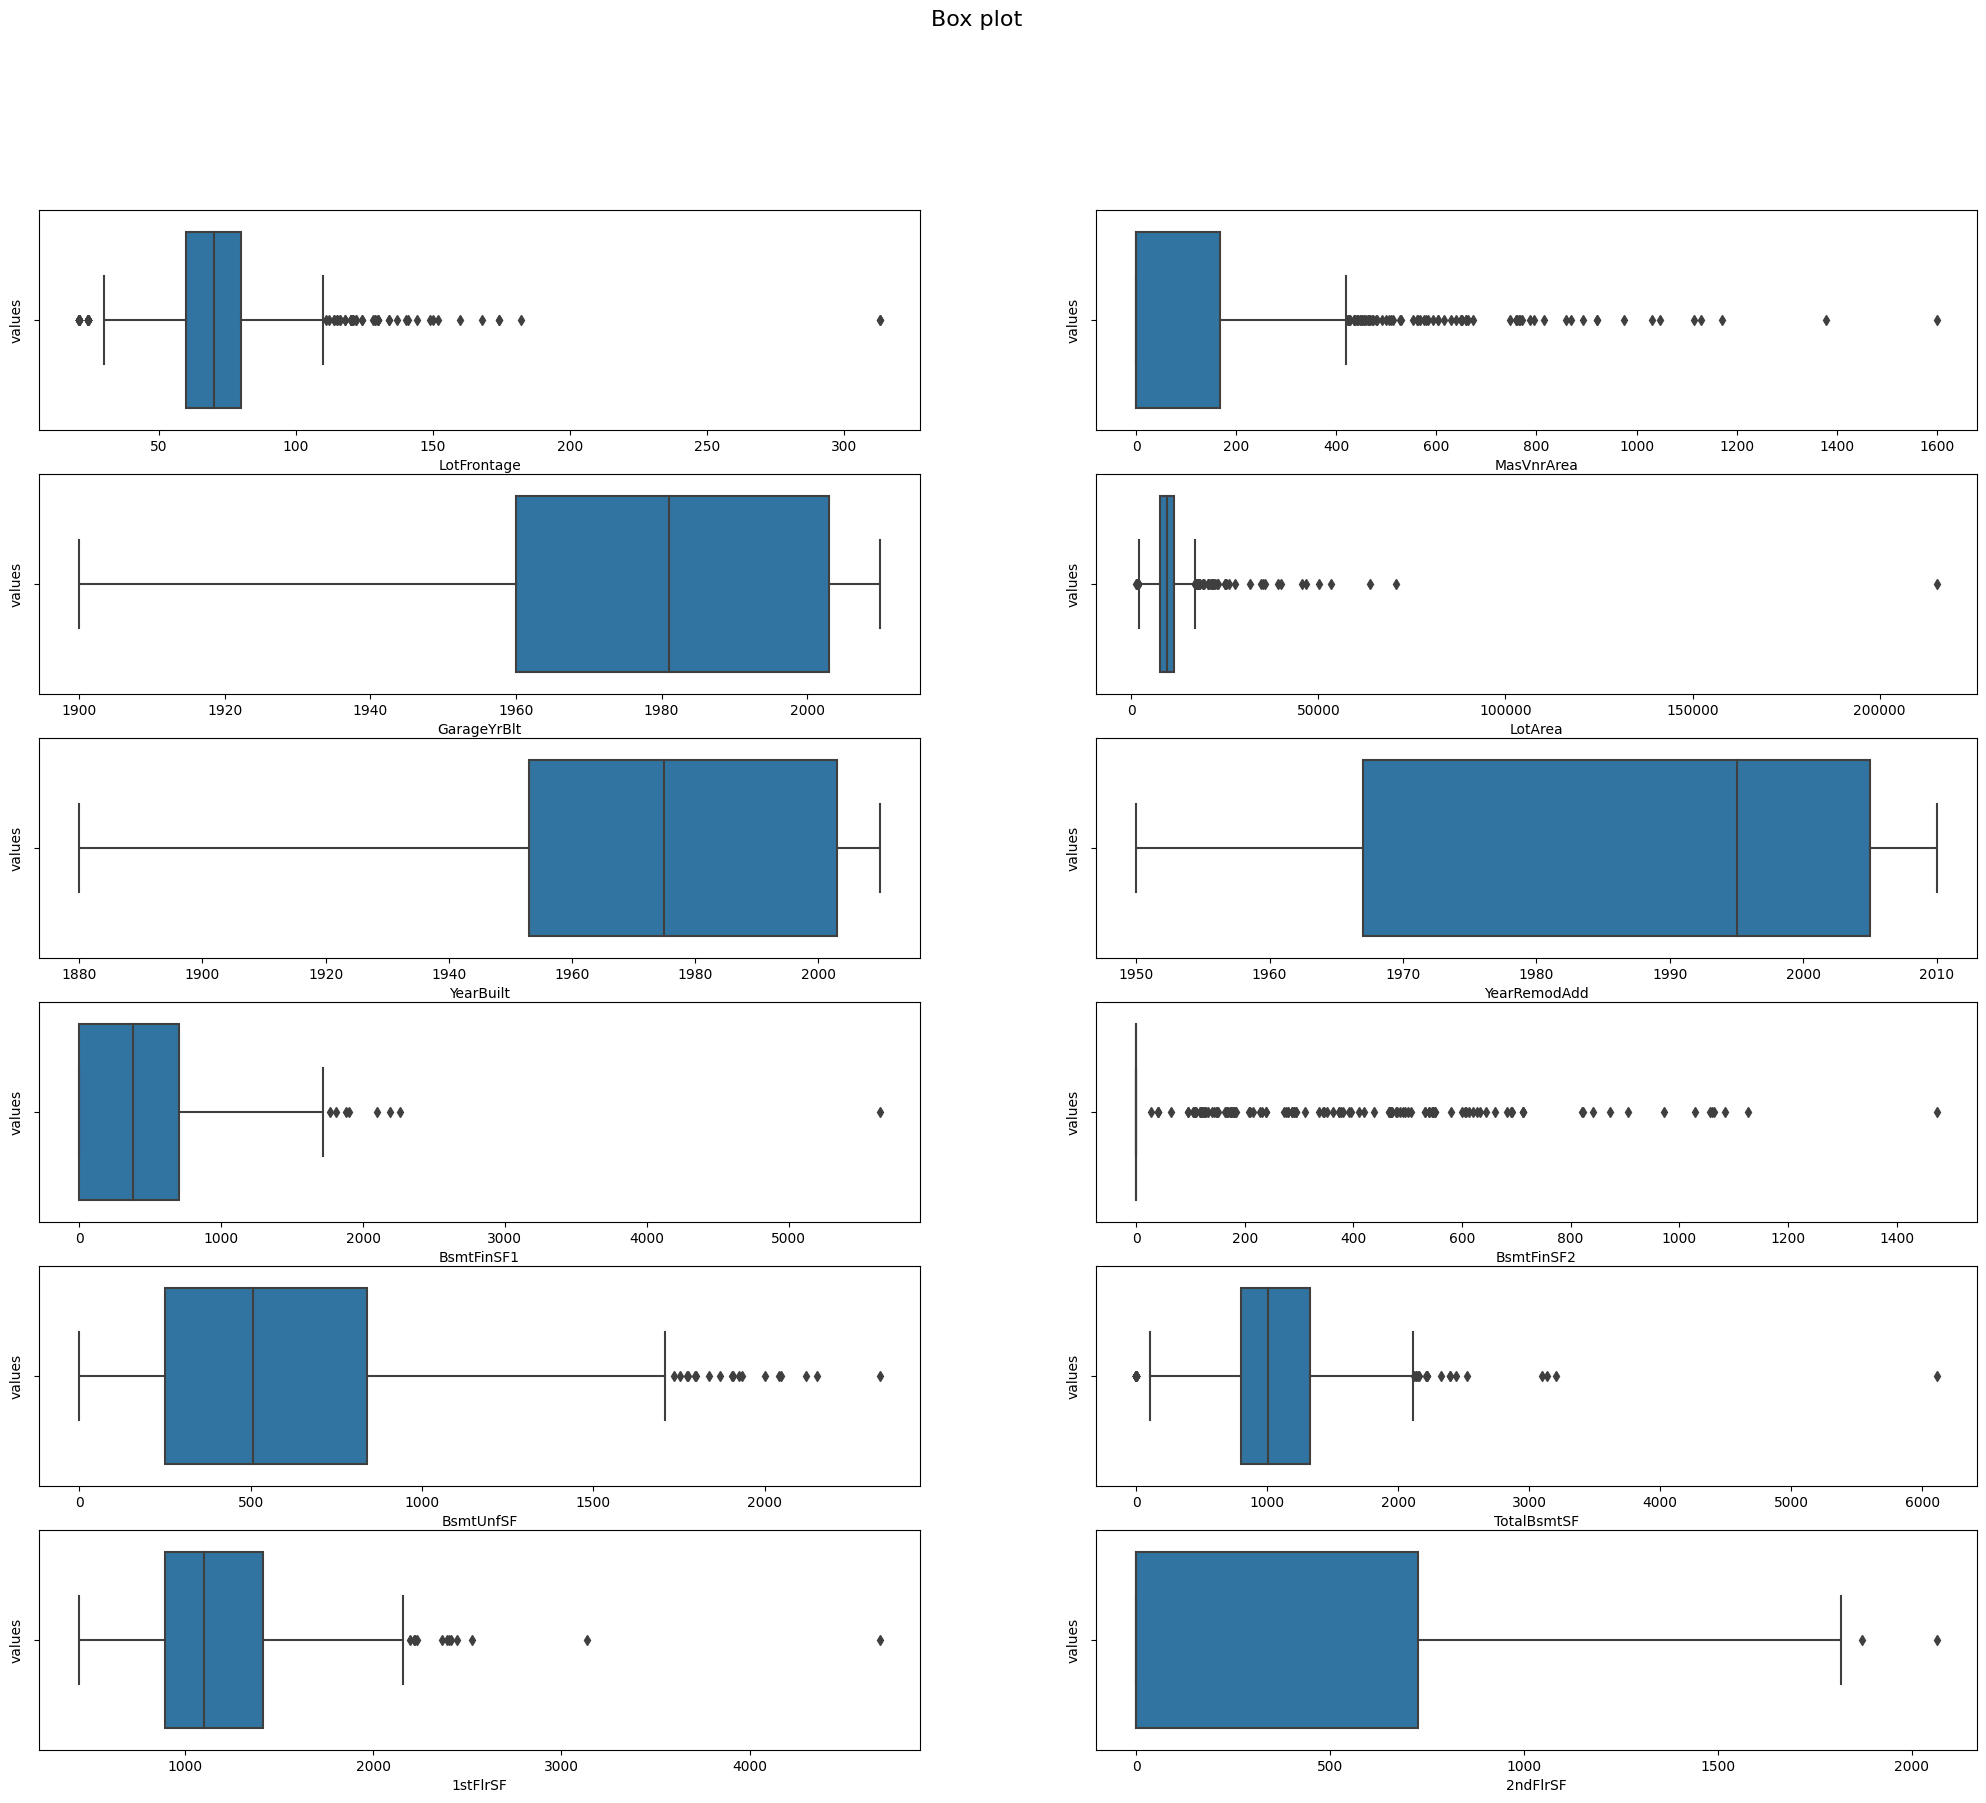

Text(0.5, 0.98, 'Box plot')

<Axes: xlabel='LowQualFinSF'>

Text(0, 0.5, 'values')

Text(0.5, 0, 'LowQualFinSF')

<Axes: xlabel='GrLivArea'>

Text(0, 0.5, 'values')

Text(0.5, 0, 'GrLivArea')

<Axes: xlabel='GarageArea'>

Text(0, 0.5, 'values')

Text(0.5, 0, 'GarageArea')

<Axes: xlabel='WoodDeckSF'>

Text(0, 0.5, 'values')

Text(0.5, 0, 'WoodDeckSF')

<Axes: xlabel='OpenPorchSF'>

Text(0, 0.5, 'values')

Text(0.5, 0, 'OpenPorchSF')

<Axes: xlabel='EnclosedPorch'>

Text(0, 0.5, 'values')

Text(0.5, 0, 'EnclosedPorch')

<Axes: xlabel='3SsnPorch'>

Text(0, 0.5, 'values')

Text(0.5, 0, '3SsnPorch')

<Axes: xlabel='ScreenPorch'>

Text(0, 0.5, 'values')

Text(0.5, 0, 'ScreenPorch')

<Axes: xlabel='PoolArea'>

Text(0, 0.5, 'values')

Text(0.5, 0, 'PoolArea')

<Axes: xlabel='MiscVal'>

Text(0, 0.5, 'values')

Text(0.5, 0, 'MiscVal')

<Axes: xlabel='SalePrice'>

Text(0, 0.5, 'values')

Text(0.5, 0, 'SalePrice')

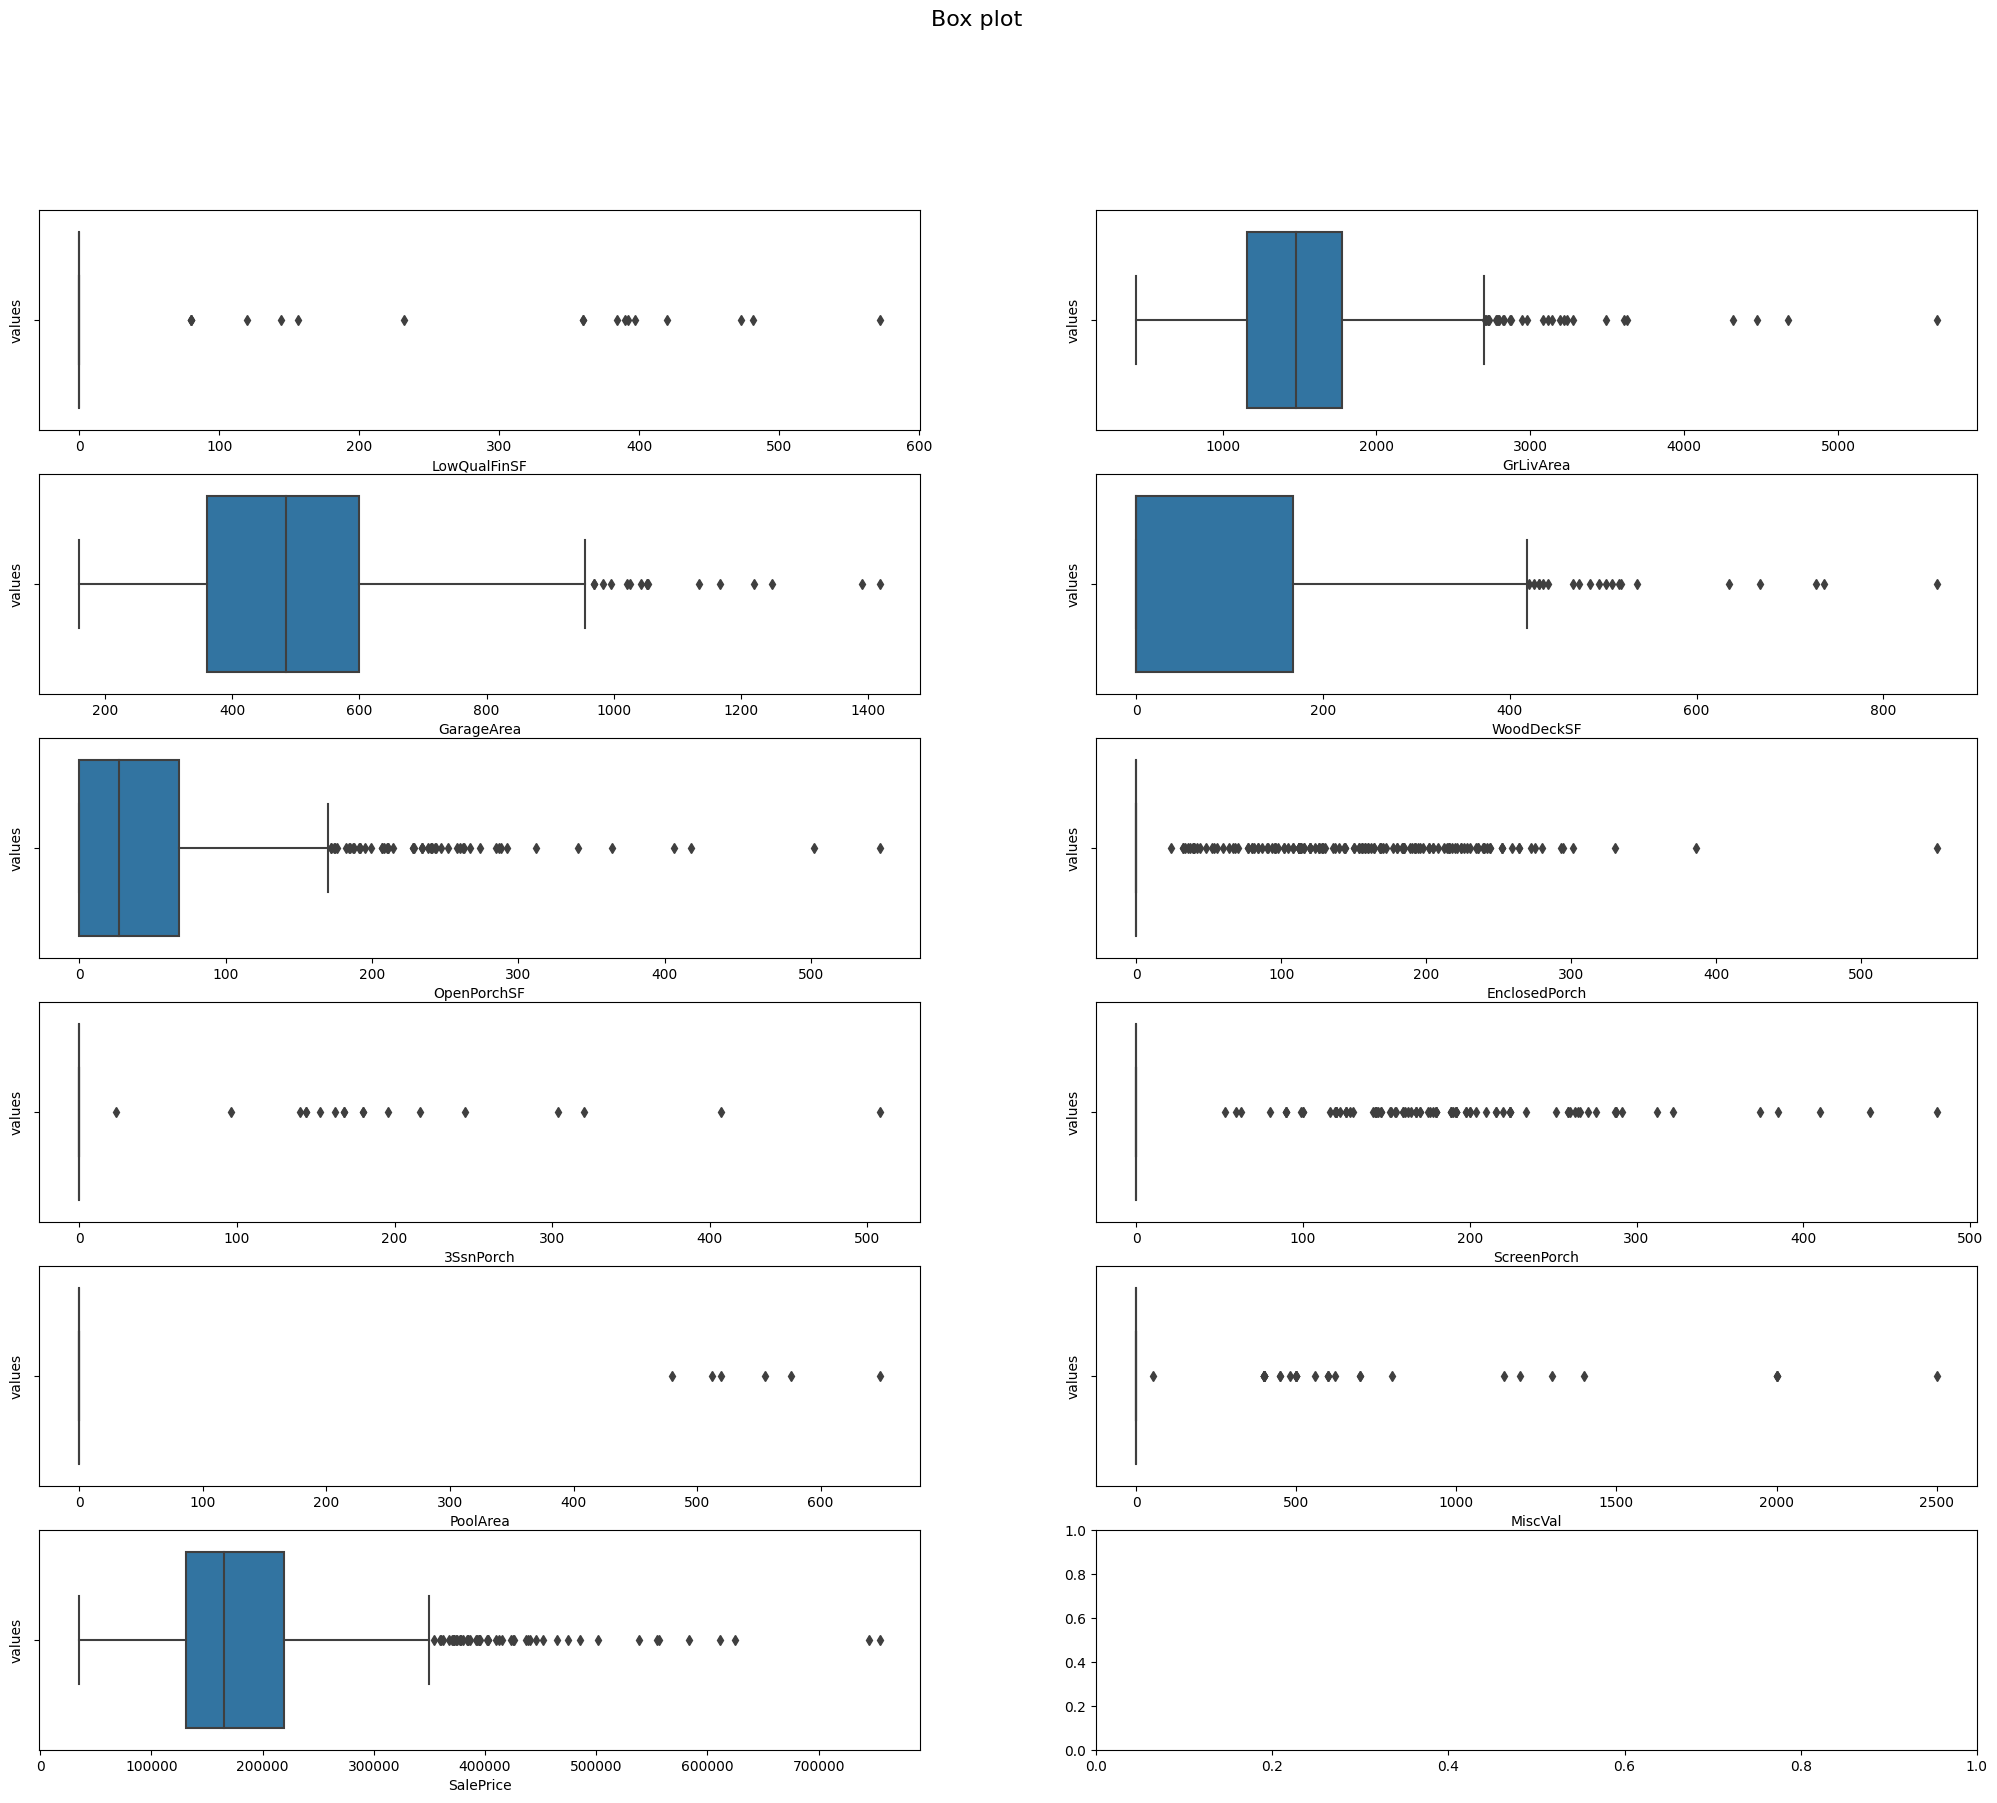

In [ ]:
## Imprimimos diagramas de cajas por cada columna numerica
for h  in range(0,len(columnas_numericas),12):
  colnume = columnas_numericas[h:h+12]
  # Create subplots
  fig, axes = plt.subplots(6, 2, figsize=(25, 20))
  fig.suptitle("Box plot", fontsize=16)

  for i, column_ in enumerate(colnume):
      row = i // 2
      col = i % 2
      sns.boxplot(x=df[column_], ax=axes[row, col])

      axes[row, col].set_ylabel("values")
      axes[row, col].set_xlabel(f"{column_}")

  # Show the plot
  plt.show()

### GRAFICAS DE DISTRIBUCION

Text(0.5, 0.98, 'Distribution plot')

<Axes: xlabel='LotFrontage', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, 'LotFrontage')

<Axes: xlabel='MasVnrArea', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, 'MasVnrArea')

<Axes: xlabel='GarageYrBlt', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, 'GarageYrBlt')

<Axes: xlabel='LotArea', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, 'LotArea')

<Axes: xlabel='YearBuilt', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, 'YearBuilt')

<Axes: xlabel='YearRemodAdd', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, 'YearRemodAdd')

<Axes: xlabel='BsmtFinSF1', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, 'BsmtFinSF1')

<Axes: xlabel='BsmtFinSF2', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, 'BsmtFinSF2')

<Axes: xlabel='BsmtUnfSF', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, 'BsmtUnfSF')

<Axes: xlabel='TotalBsmtSF', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, 'TotalBsmtSF')

<Axes: xlabel='1stFlrSF', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, '1stFlrSF')

<Axes: xlabel='2ndFlrSF', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, '2ndFlrSF')

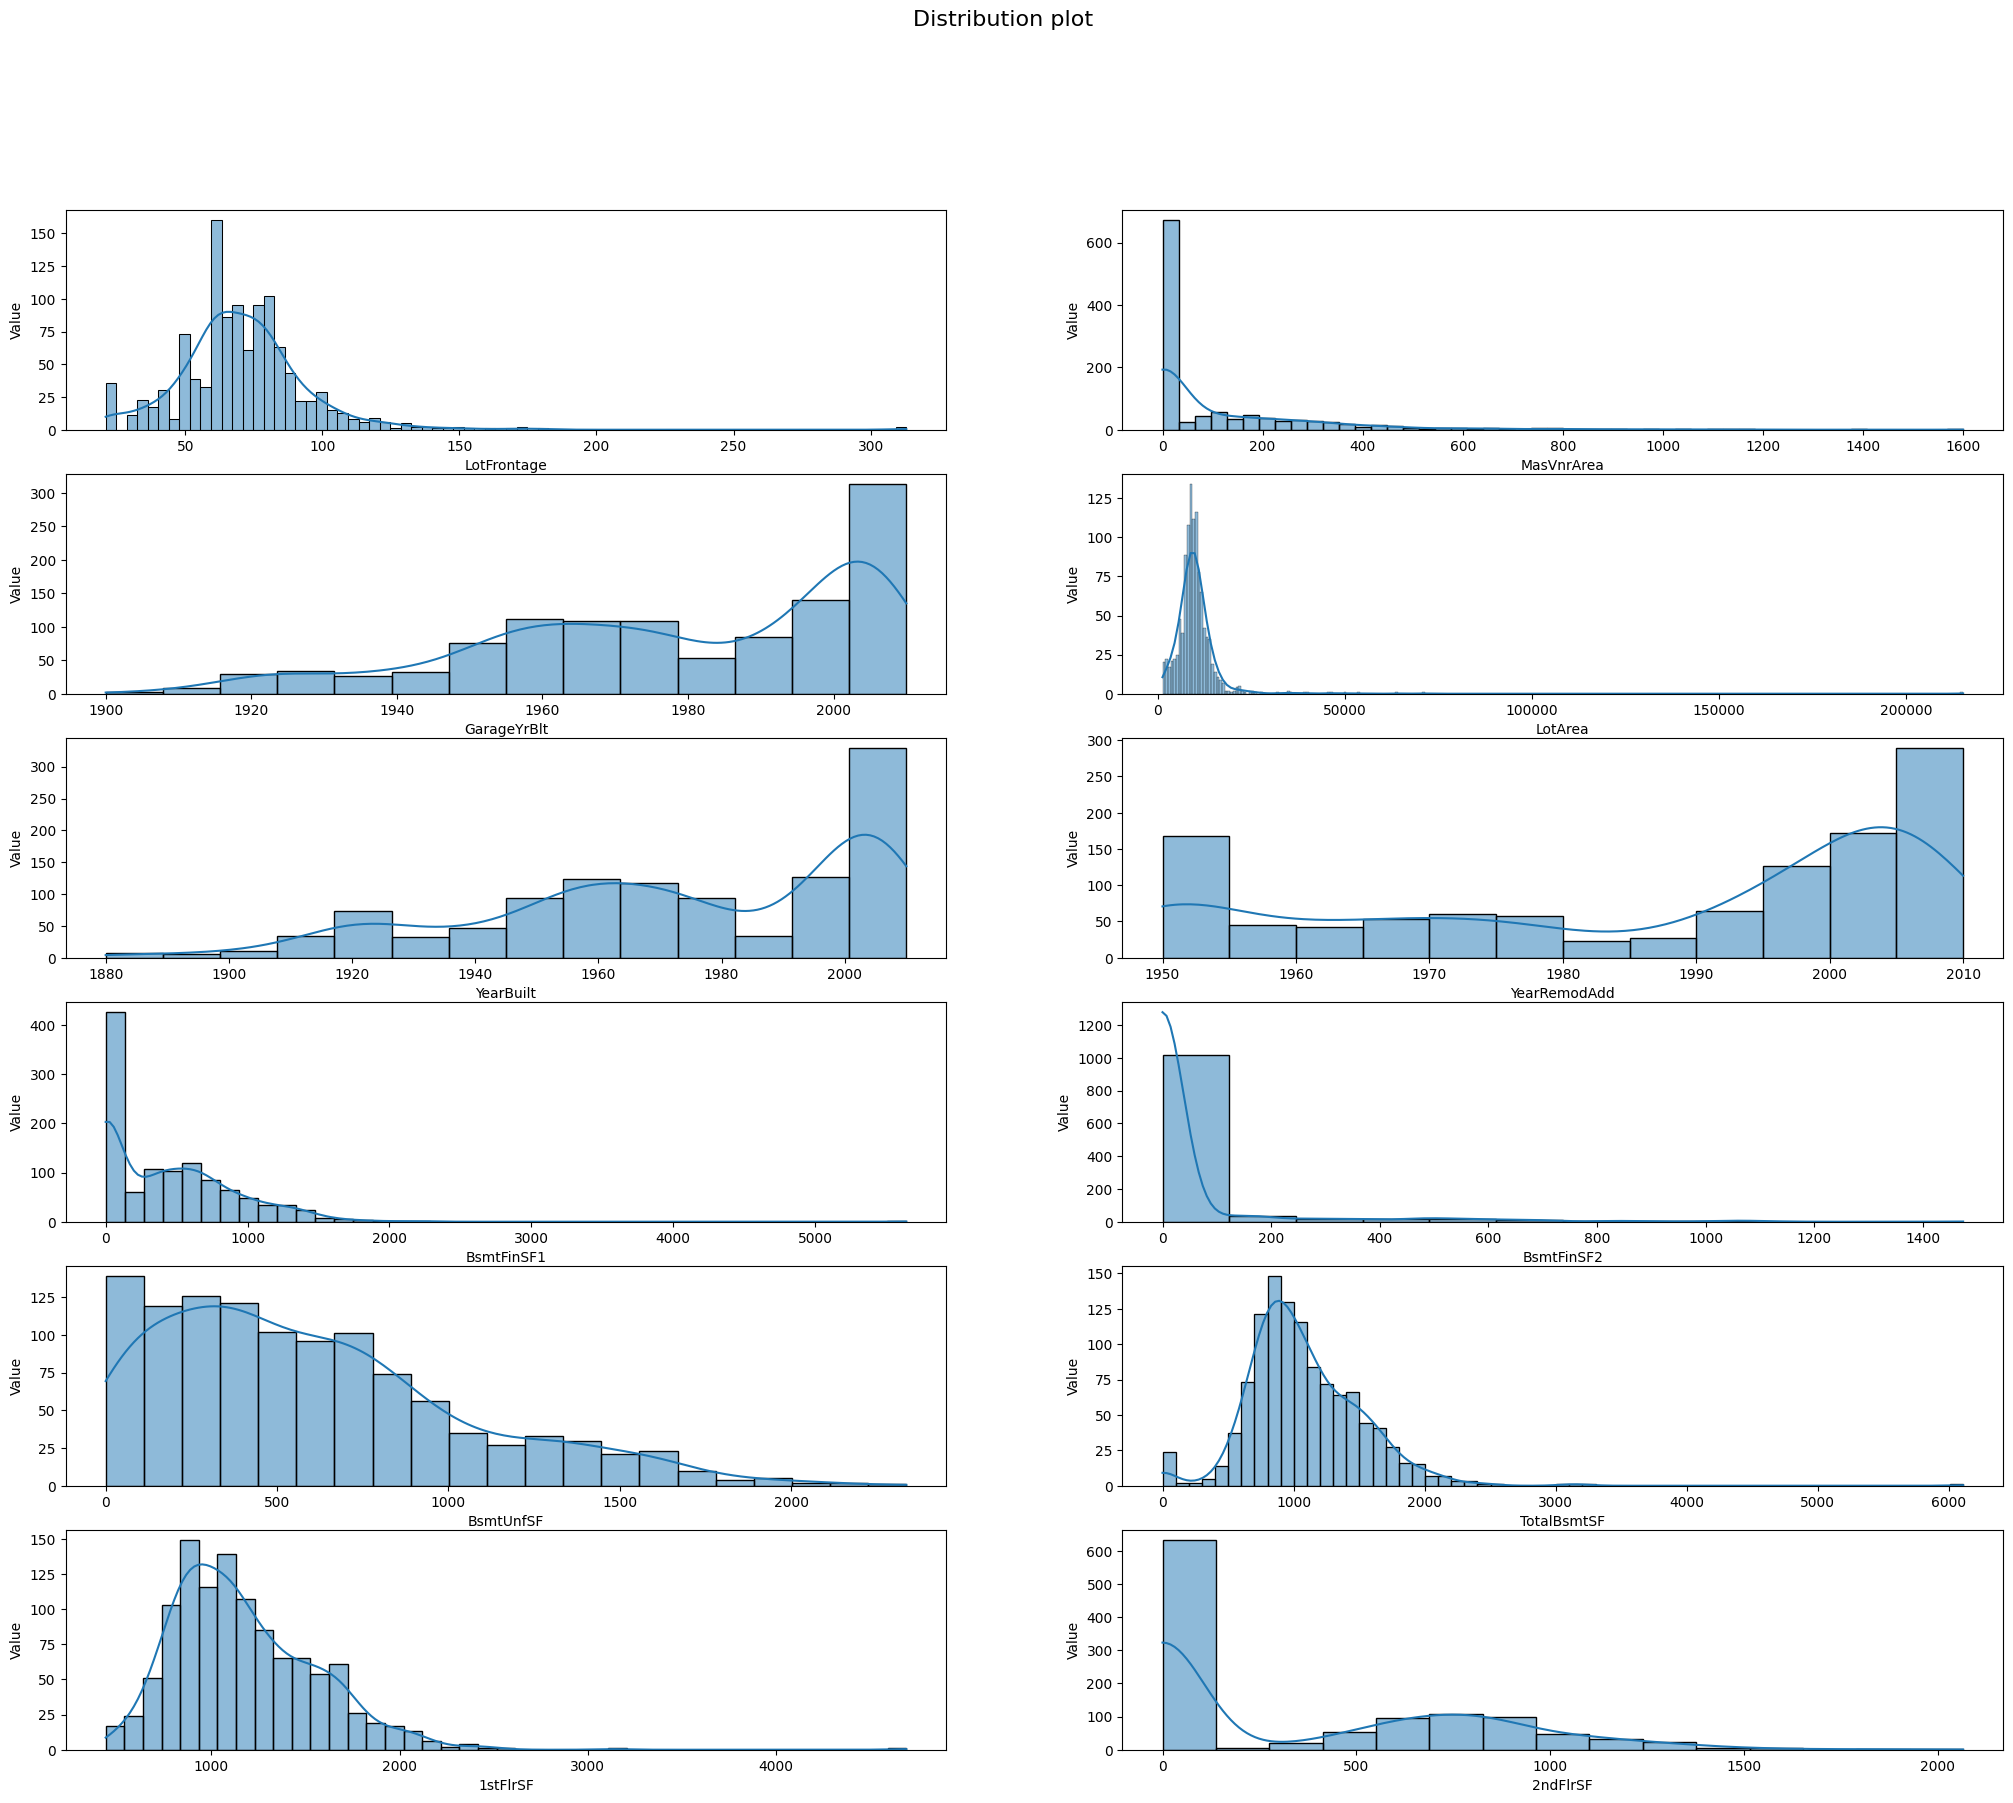

Text(0.5, 0.98, 'Distribution plot')

<Axes: xlabel='LowQualFinSF', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, 'LowQualFinSF')

<Axes: xlabel='GrLivArea', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, 'GrLivArea')

<Axes: xlabel='GarageArea', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, 'GarageArea')

<Axes: xlabel='WoodDeckSF', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, 'WoodDeckSF')

<Axes: xlabel='OpenPorchSF', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, 'OpenPorchSF')

<Axes: xlabel='EnclosedPorch', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, 'EnclosedPorch')

<Axes: xlabel='3SsnPorch', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, '3SsnPorch')

<Axes: xlabel='ScreenPorch', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, 'ScreenPorch')

<Axes: xlabel='PoolArea', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, 'PoolArea')

<Axes: xlabel='MiscVal', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, 'MiscVal')

<Axes: xlabel='SalePrice', ylabel='Count'>

Text(0, 0.5, 'Value')

Text(0.5, 0, 'SalePrice')

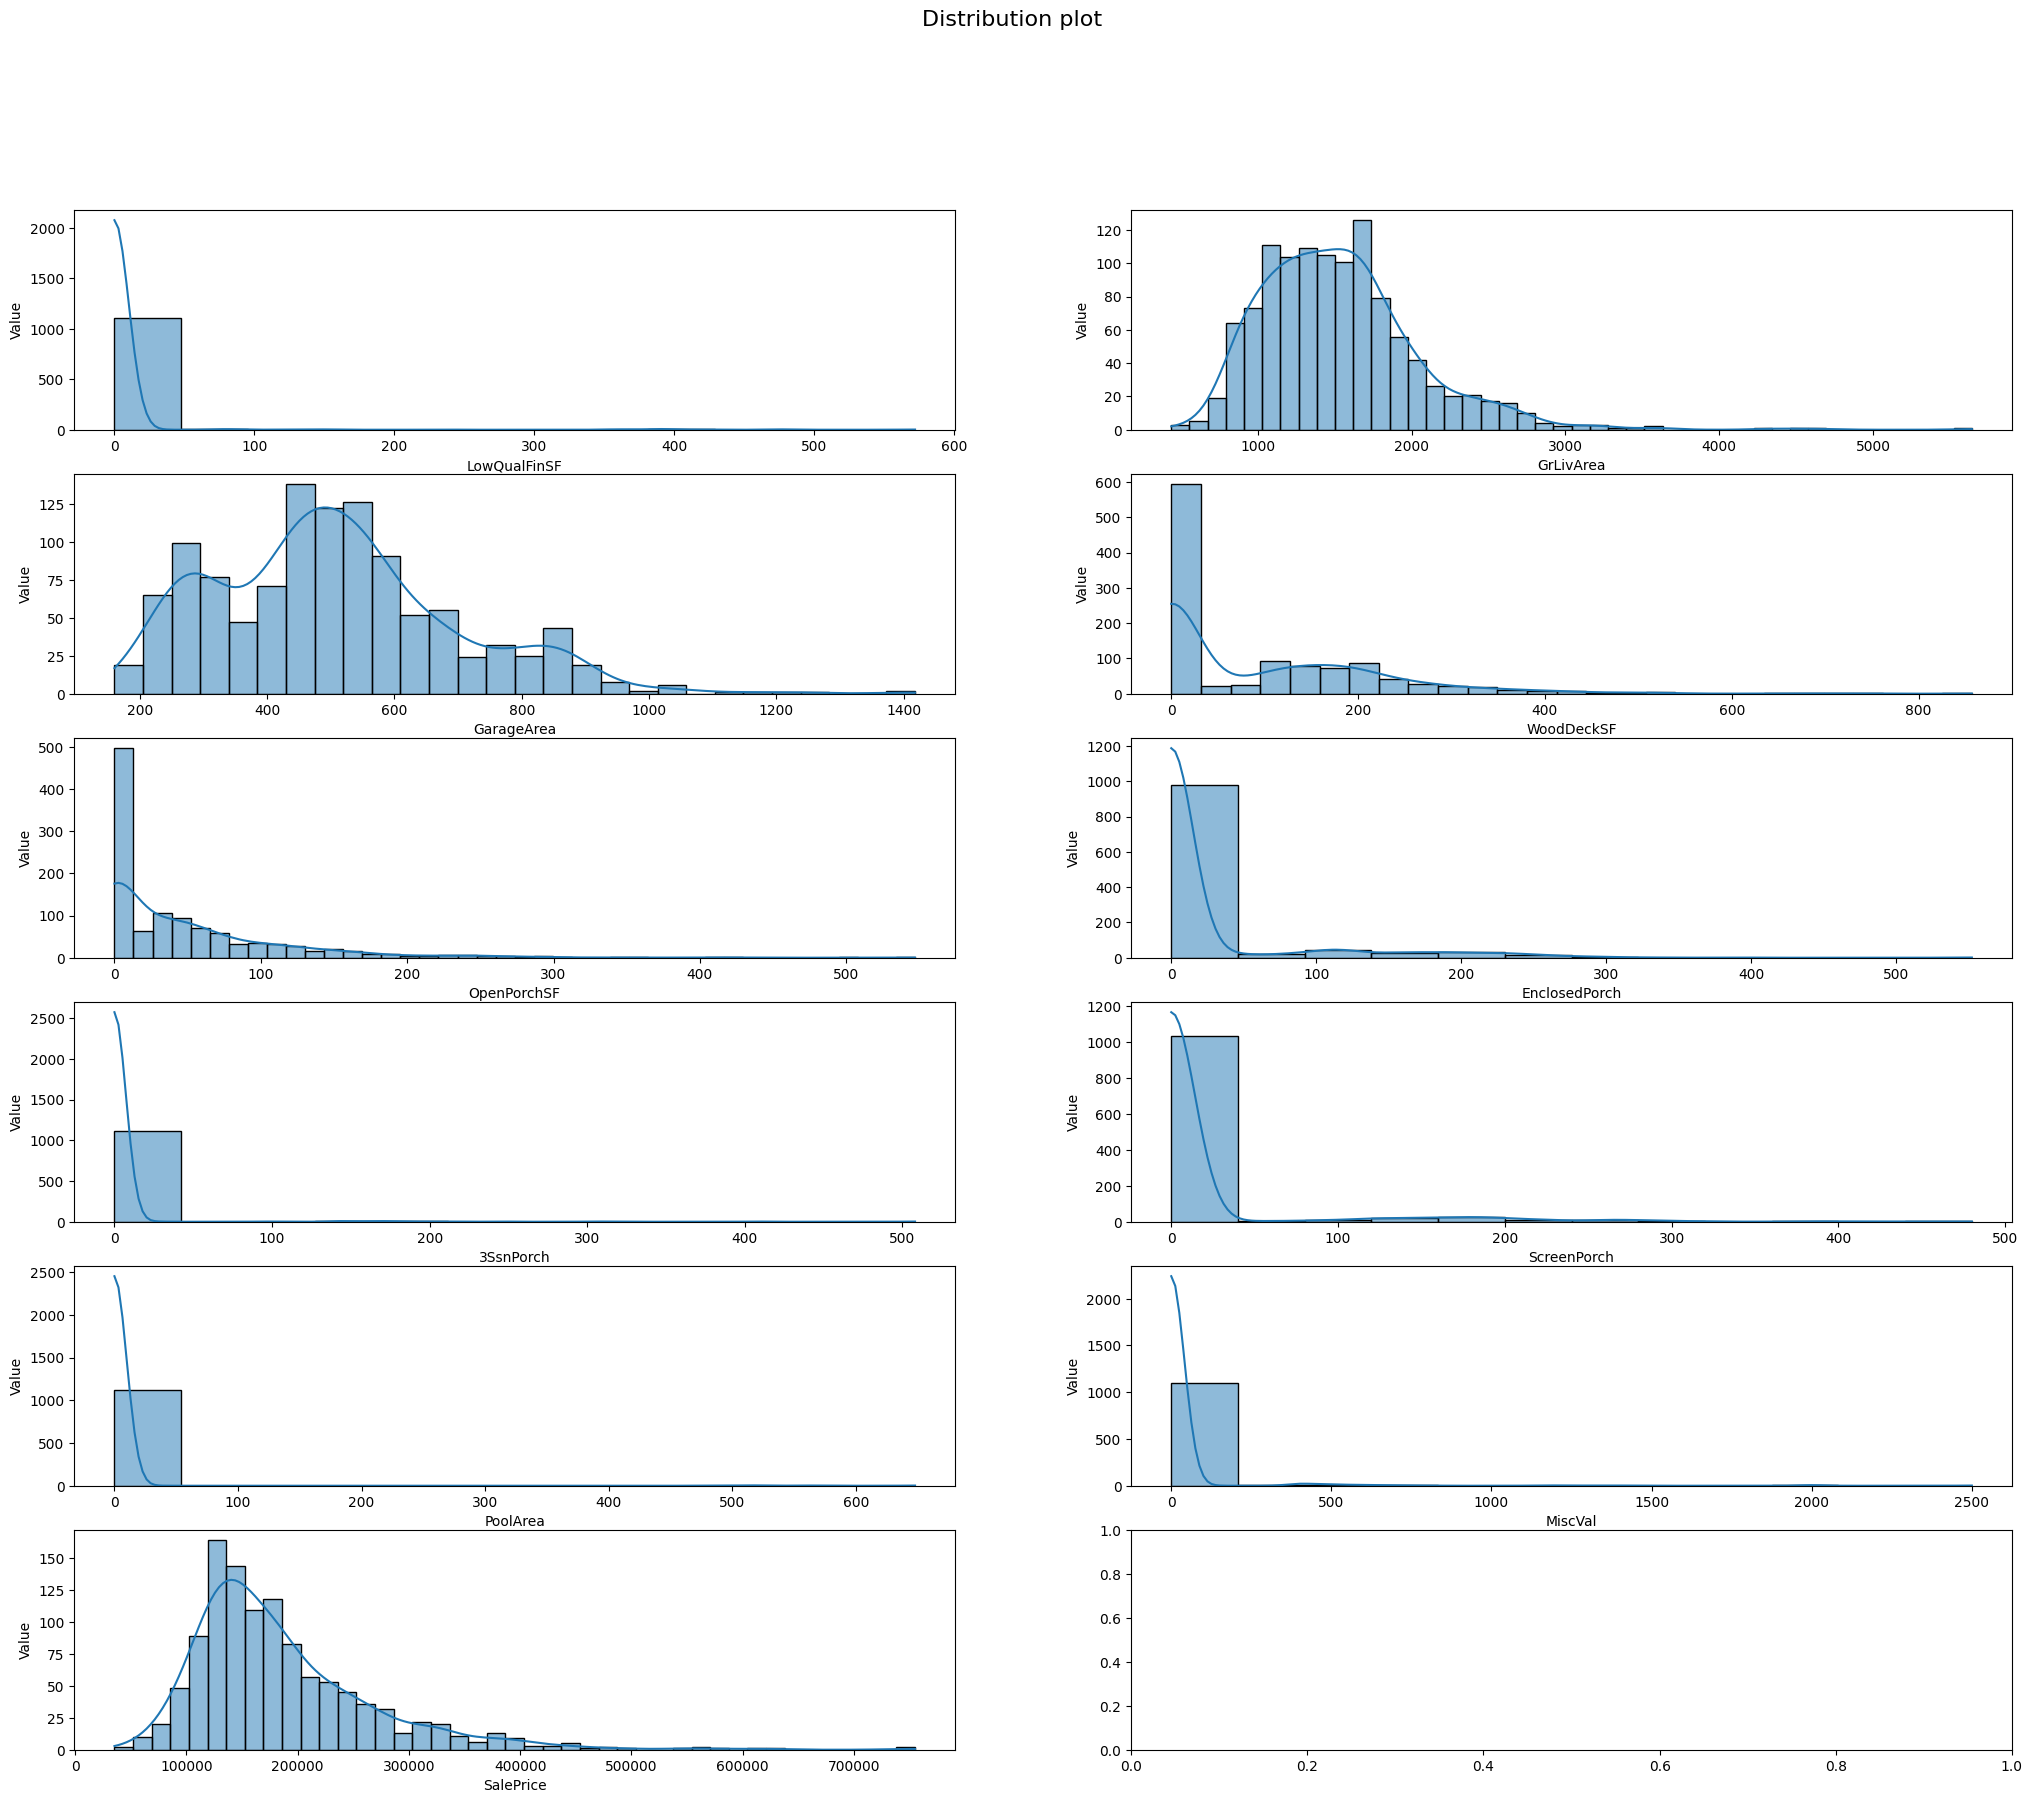

In [ ]:
for h  in range(0,len(columnas_numericas),12):
  colnume = columnas_numericas[h:h+12]
  fig, axes = plt.subplots(6, 2, figsize=(25, 20))
  fig.suptitle("Distribution plot", fontsize=16)

  for i, column_ in enumerate(colnume):
      row = i // 2
      col = i % 2

      sns.histplot(df[column_], kde=True, ax=axes[row, col])

      # Set plot labels and title
      axes[row, col].set_ylabel("Value")
      axes[row, col].set_xlabel(f"{column_}")

  # Show the plot
  plt.show()

### 5.1.2 Plot categorical data

In [ ]:
columnas_categoricas = cates.copy()

# Palabras que deseas buscar en las cadenas porque pertenecen a columnas continuas
palabras_a_eliminar = ["SF", "Area", "Year","EnclosedPorch","ScreenPorch","SalePrice","3SsnPorch","MiscVal"]

# Utiliza una comprensión de lista para remover las cadenas que contienen las palabras
columnas_categoricas = [cadena for cadena in columnas_categoricas if not any(palabra in cadena for palabra in palabras_a_eliminar)]


print(len(columnas_categoricas))
print(columnas_categoricas)

51
['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


Text(0.5, 0.98, 'Count plot by category')

<Axes: xlabel='MSSubClass', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'MSSubClass')

<Axes: xlabel='MSZoning', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'MSZoning')

<Axes: xlabel='Street', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Street')

<Axes: xlabel='LotShape', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'LotShape')

<Axes: xlabel='LandContour', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'LandContour')

<Axes: xlabel='LotConfig', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'LotConfig')

<Axes: xlabel='LandSlope', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'LandSlope')

<Axes: xlabel='Neighborhood', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Neighborhood')

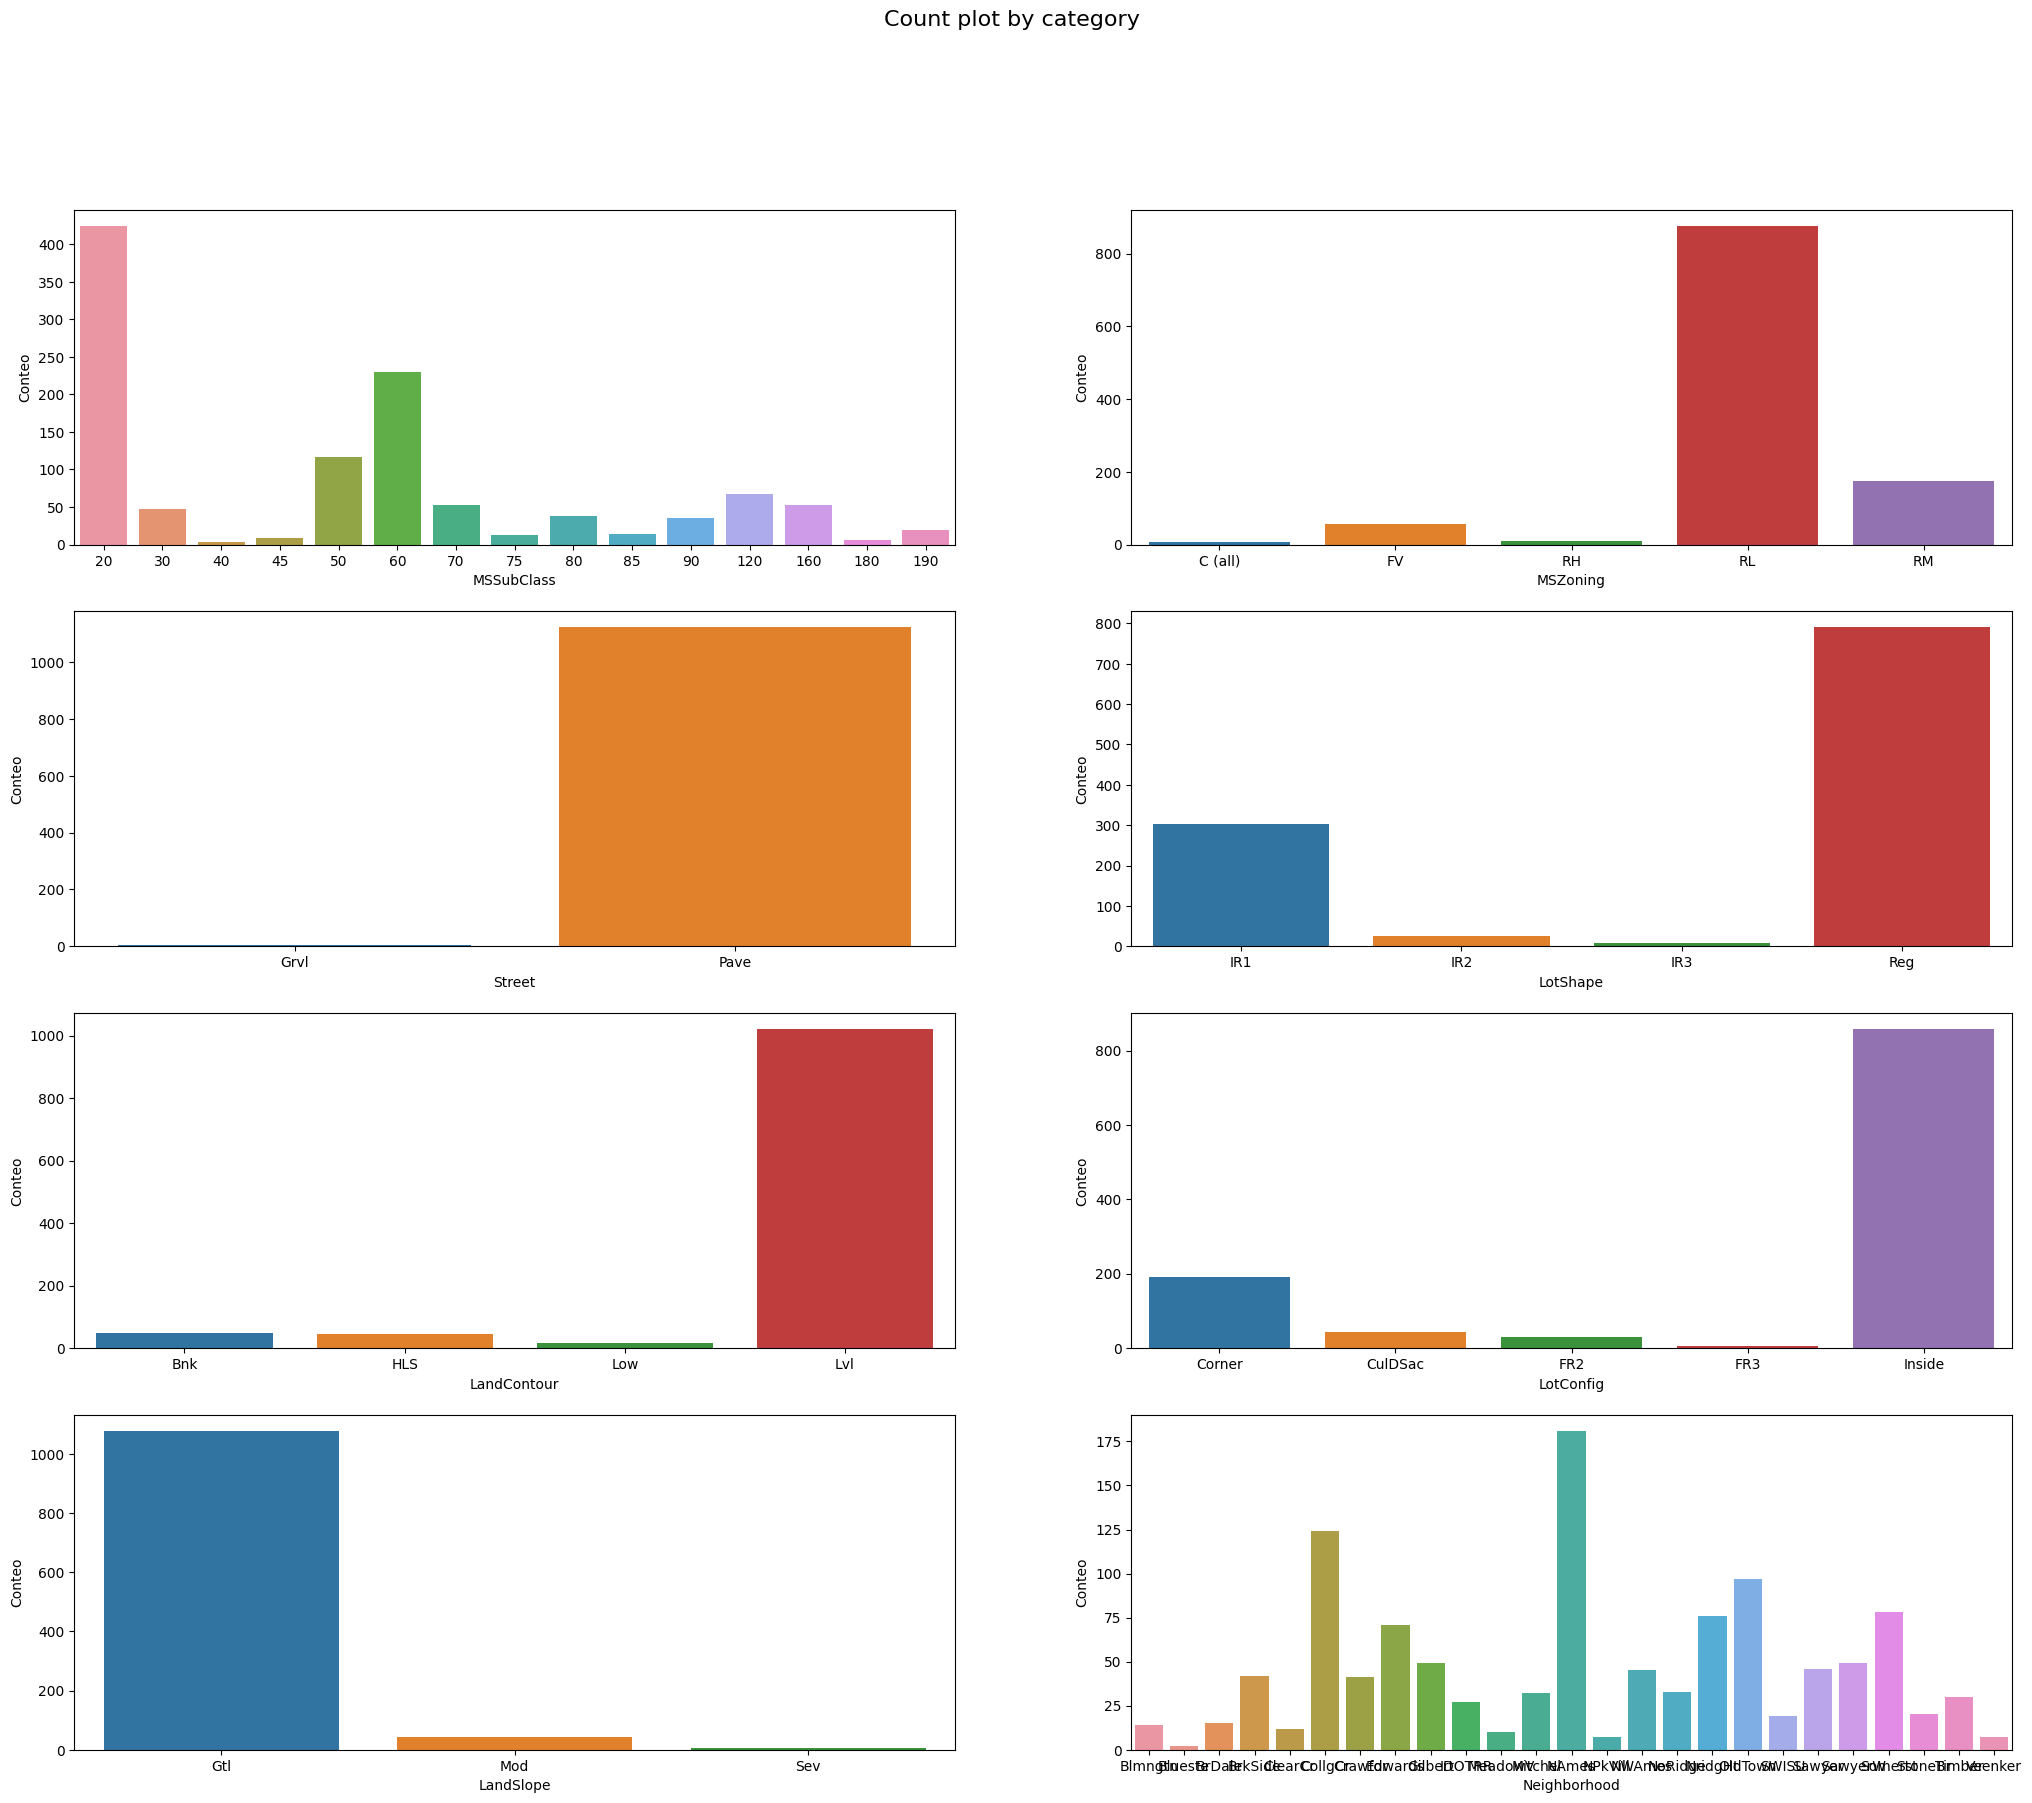

Text(0.5, 0.98, 'Count plot by category')

<Axes: xlabel='Condition1', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Condition1')

<Axes: xlabel='Condition2', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Condition2')

<Axes: xlabel='BldgType', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'BldgType')

<Axes: xlabel='HouseStyle', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'HouseStyle')

<Axes: xlabel='OverallQual', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'OverallQual')

<Axes: xlabel='OverallCond', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'OverallCond')

<Axes: xlabel='RoofStyle', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'RoofStyle')

<Axes: xlabel='RoofMatl', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'RoofMatl')

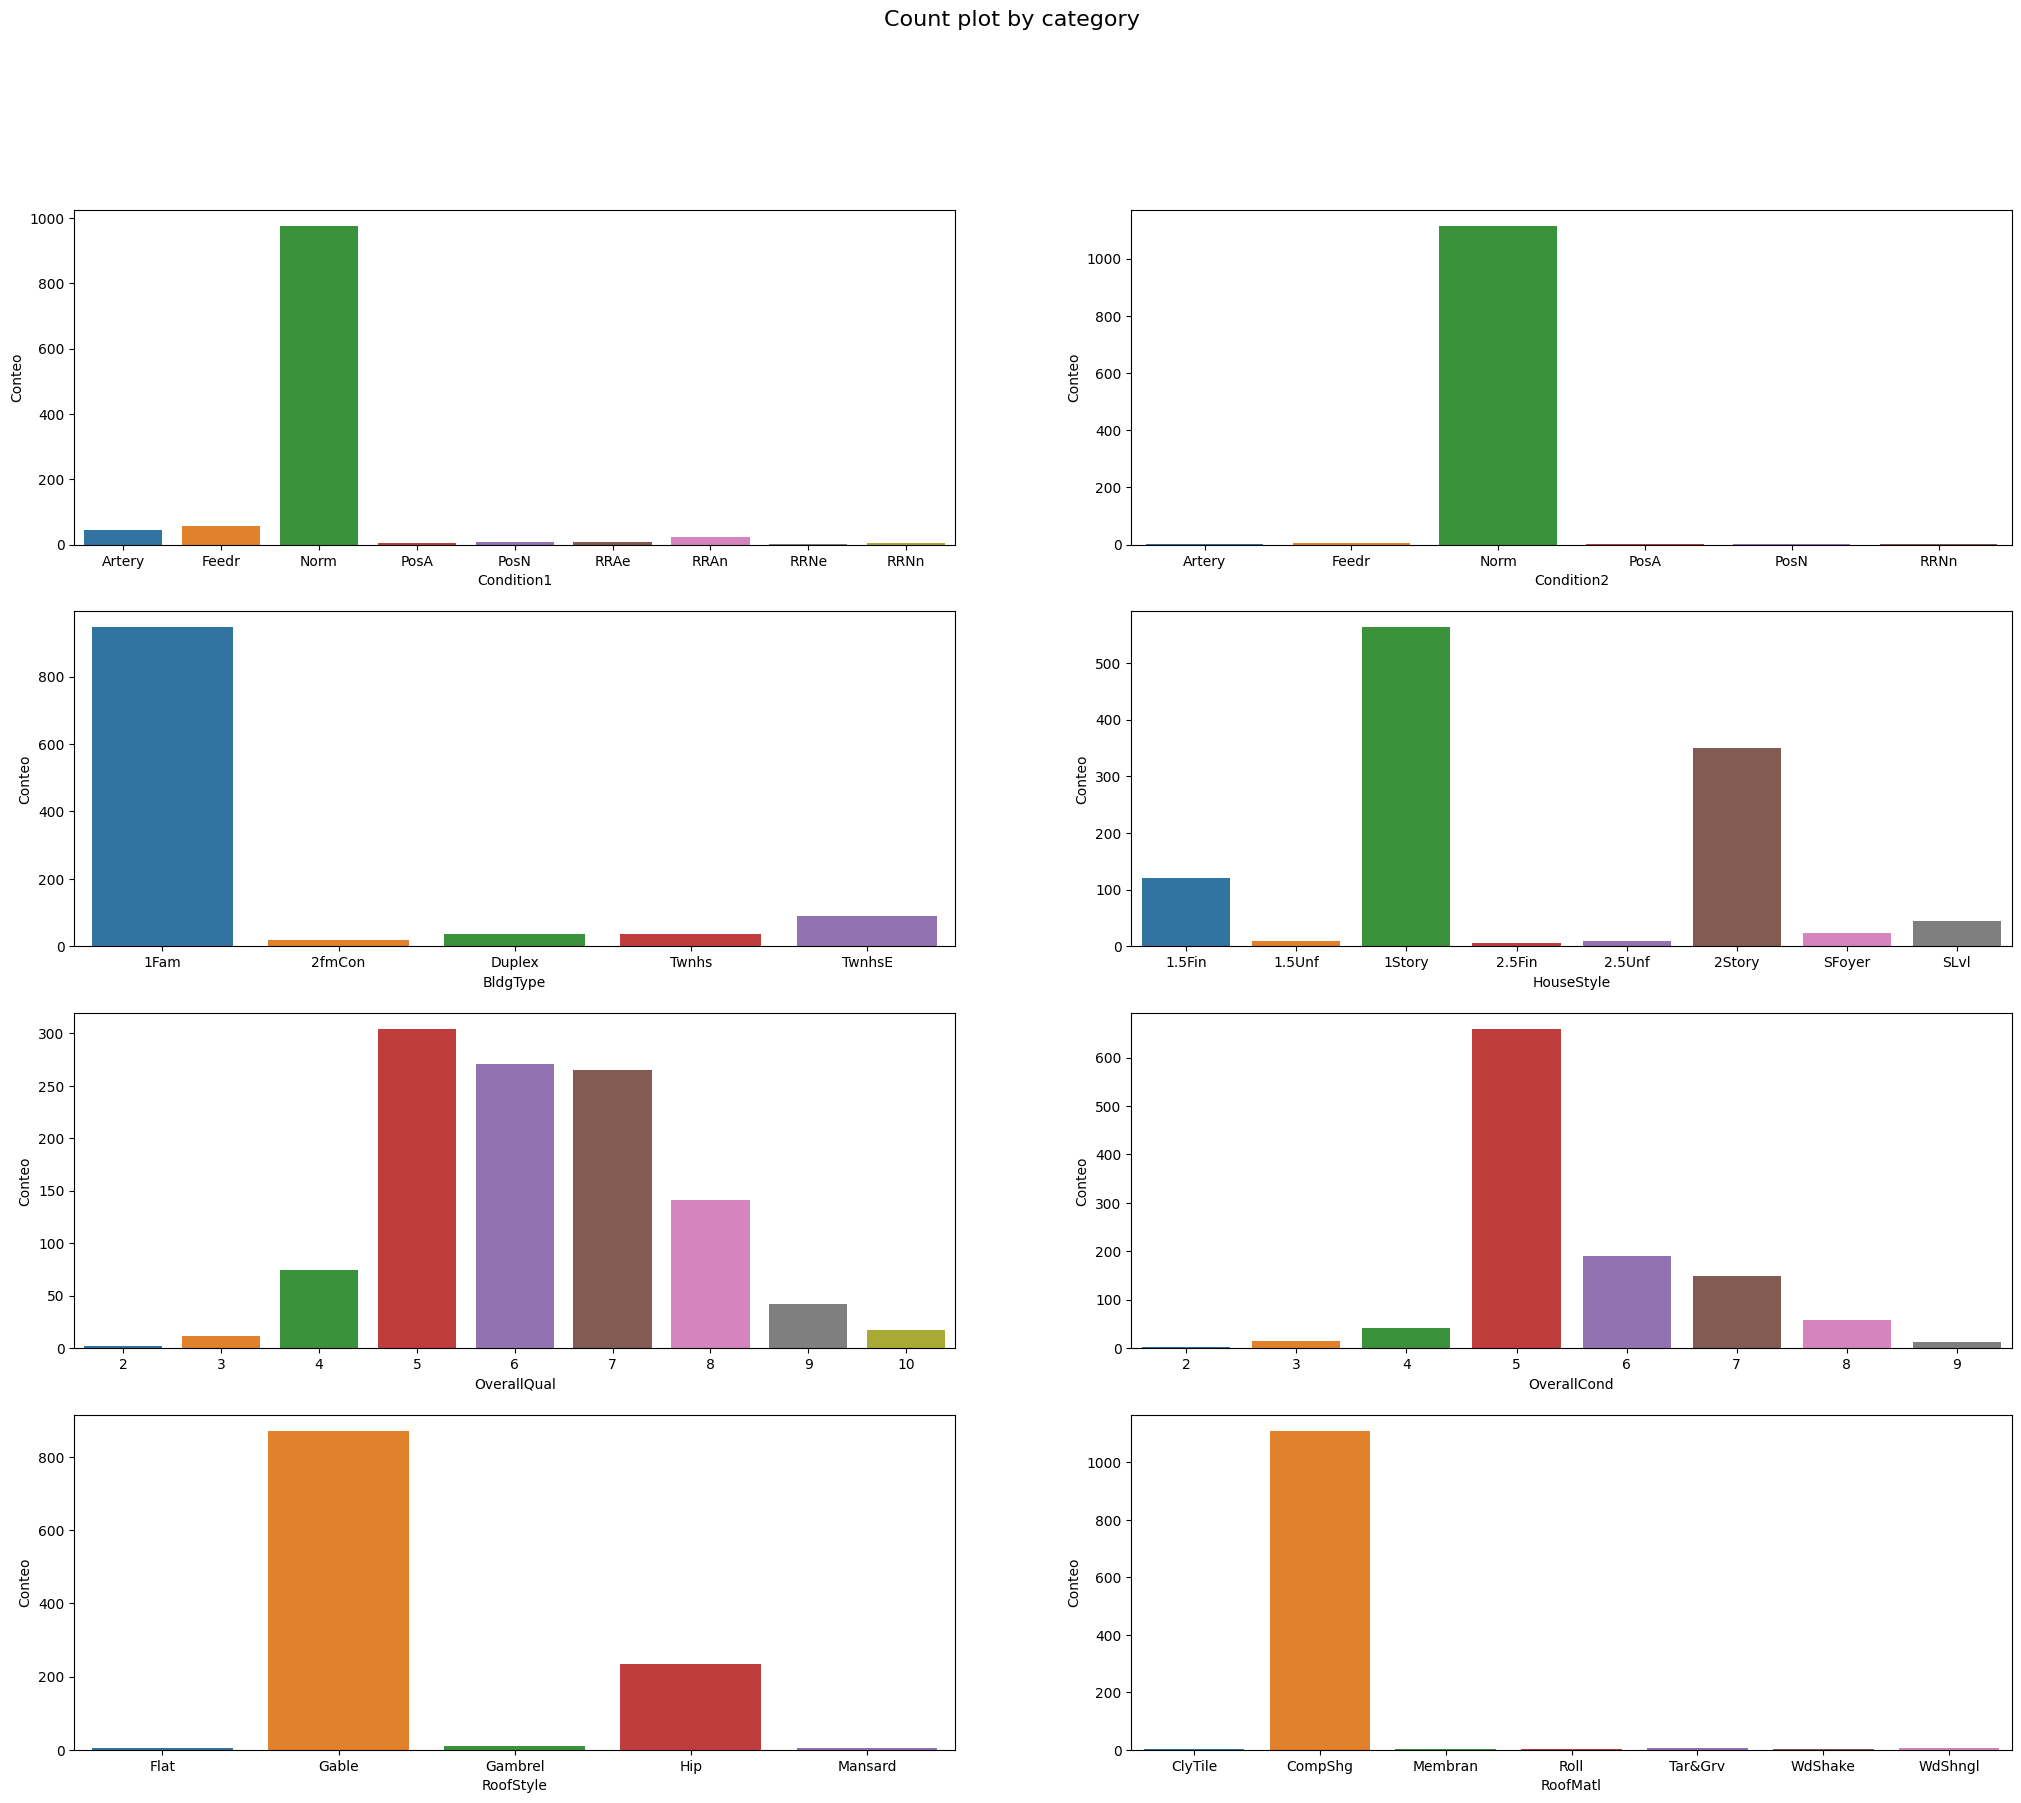

Text(0.5, 0.98, 'Count plot by category')

<Axes: xlabel='Exterior1st', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Exterior1st')

<Axes: xlabel='Exterior2nd', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Exterior2nd')

<Axes: xlabel='MasVnrType', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'MasVnrType')

<Axes: xlabel='ExterQual', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'ExterQual')

<Axes: xlabel='ExterCond', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'ExterCond')

<Axes: xlabel='Foundation', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Foundation')

<Axes: xlabel='BsmtQual', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'BsmtQual')

<Axes: xlabel='BsmtCond', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'BsmtCond')

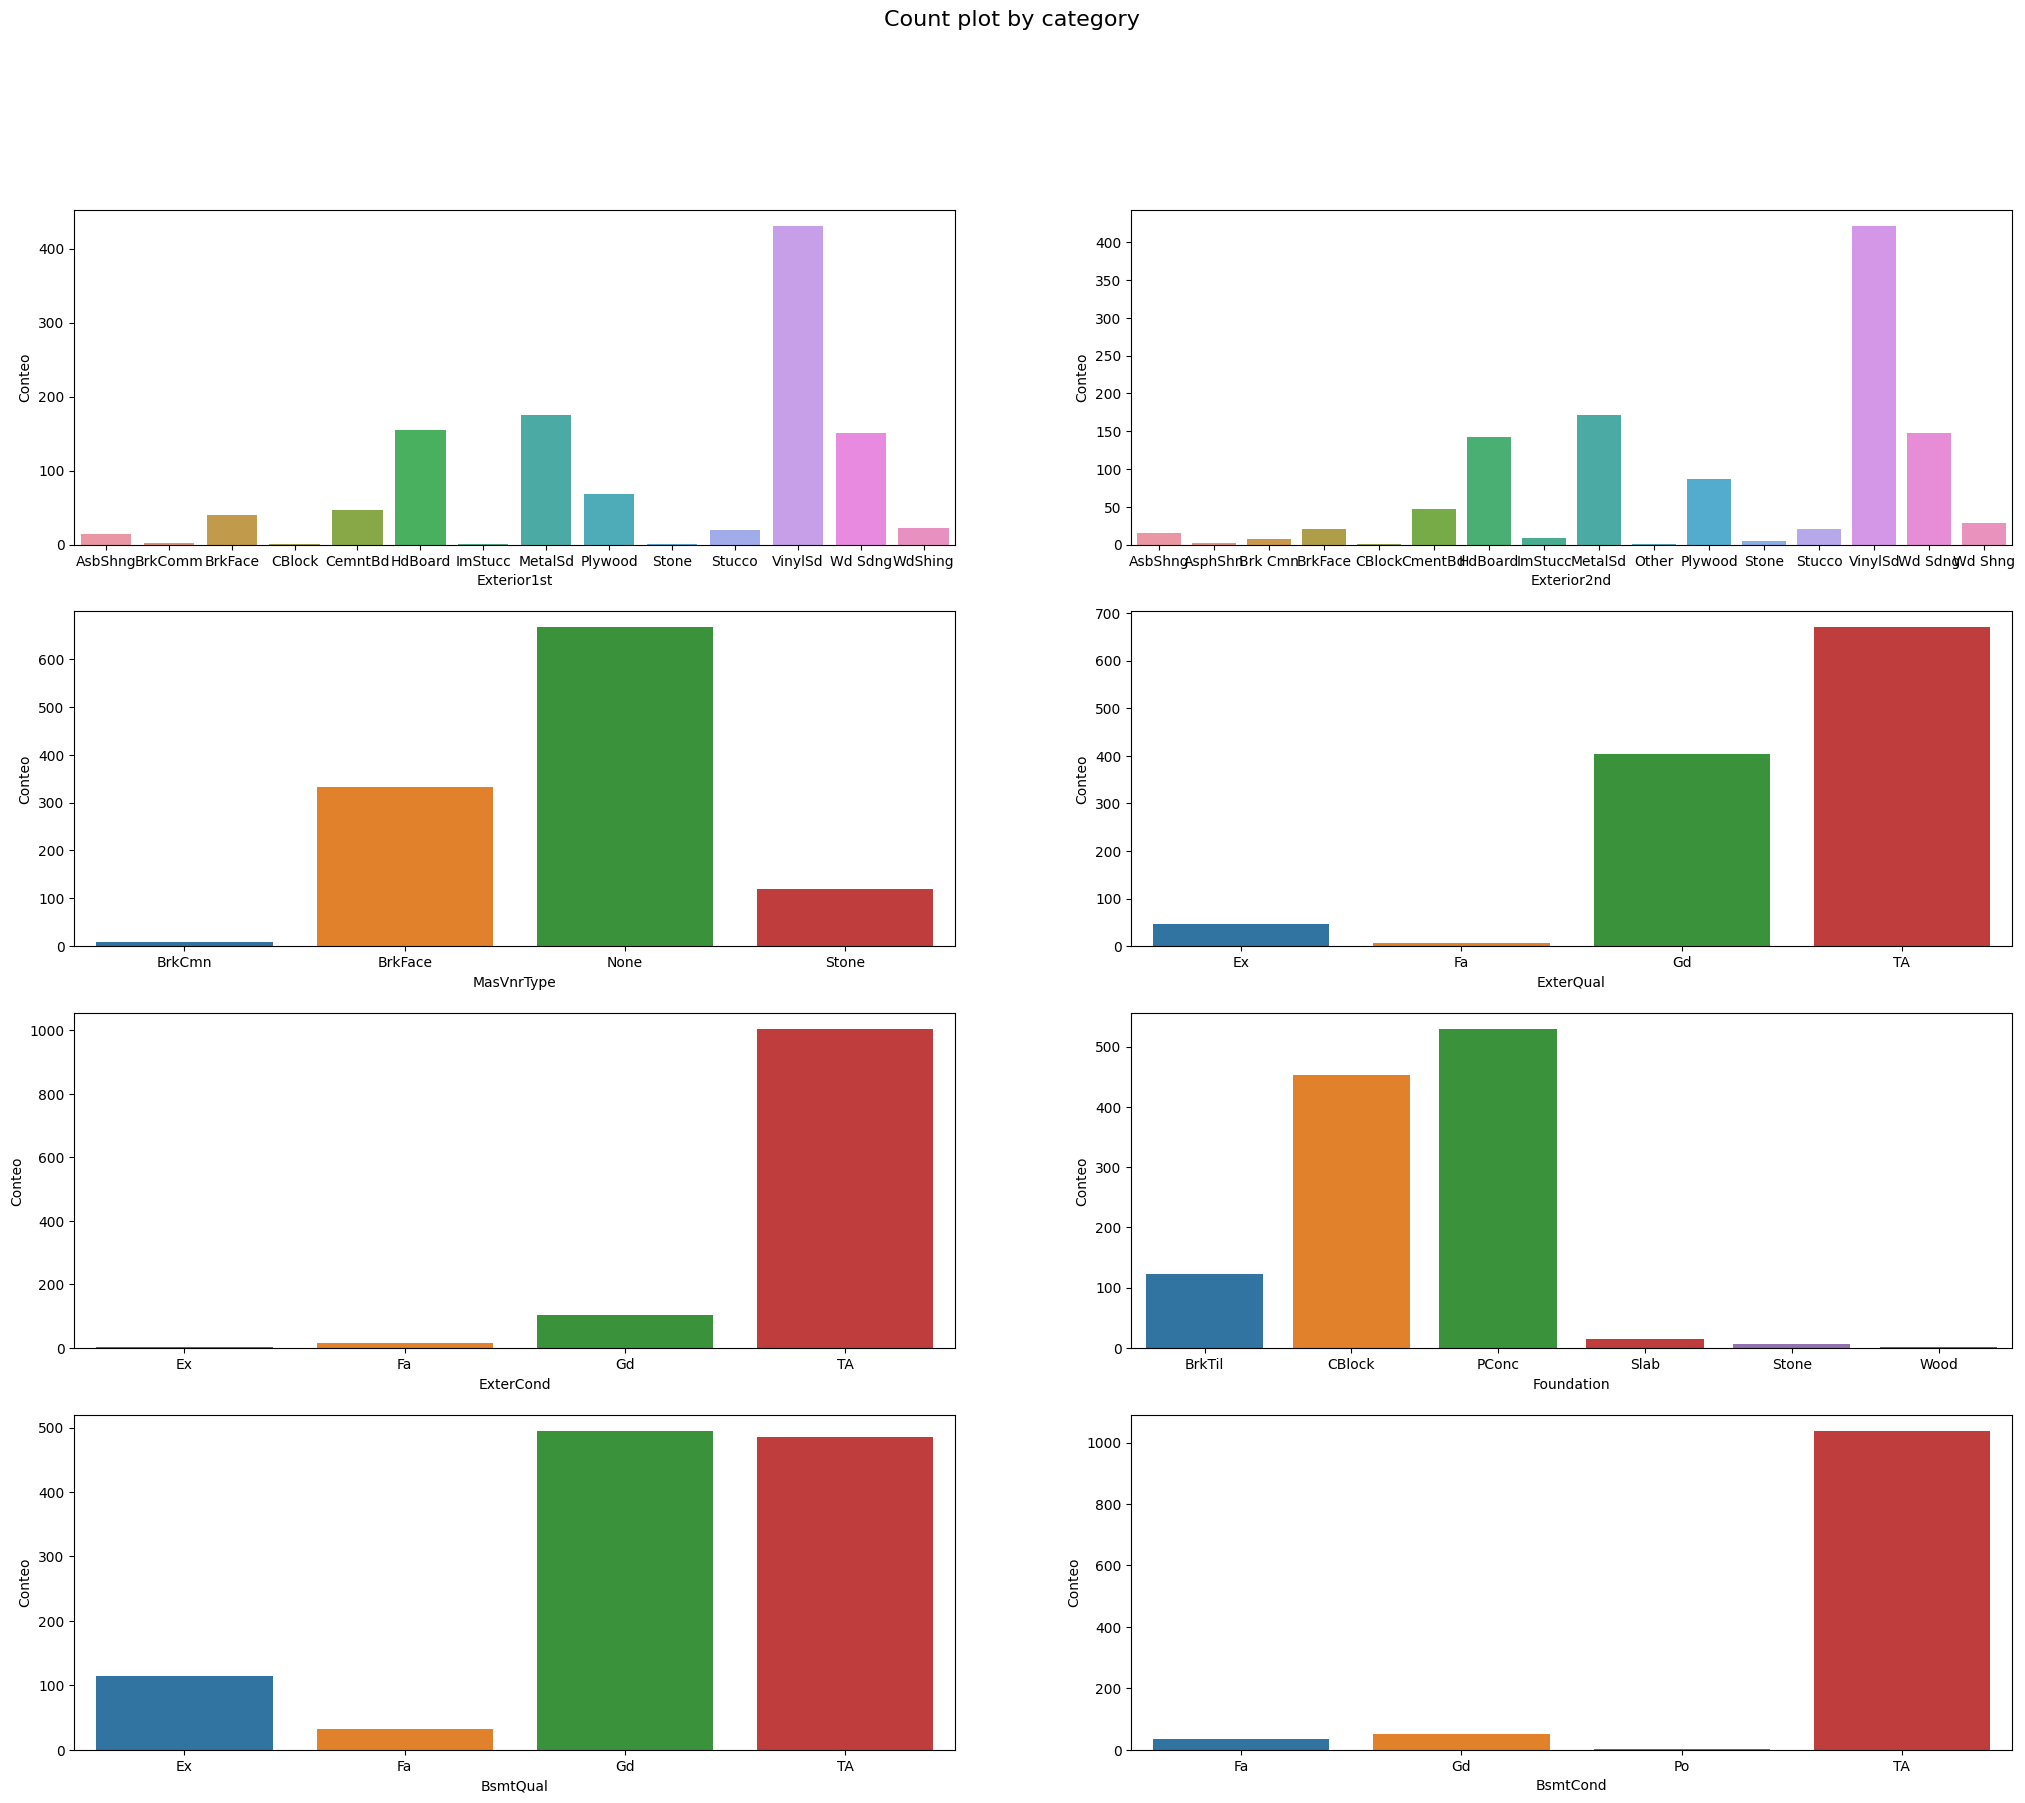

Text(0.5, 0.98, 'Count plot by category')

<Axes: xlabel='BsmtExposure', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'BsmtExposure')

<Axes: xlabel='BsmtFinType1', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'BsmtFinType1')

<Axes: xlabel='BsmtFinType2', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'BsmtFinType2')

<Axes: xlabel='Heating', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Heating')

<Axes: xlabel='HeatingQC', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'HeatingQC')

<Axes: xlabel='CentralAir', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'CentralAir')

<Axes: xlabel='Electrical', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Electrical')

<Axes: xlabel='BsmtFullBath', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'BsmtFullBath')

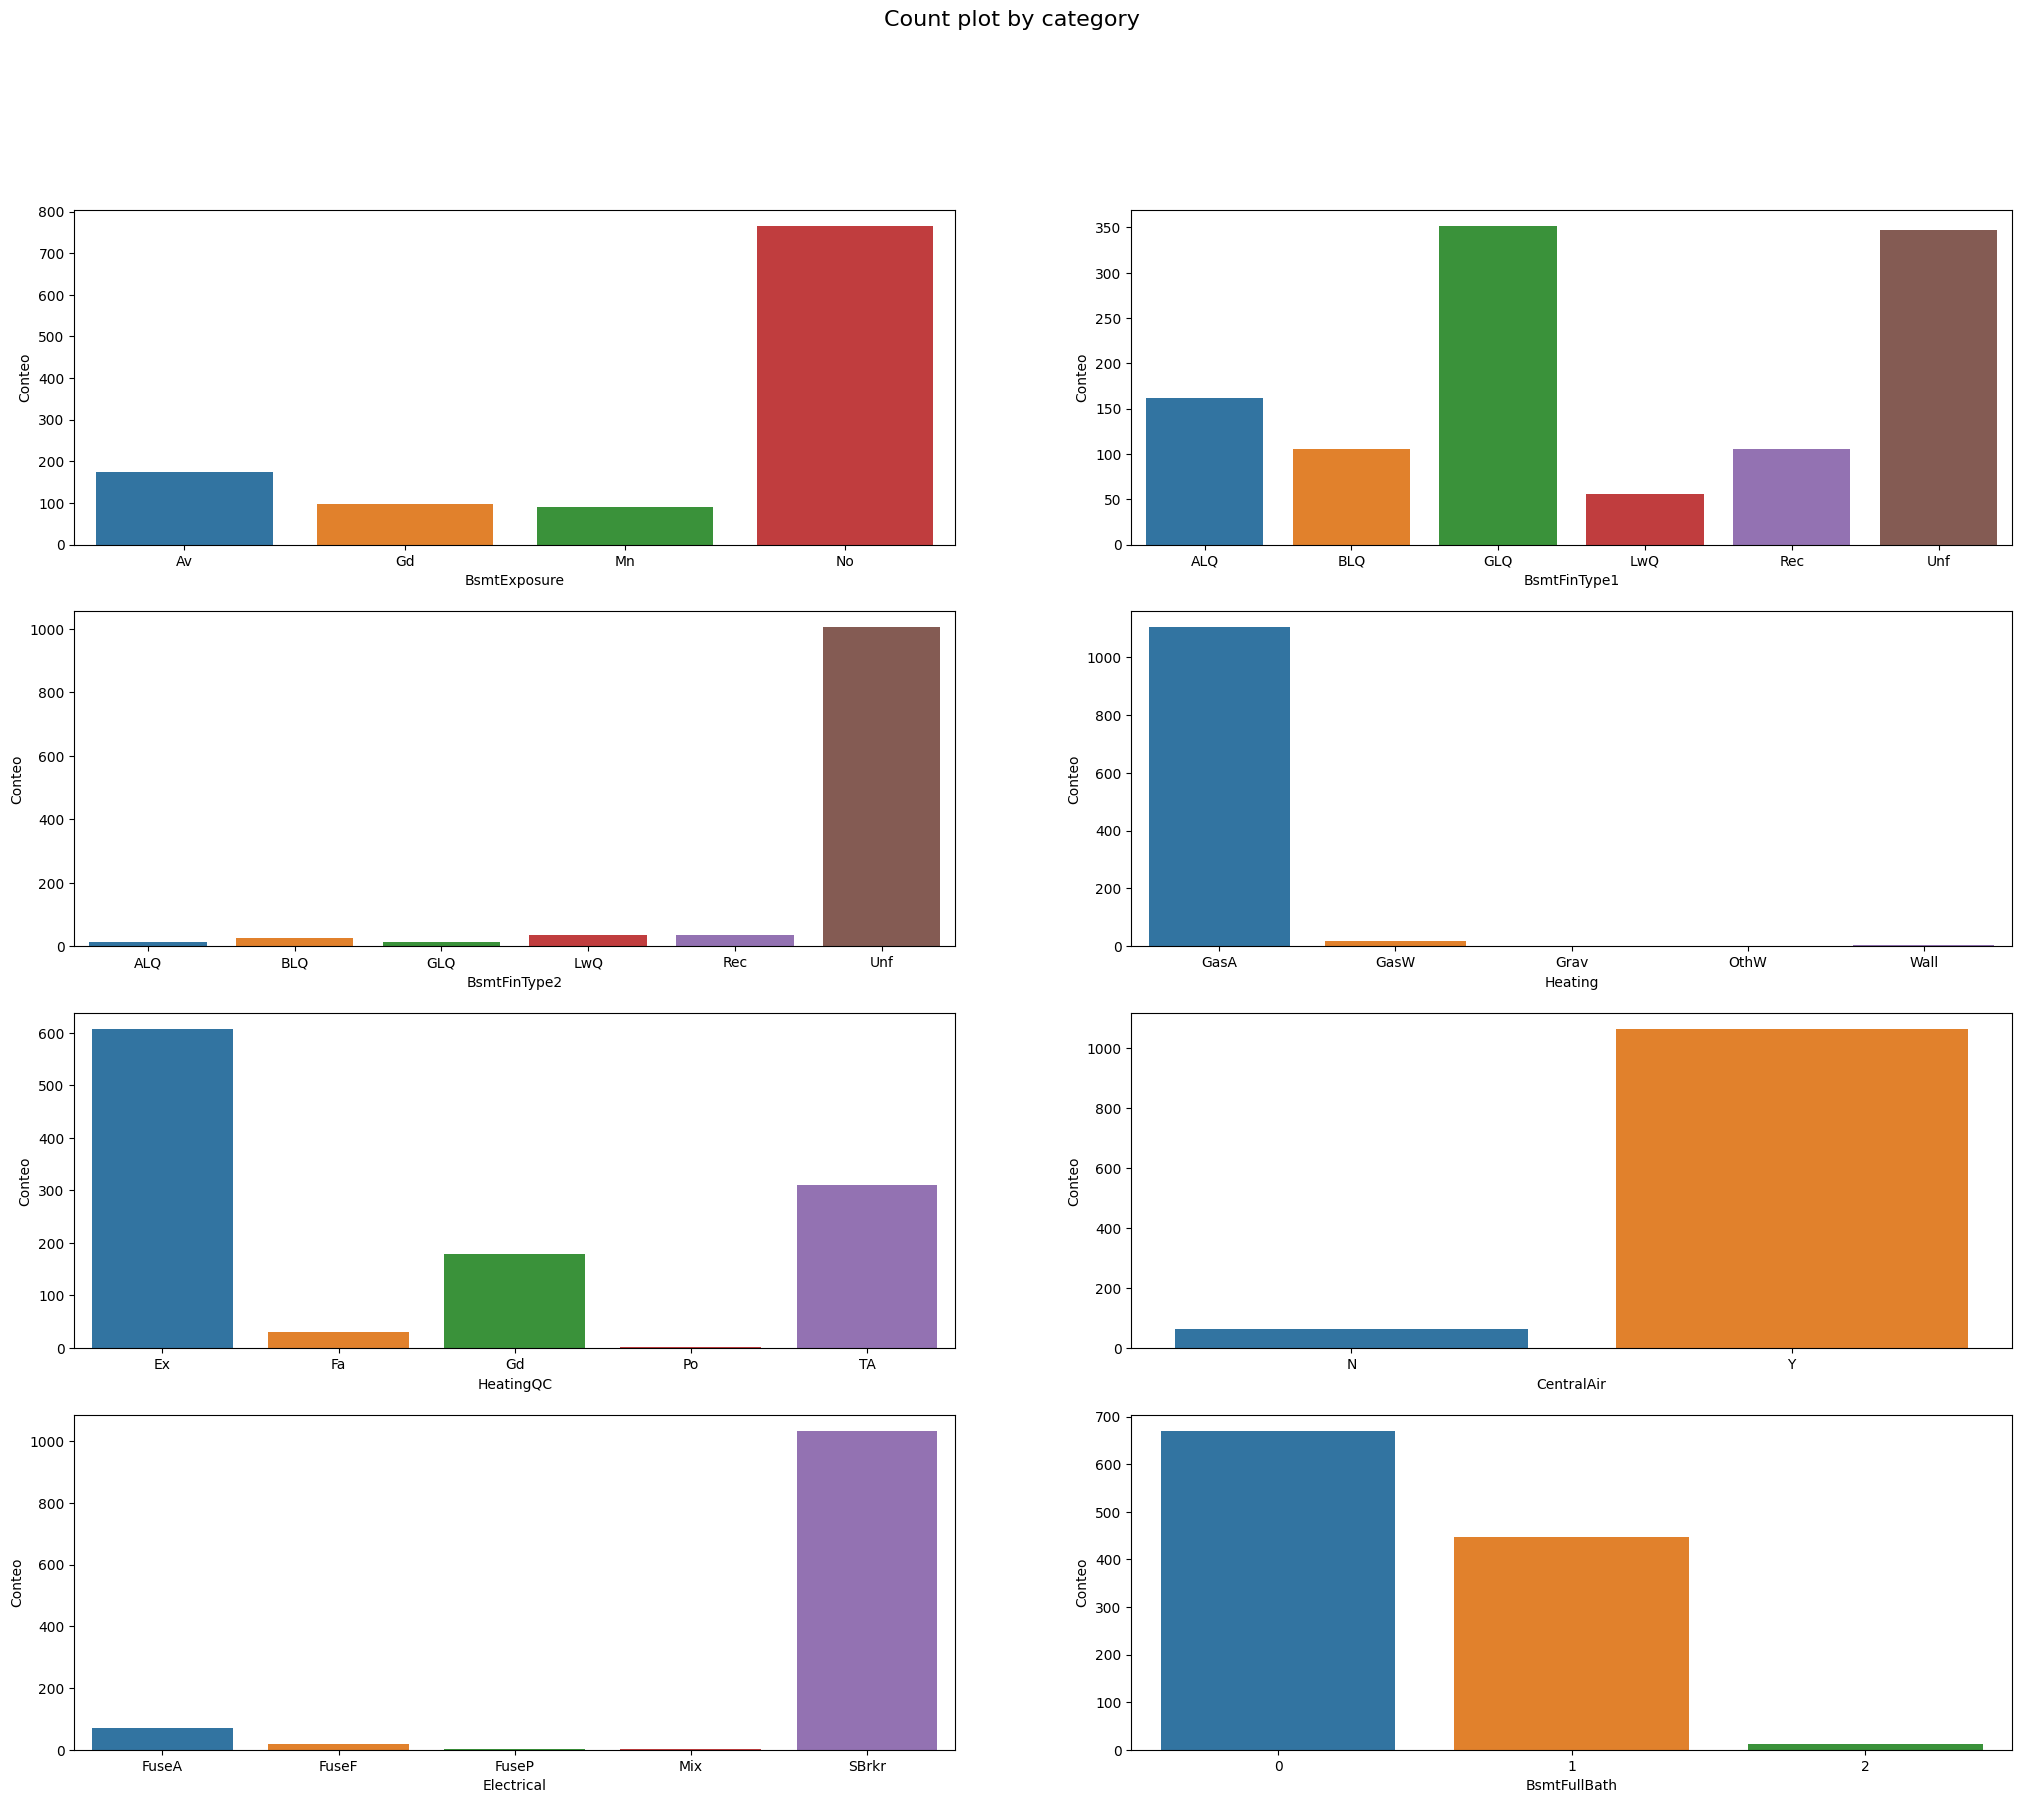

Text(0.5, 0.98, 'Count plot by category')

<Axes: xlabel='BsmtHalfBath', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'BsmtHalfBath')

<Axes: xlabel='FullBath', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'FullBath')

<Axes: xlabel='HalfBath', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'HalfBath')

<Axes: xlabel='BedroomAbvGr', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'BedroomAbvGr')

<Axes: xlabel='KitchenAbvGr', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'KitchenAbvGr')

<Axes: xlabel='KitchenQual', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'KitchenQual')

<Axes: xlabel='TotRmsAbvGrd', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'TotRmsAbvGrd')

<Axes: xlabel='Functional', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Functional')

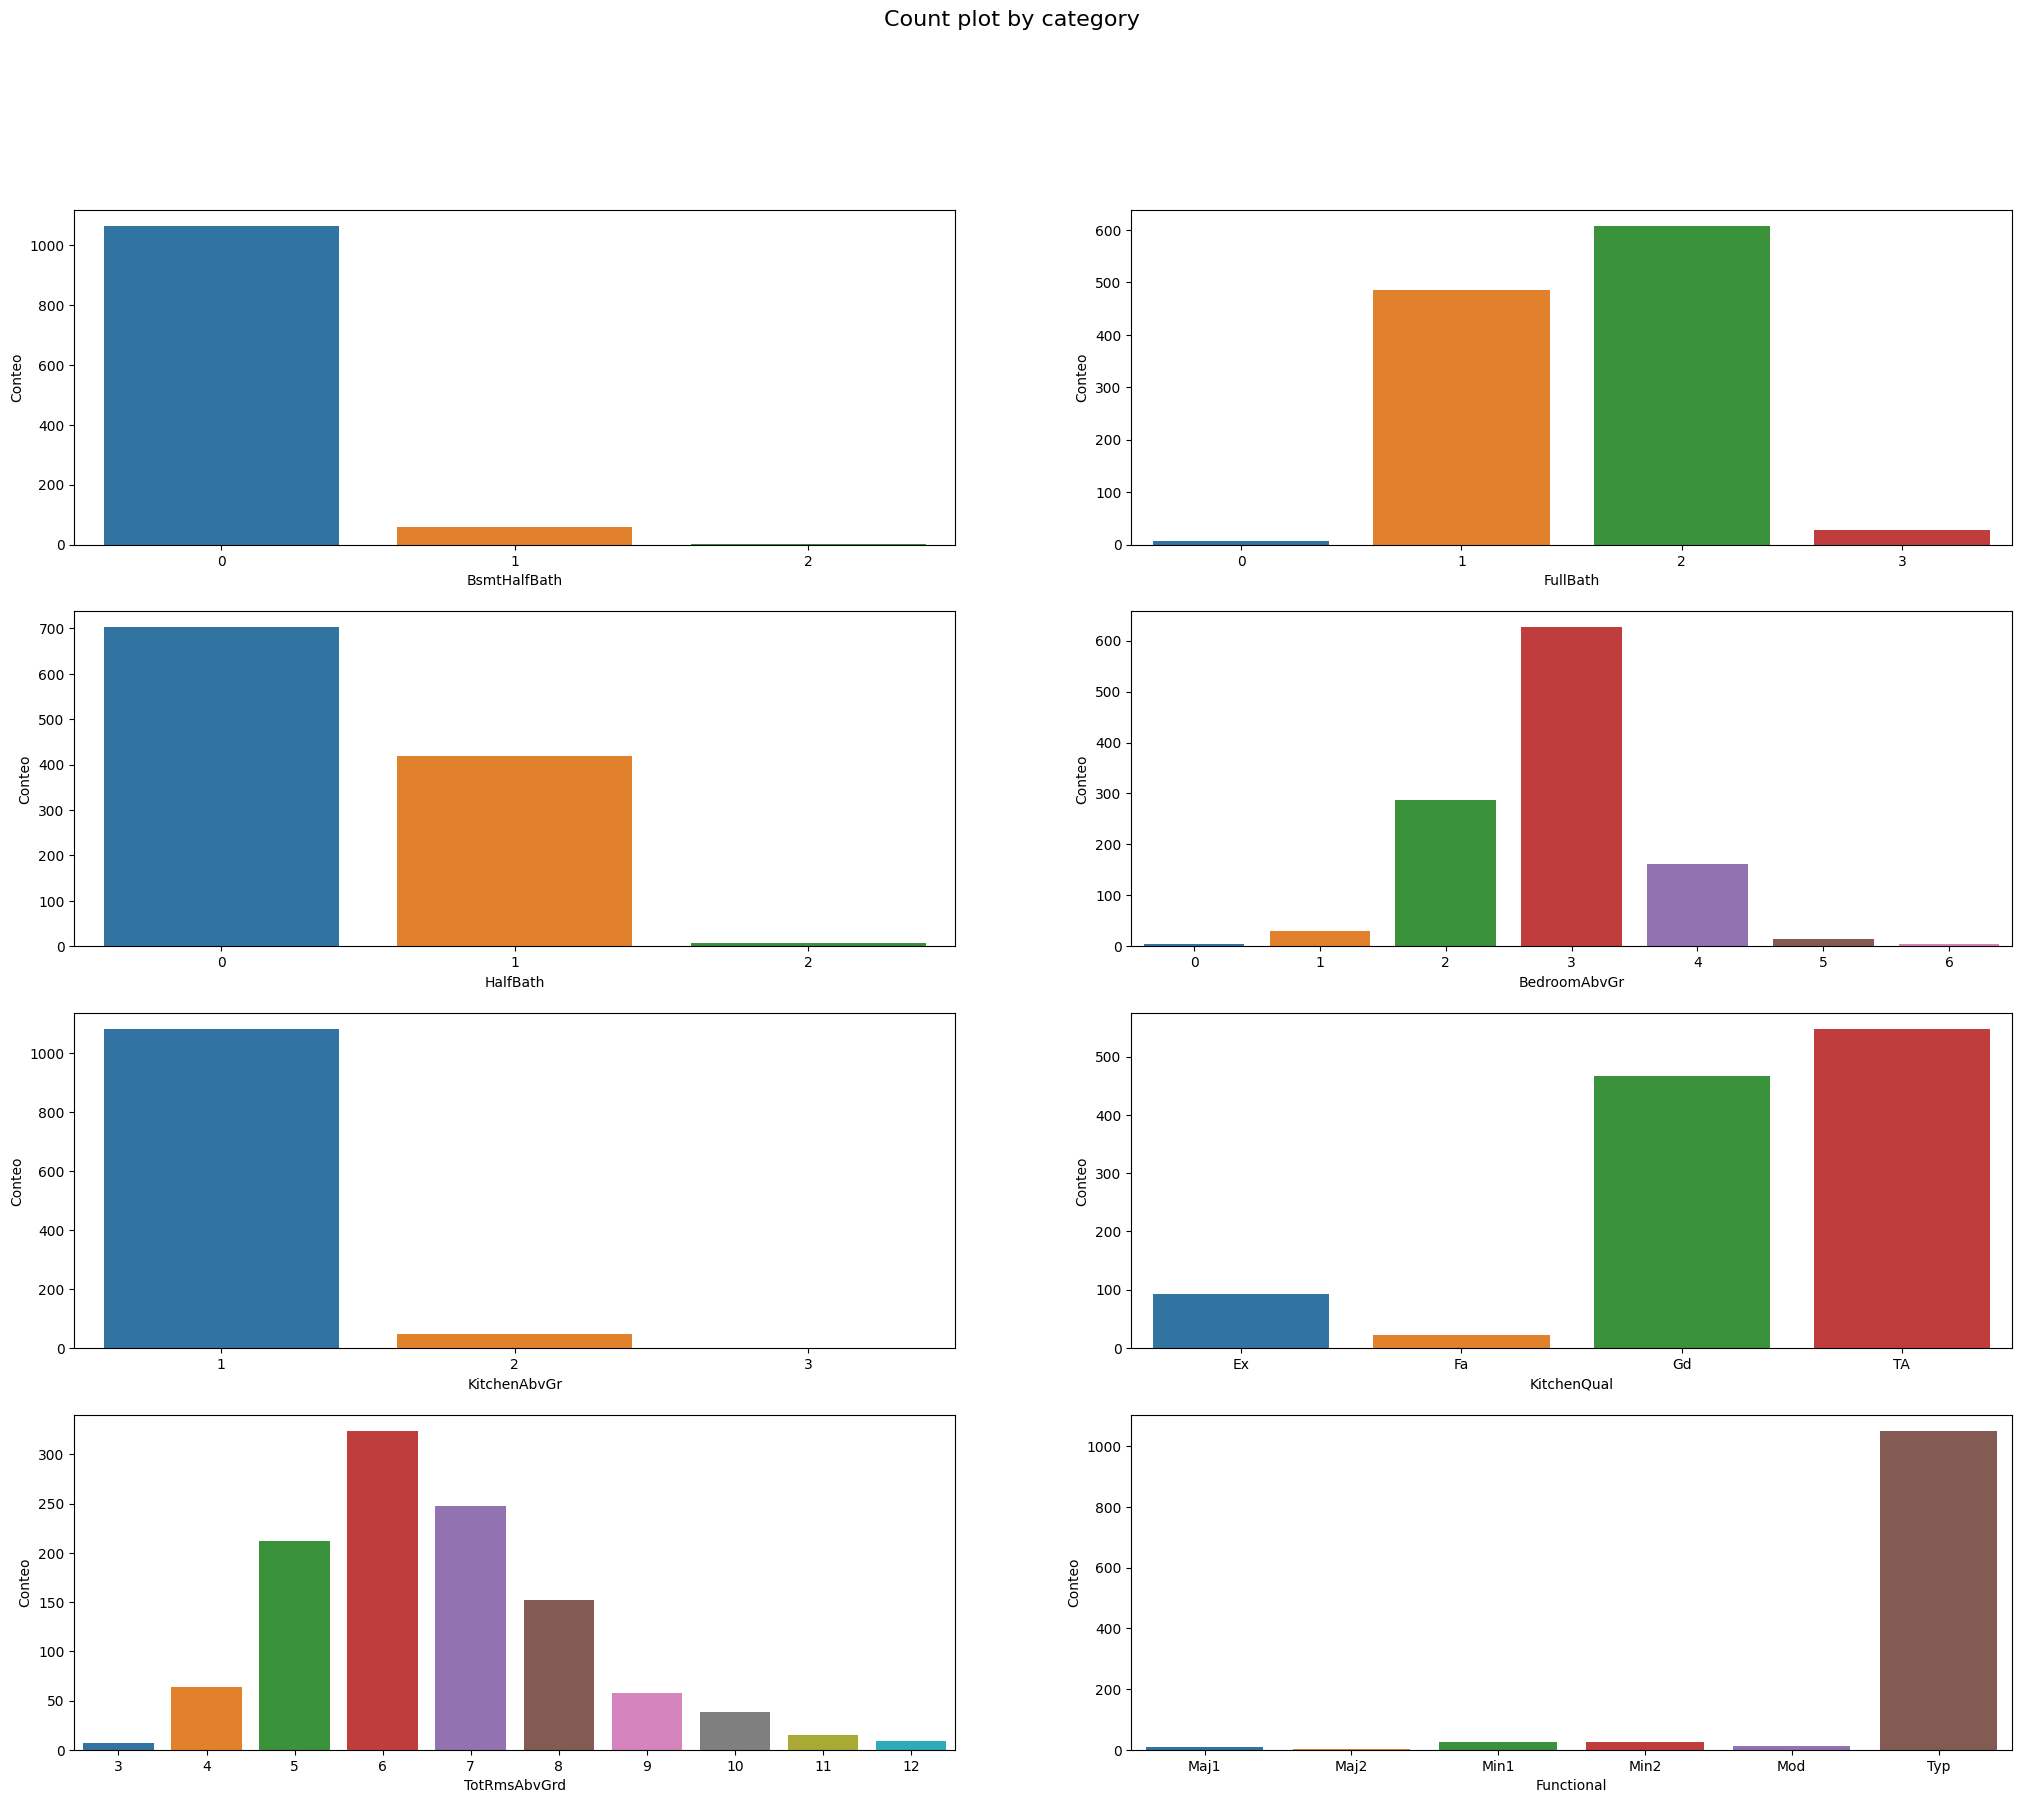

Text(0.5, 0.98, 'Count plot by category')

<Axes: xlabel='Fireplaces', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Fireplaces')

<Axes: xlabel='GarageType', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'GarageType')

<Axes: xlabel='GarageFinish', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'GarageFinish')

<Axes: xlabel='GarageCars', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'GarageCars')

<Axes: xlabel='GarageQual', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'GarageQual')

<Axes: xlabel='GarageCond', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'GarageCond')

<Axes: xlabel='PavedDrive', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'PavedDrive')

<Axes: xlabel='MoSold', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'MoSold')

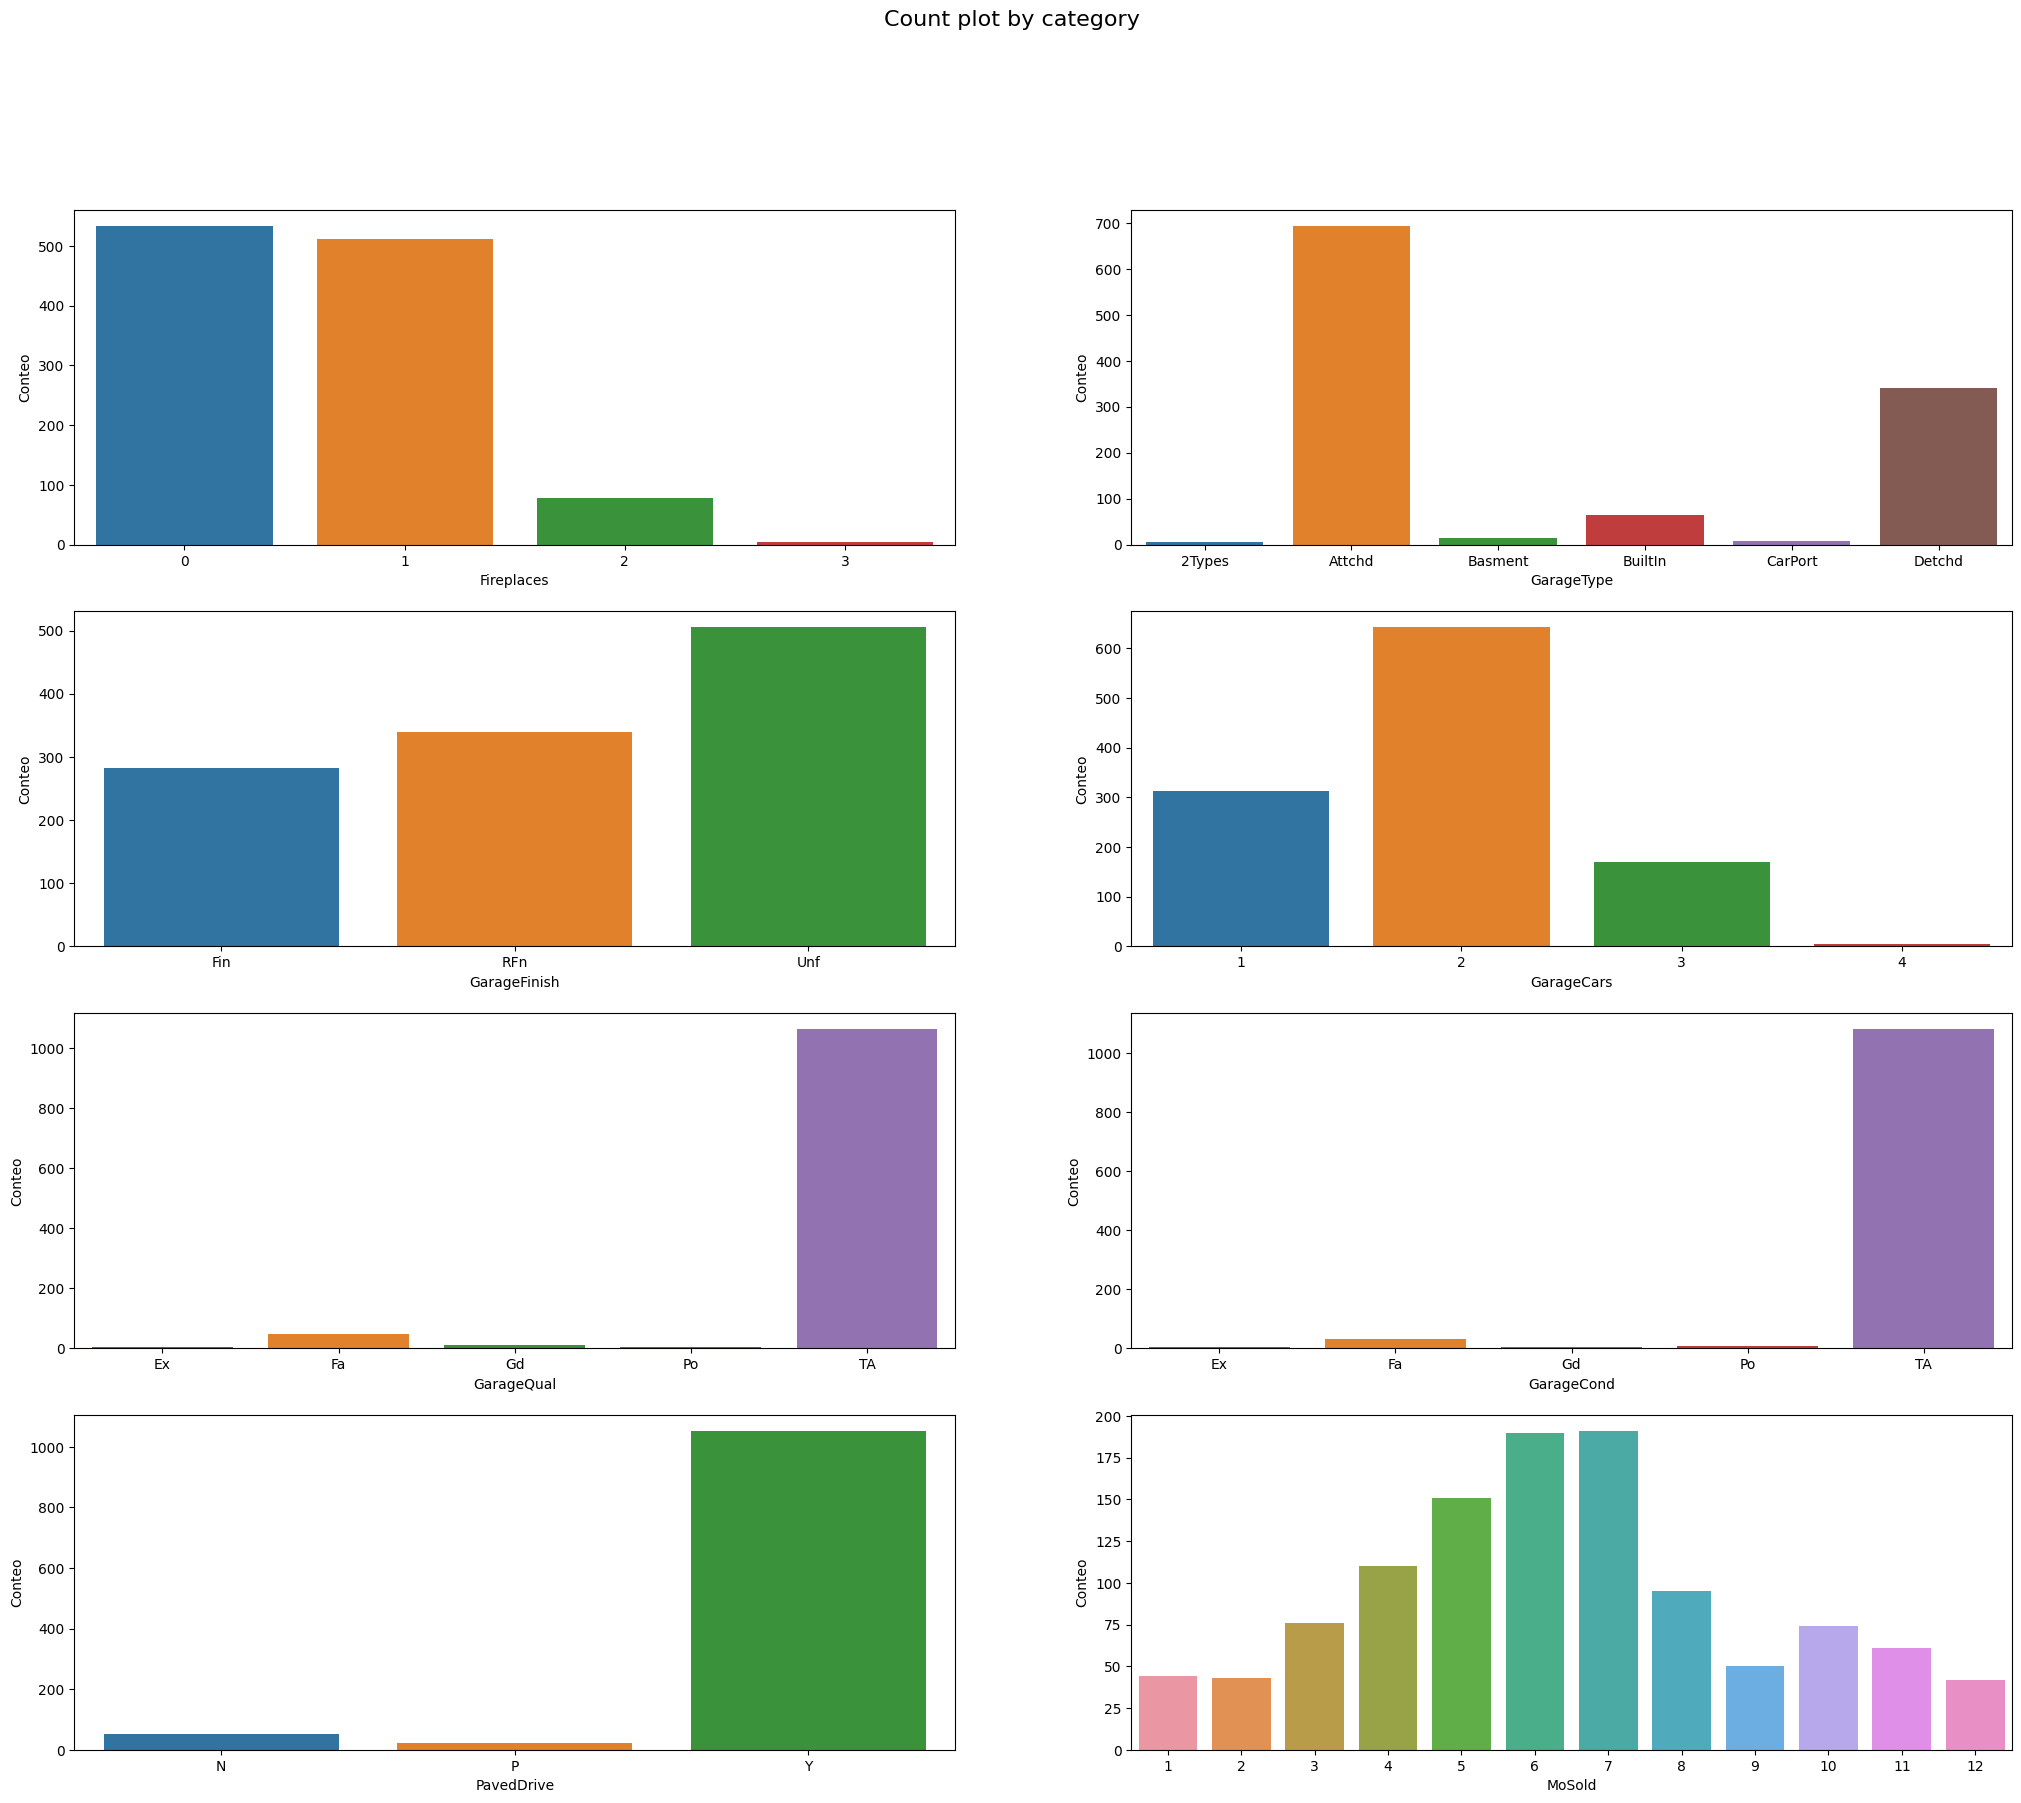

Text(0.5, 0.98, 'Count plot by category')

<Axes: xlabel='YrSold', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'YrSold')

<Axes: xlabel='SaleType', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'SaleType')

<Axes: xlabel='SaleCondition', ylabel='Conteo'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'SaleCondition')

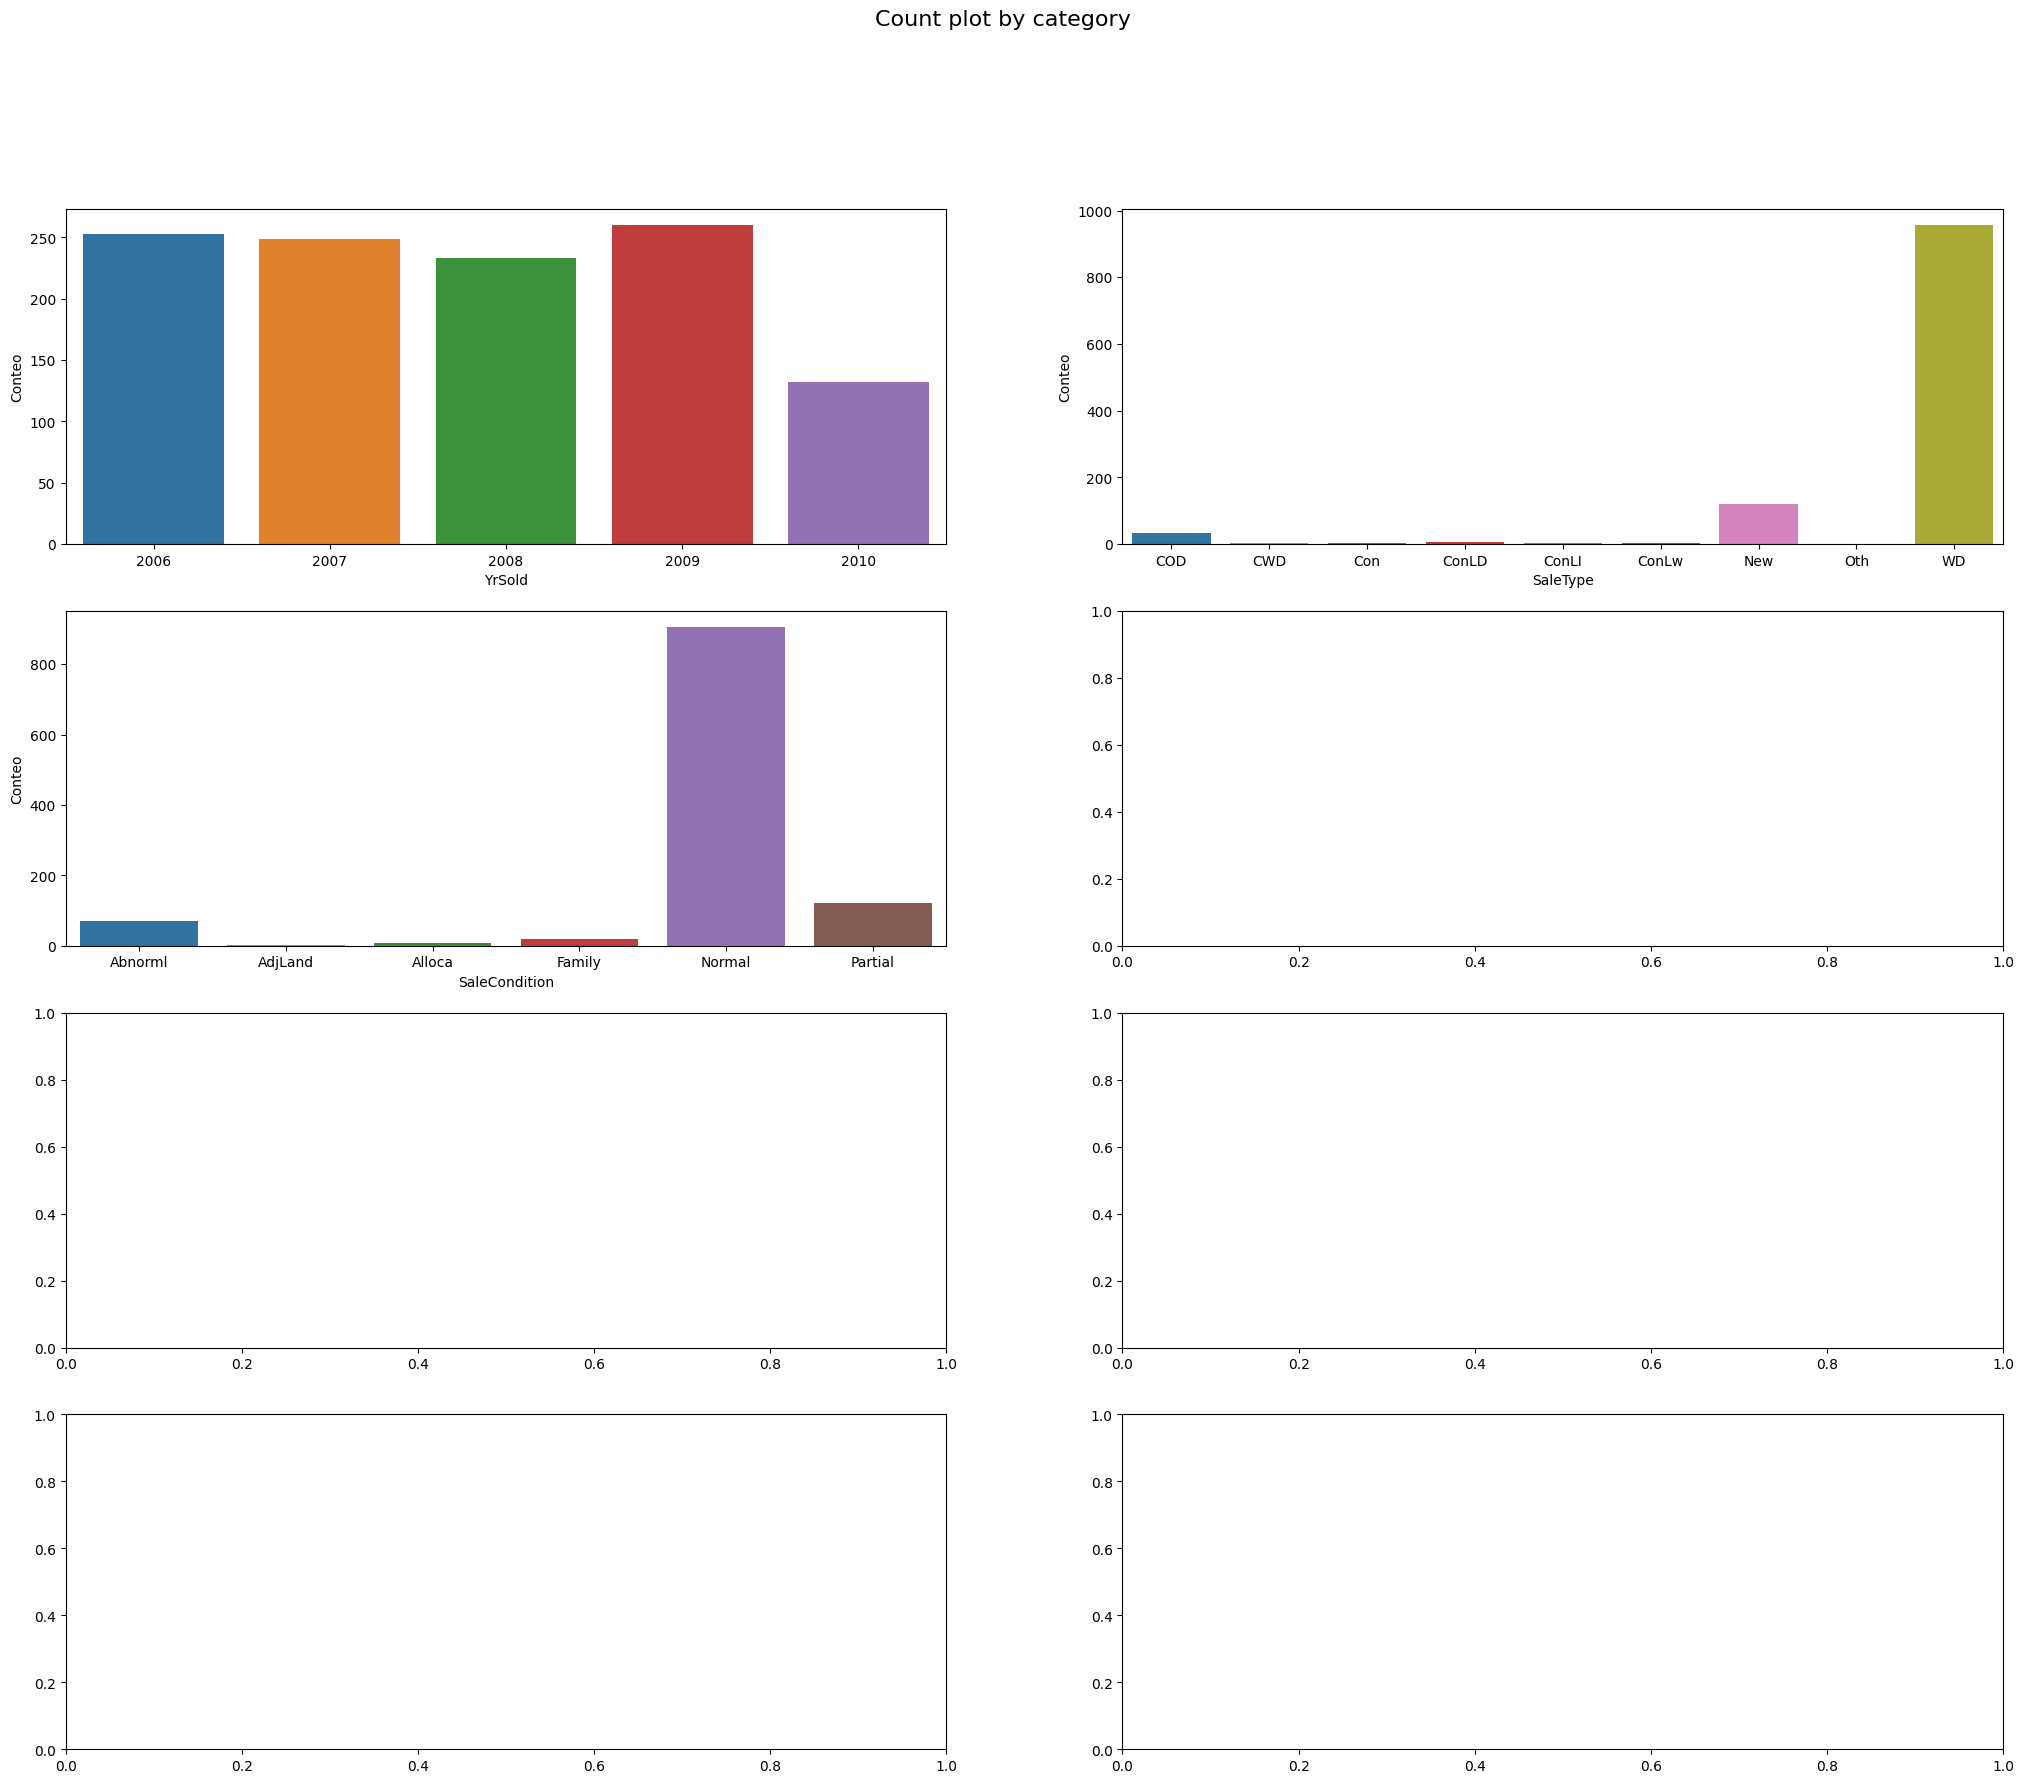

In [ ]:
## Imprimimos diagramas de barrras por todas las varibles categoricas
for h  in range(0,len(columnas_categoricas),8):
  fig, axes = plt.subplots(4, 2, figsize=(25, 20))
  fig.suptitle("Count plot by category", fontsize=16)
  colcate = columnas_categoricas[h:h+8]
  for i, column_ in enumerate(colcate):
      row = i // 2
      col = i % 2

      grouped_df = df.groupby(column_).size().reset_index(name='Conteo')
      sns.barplot(x=column_, y='Conteo', data=grouped_df, ax=axes[row, col])

      # Set plot labels

      axes[row, col].set_ylabel("Conteo")
      axes[row, col].set_xlabel(f"{column_}")

  # Show the plot
  plt.show()

## 5.2 Analisis Bivariable

In [ ]:
for columna in dff.columns:
    if columna != 'SalePrice':  # Evitar imprimir la correlación con sí misma (SalePrice)
        correlacion = correlation_matrix[columna]['SalePrice']
        print(f"Correlación entre {columna} y SalePrice:".ljust(40), "\t\t{:.4f}%".format(correlacion))

Correlación entre MSSubClass y SalePrice: 		-0.0896%
Correlación entre MSZoning y SalePrice:  		-0.1656%
Correlación entre LotFrontage y SalePrice: 		0.3459%
Correlación entre LotArea y SalePrice:   		0.2995%
Correlación entre Street y SalePrice:    		0.0555%
Correlación entre LotShape y SalePrice:  		-0.3184%
Correlación entre LandContour y SalePrice: 		0.0118%
Correlación entre LotConfig y SalePrice: 		-0.0716%
Correlación entre LandSlope y SalePrice: 		0.0368%
Correlación entre Neighborhood y SalePrice: 		0.2377%
Correlación entre Condition1 y SalePrice: 		0.0734%
Correlación entre Condition2 y SalePrice: 		0.0343%
Correlación entre BldgType y SalePrice:  		-0.0778%
Correlación entre HouseStyle y SalePrice: 		0.1749%
Correlación entre OverallQual y SalePrice: 		0.7991%
Correlación entre OverallCond y SalePrice: 		-0.1255%
Correlación entre YearBuilt y SalePrice: 		0.5252%
Correlación entre YearRemodAdd y SalePrice: 		0.5209%
Correlación entre RoofStyle y SalePrice: 		0.2435%
Correla

### 5.2.1 Numeric features - LINEAR PLOTS

Text(0.5, 0.98, 'Sale Price by numeric features')

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by LotFrontage')

Text(0, 0.5, 'Value')

Text(0.5, 0, 'LotFrontage')

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by MasVnrArea')

Text(0, 0.5, 'Value')

Text(0.5, 0, 'MasVnrArea')

<Axes: xlabel='GarageYrBlt', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by GarageYrBlt')

Text(0, 0.5, 'Value')

Text(0.5, 0, 'GarageYrBlt')

<Axes: xlabel='LotArea', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by LotArea')

Text(0, 0.5, 'Value')

Text(0.5, 0, 'LotArea')

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by YearBuilt')

Text(0, 0.5, 'Value')

Text(0.5, 0, 'YearBuilt')

<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by YearRemodAdd')

Text(0, 0.5, 'Value')

Text(0.5, 0, 'YearRemodAdd')

<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by BsmtFinSF1')

Text(0, 0.5, 'Value')

Text(0.5, 0, 'BsmtFinSF1')

<Axes: xlabel='BsmtFinSF2', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by BsmtFinSF2')

Text(0, 0.5, 'Value')

Text(0.5, 0, 'BsmtFinSF2')

<Axes: xlabel='BsmtUnfSF', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by BsmtUnfSF')

Text(0, 0.5, 'Value')

Text(0.5, 0, 'BsmtUnfSF')

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by TotalBsmtSF')

Text(0, 0.5, 'Value')

Text(0.5, 0, 'TotalBsmtSF')

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by 1stFlrSF')

Text(0, 0.5, 'Value')

Text(0.5, 0, '1stFlrSF')

<Axes: xlabel='2ndFlrSF', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by 2ndFlrSF')

Text(0, 0.5, 'Value')

Text(0.5, 0, '2ndFlrSF')

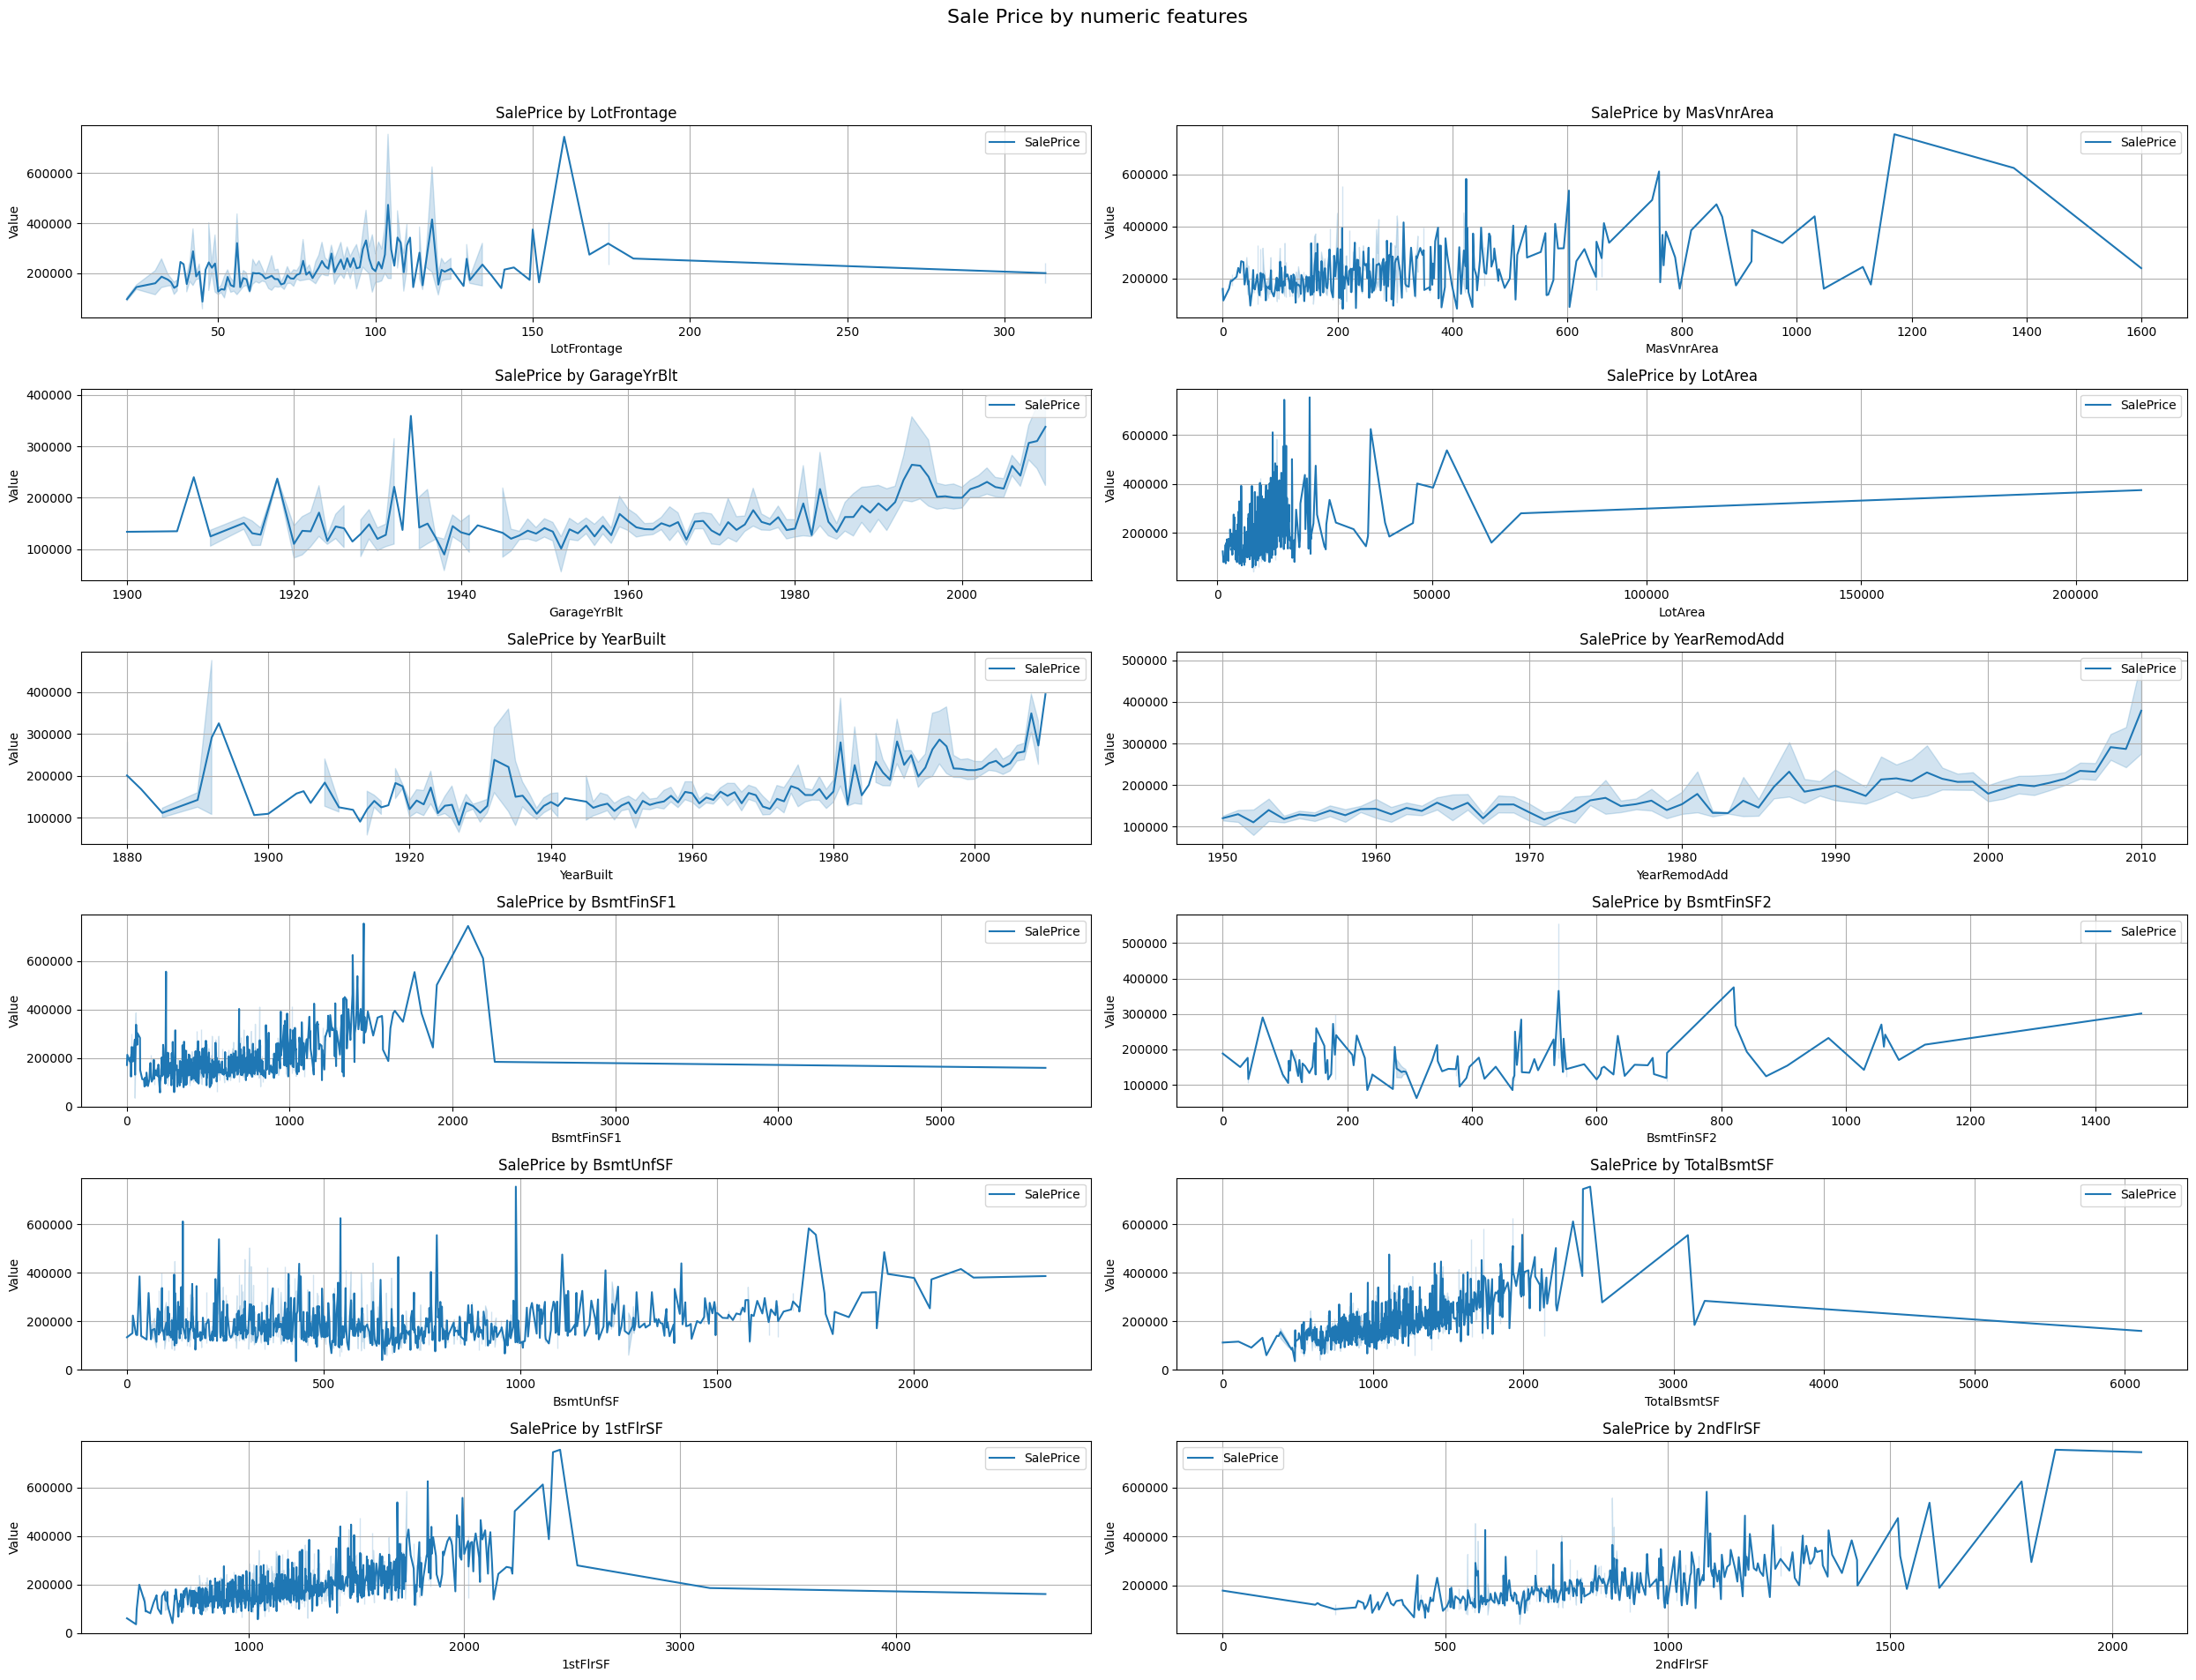

Text(0.5, 0.98, 'Sale Price by numeric features')

<Axes: xlabel='LowQualFinSF', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by LowQualFinSF')

Text(0, 0.5, 'Value')

Text(0.5, 0, 'LowQualFinSF')

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by GrLivArea')

Text(0, 0.5, 'Value')

Text(0.5, 0, 'GrLivArea')

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by GarageArea')

Text(0, 0.5, 'Value')

Text(0.5, 0, 'GarageArea')

<Axes: xlabel='WoodDeckSF', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by WoodDeckSF')

Text(0, 0.5, 'Value')

Text(0.5, 0, 'WoodDeckSF')

<Axes: xlabel='OpenPorchSF', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by OpenPorchSF')

Text(0, 0.5, 'Value')

Text(0.5, 0, 'OpenPorchSF')

<Axes: xlabel='EnclosedPorch', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by EnclosedPorch')

Text(0, 0.5, 'Value')

Text(0.5, 0, 'EnclosedPorch')

<Axes: xlabel='3SsnPorch', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by 3SsnPorch')

Text(0, 0.5, 'Value')

Text(0.5, 0, '3SsnPorch')

<Axes: xlabel='ScreenPorch', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by ScreenPorch')

Text(0, 0.5, 'Value')

Text(0.5, 0, 'ScreenPorch')

<Axes: xlabel='PoolArea', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by PoolArea')

Text(0, 0.5, 'Value')

Text(0.5, 0, 'PoolArea')

<Axes: xlabel='MiscVal', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by MiscVal')

Text(0, 0.5, 'Value')

Text(0.5, 0, 'MiscVal')

<Axes: xlabel='SalePrice', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice by SalePrice')

Text(0, 0.5, 'Value')

Text(0.5, 0, 'SalePrice')

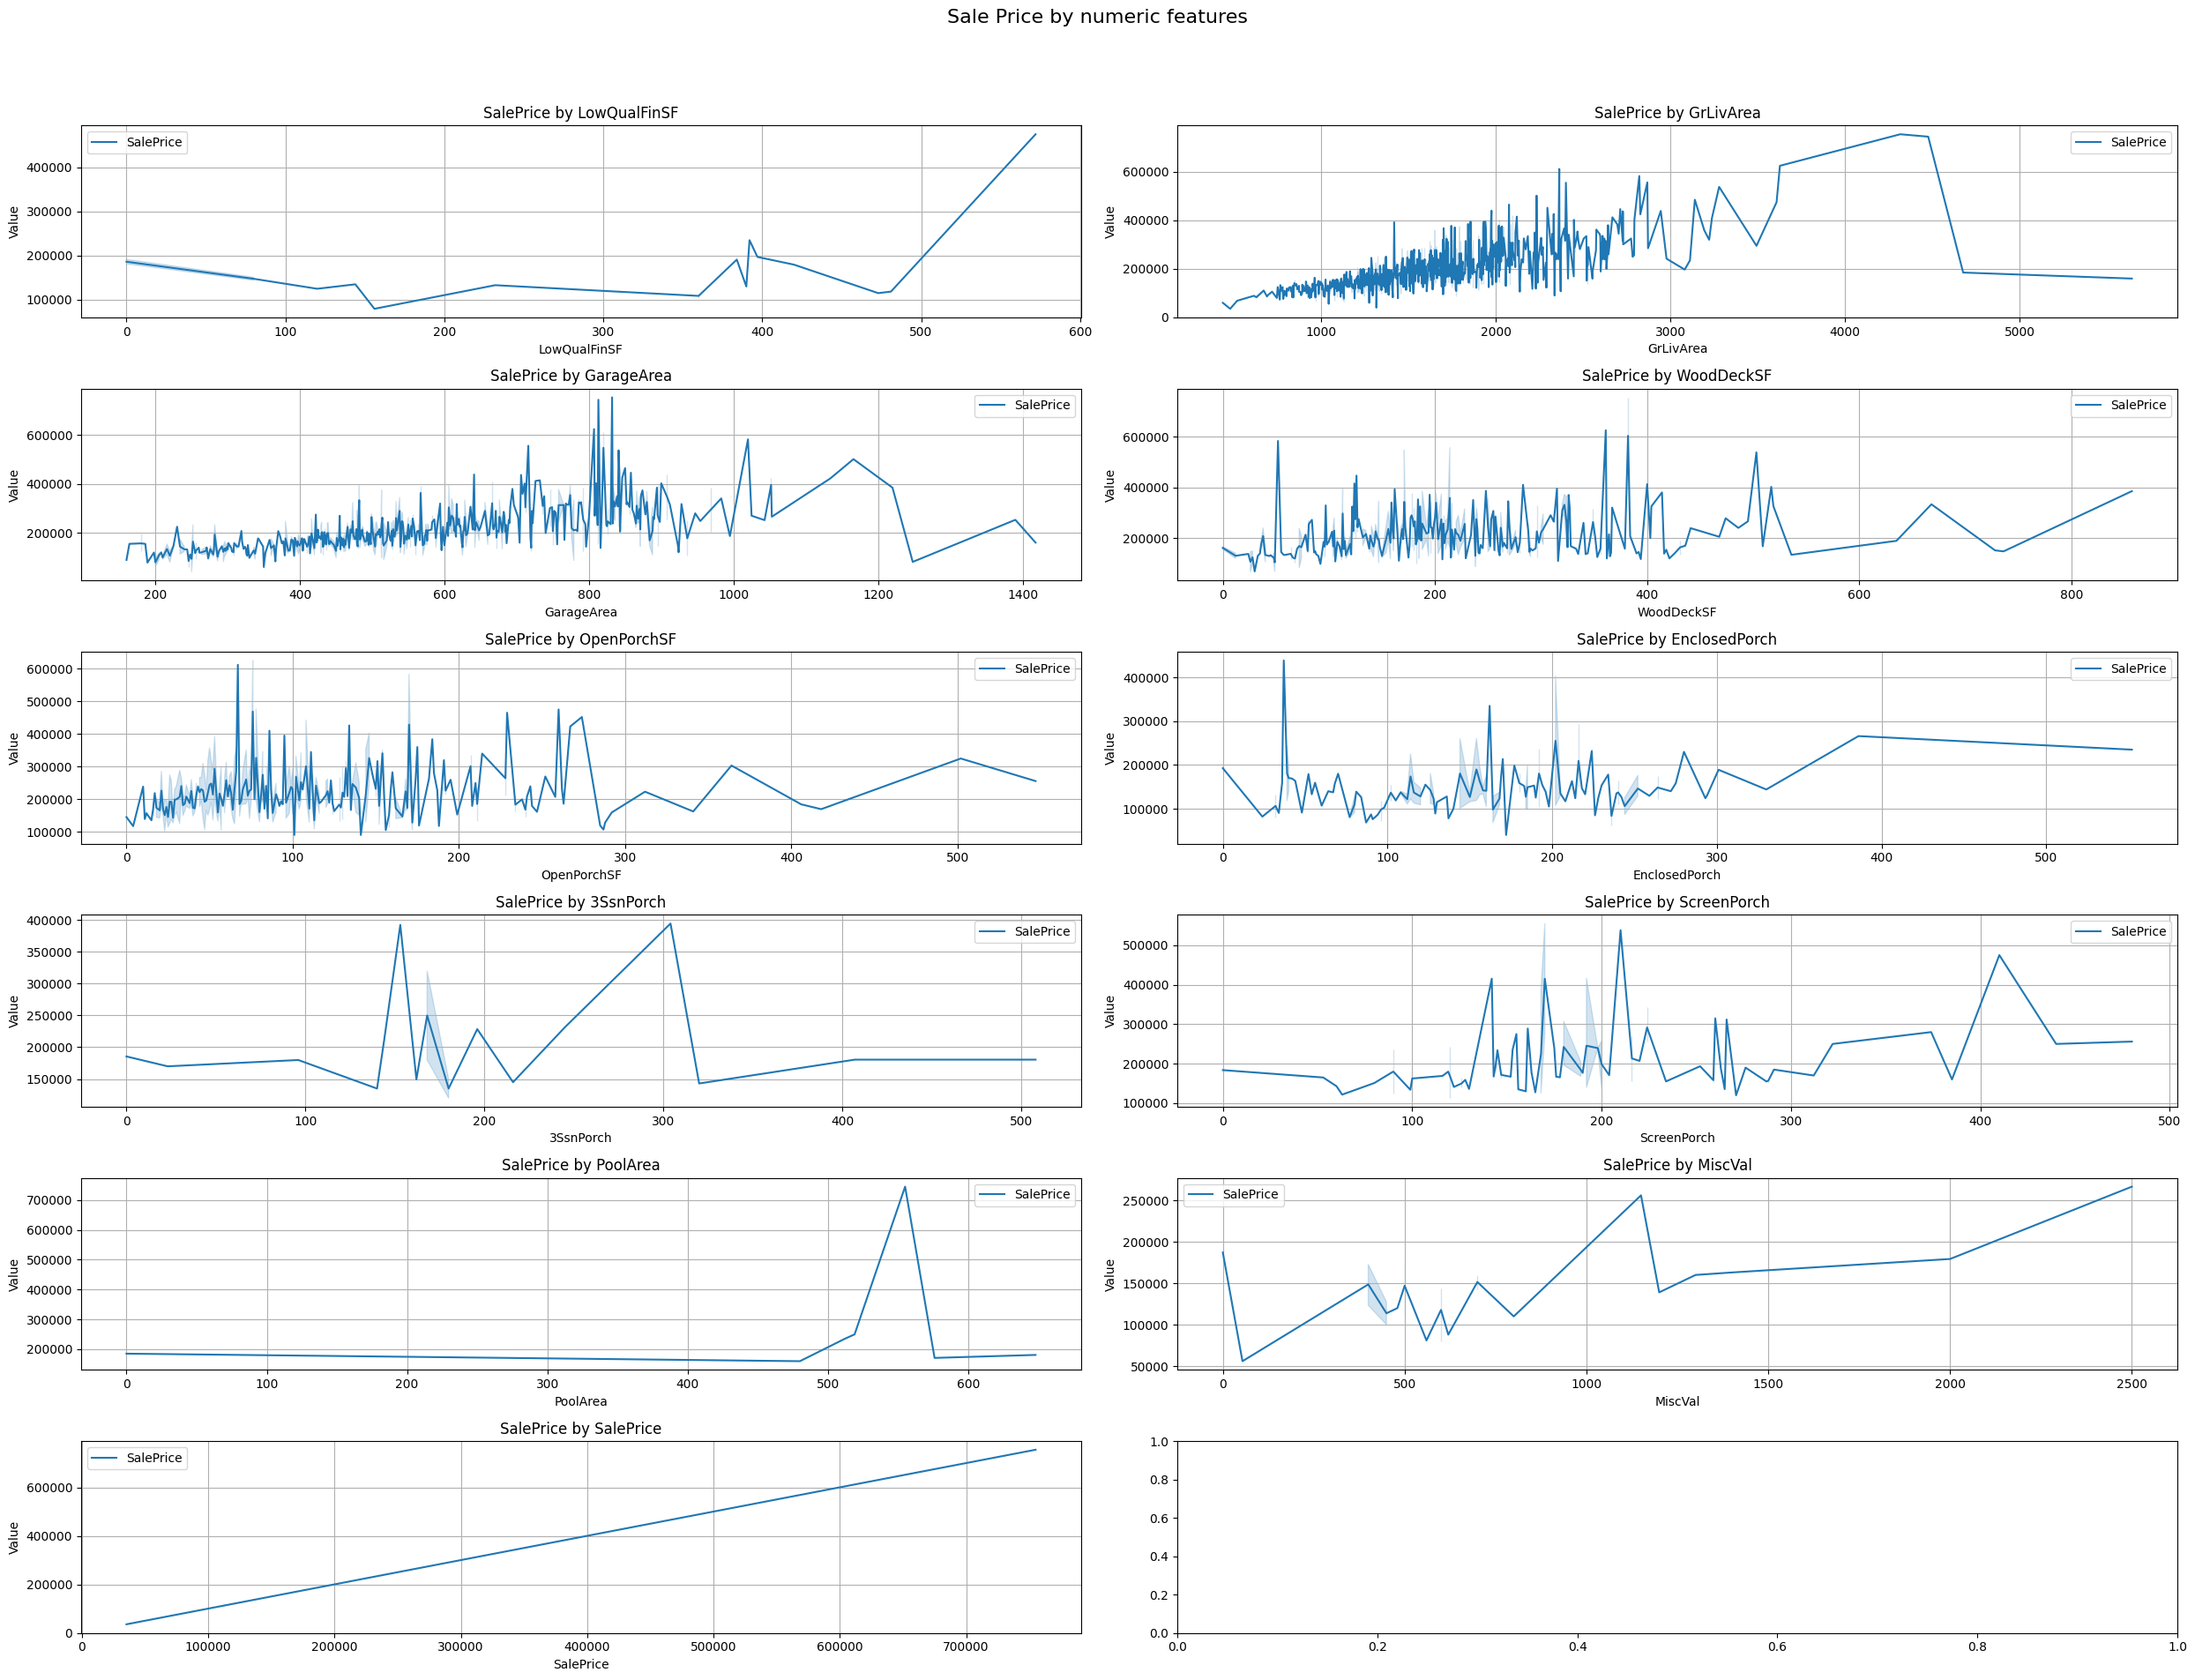

In [ ]:


for h  in range(0,len(columnas_numericas),12):
  colnume = columnas_numericas[h:h+12]
  # Create subplots
  fig, axes = plt.subplots(6, 2, figsize=(25, 20))
  fig.suptitle("Sale Price by numeric features", fontsize=16)

  for i, column_ in enumerate(colnume):
      row = i // 2
      col = i % 2
      sns.lineplot(x=column_, y="SalePrice", data=df, ax=axes[row, col], label="SalePrice")

      axes[row, col].set_title(f"SalePrice by {column_}")
      axes[row, col].set_ylabel("Value")
      axes[row, col].set_xlabel(f"{column_}")
      axes[row, col].legend()
      axes[row, col].grid(True)

  # Adjust layout
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show()

### 5.2.1 Categoric features - DIAGRAMAS DE BARRAS

Text(0.5, 0.98, 'SalePrice avg plot by category')

<Axes: xlabel='MSSubClass', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'MSSubClass')

<Axes: xlabel='MSZoning', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'MSZoning')

<Axes: xlabel='Street', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Street')

<Axes: xlabel='LotShape', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'LotShape')

<Axes: xlabel='LandContour', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'LandContour')

<Axes: xlabel='LotConfig', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'LotConfig')

<Axes: xlabel='LandSlope', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'LandSlope')

<Axes: xlabel='Neighborhood', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Neighborhood')

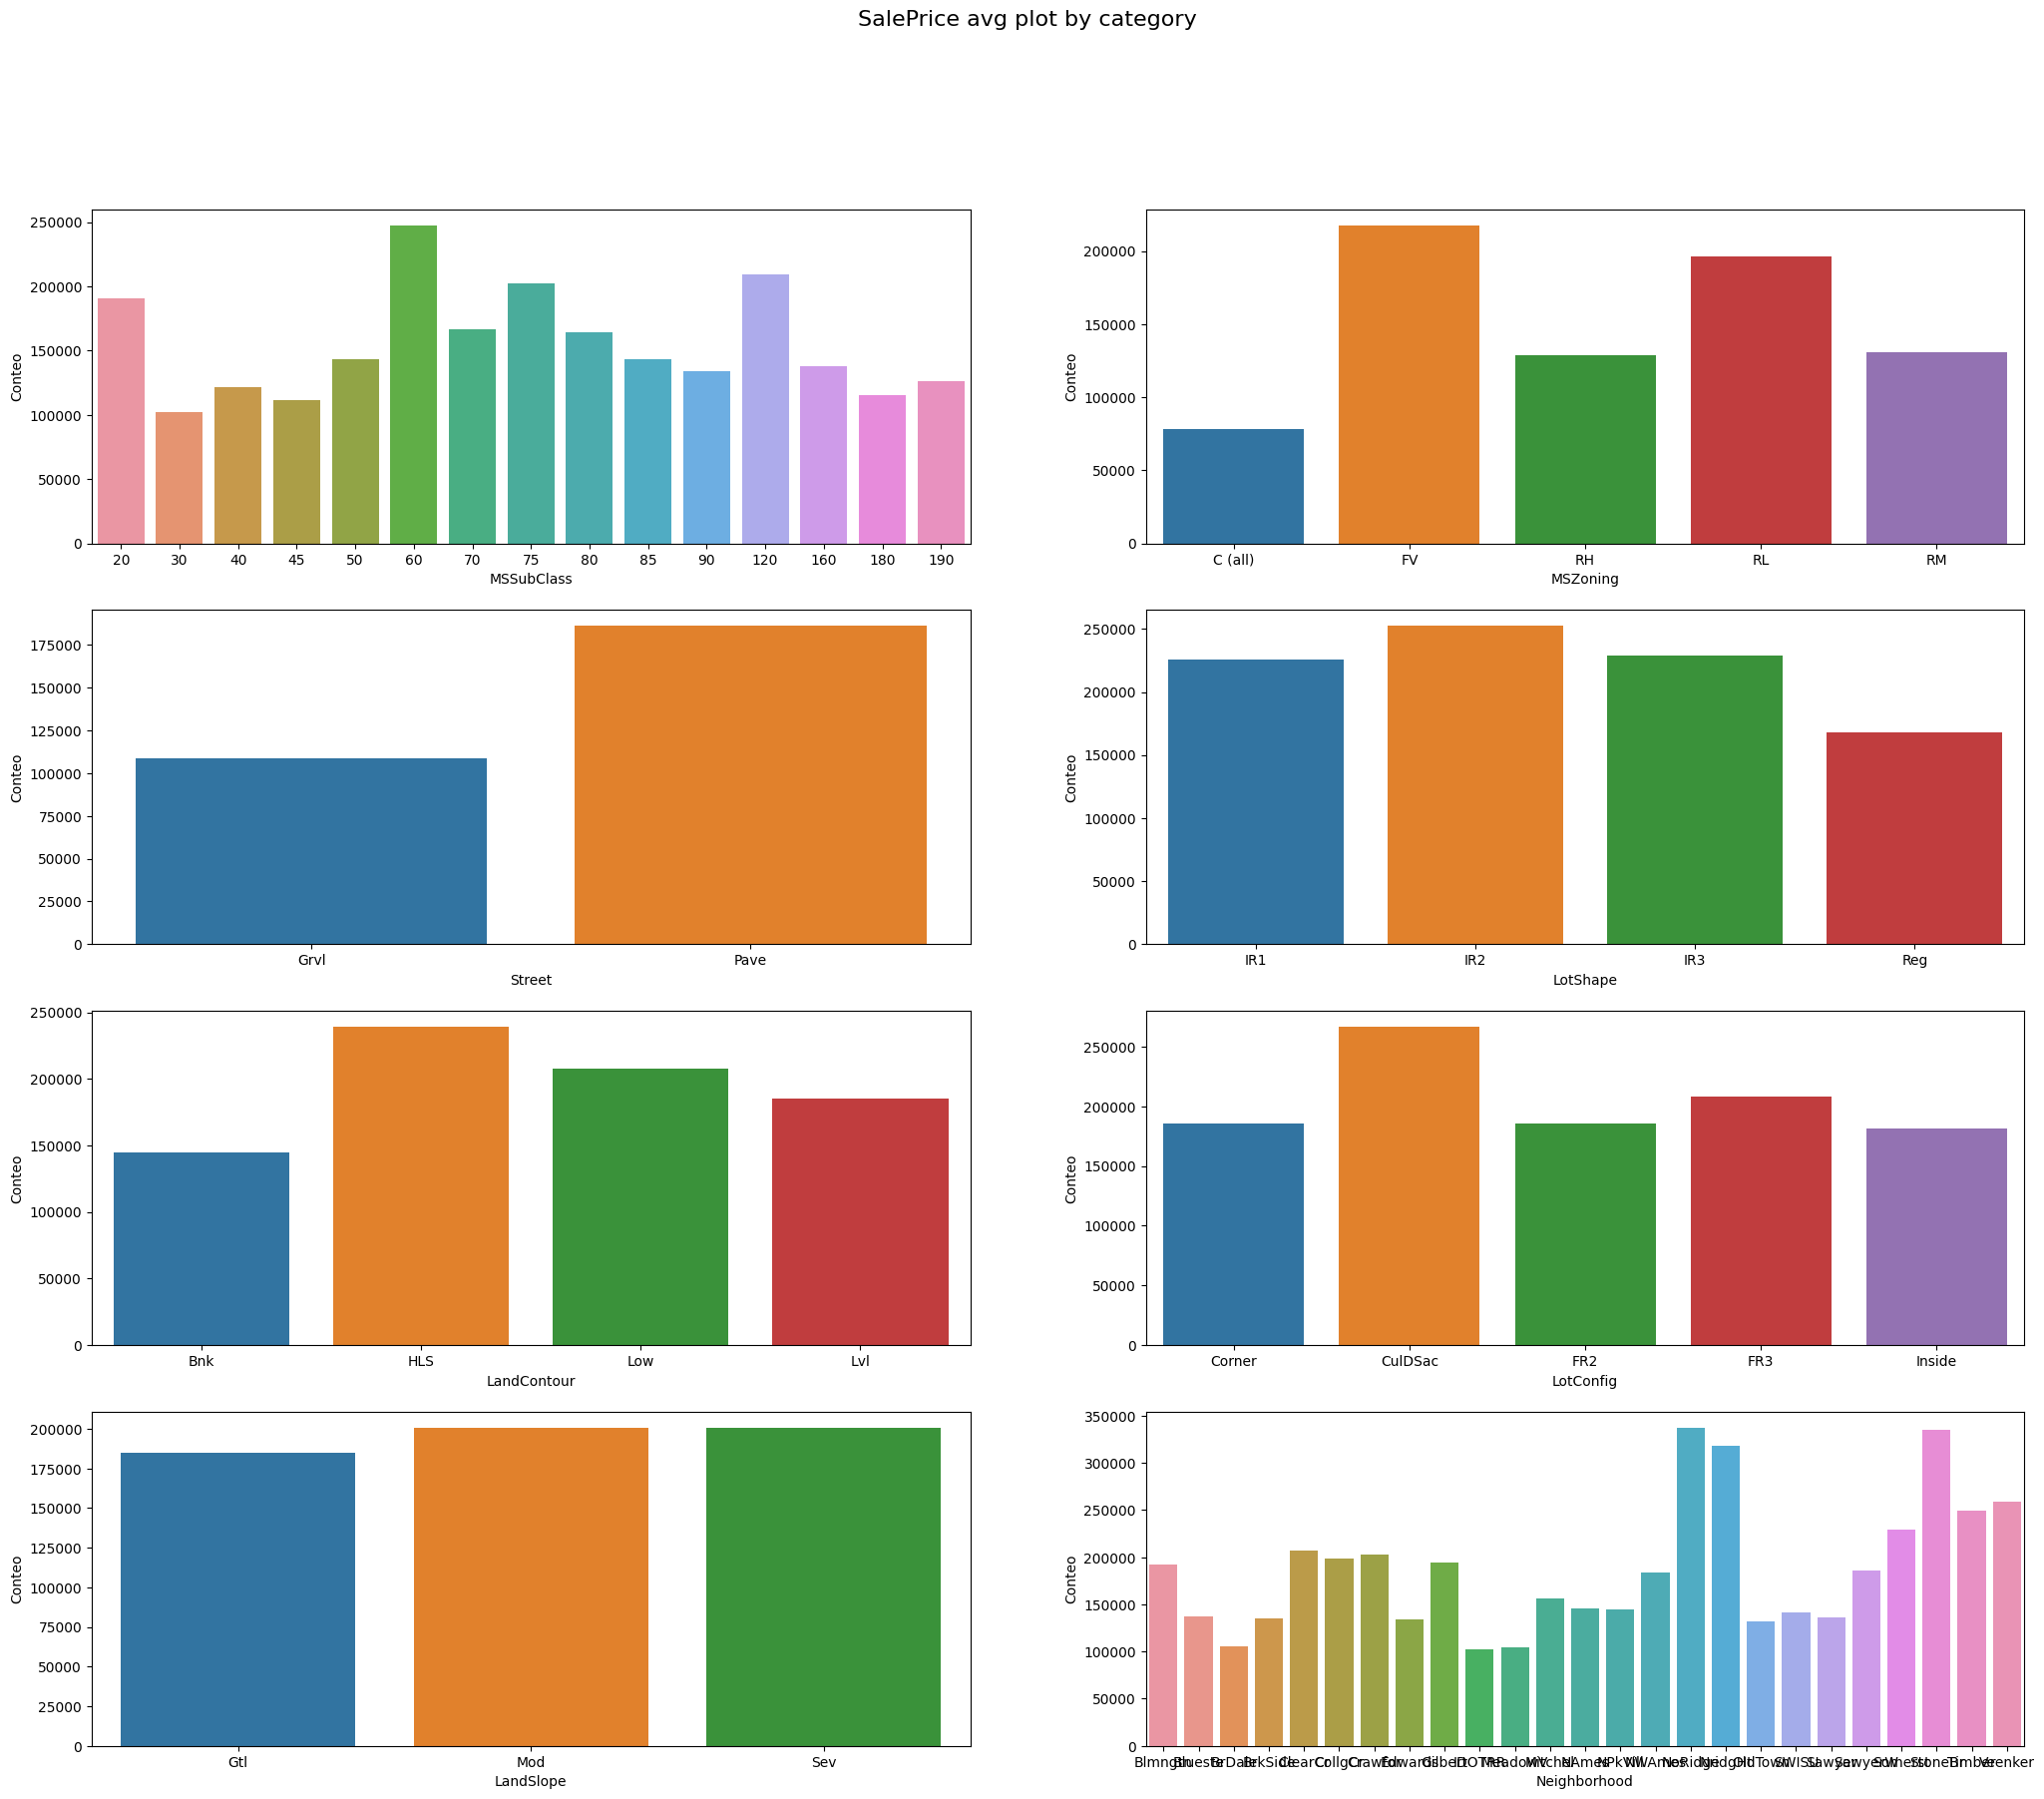

Text(0.5, 0.98, 'SalePrice avg plot by category')

<Axes: xlabel='Condition1', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Condition1')

<Axes: xlabel='Condition2', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Condition2')

<Axes: xlabel='BldgType', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'BldgType')

<Axes: xlabel='HouseStyle', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'HouseStyle')

<Axes: xlabel='OverallQual', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'OverallQual')

<Axes: xlabel='OverallCond', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'OverallCond')

<Axes: xlabel='RoofStyle', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'RoofStyle')

<Axes: xlabel='RoofMatl', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'RoofMatl')

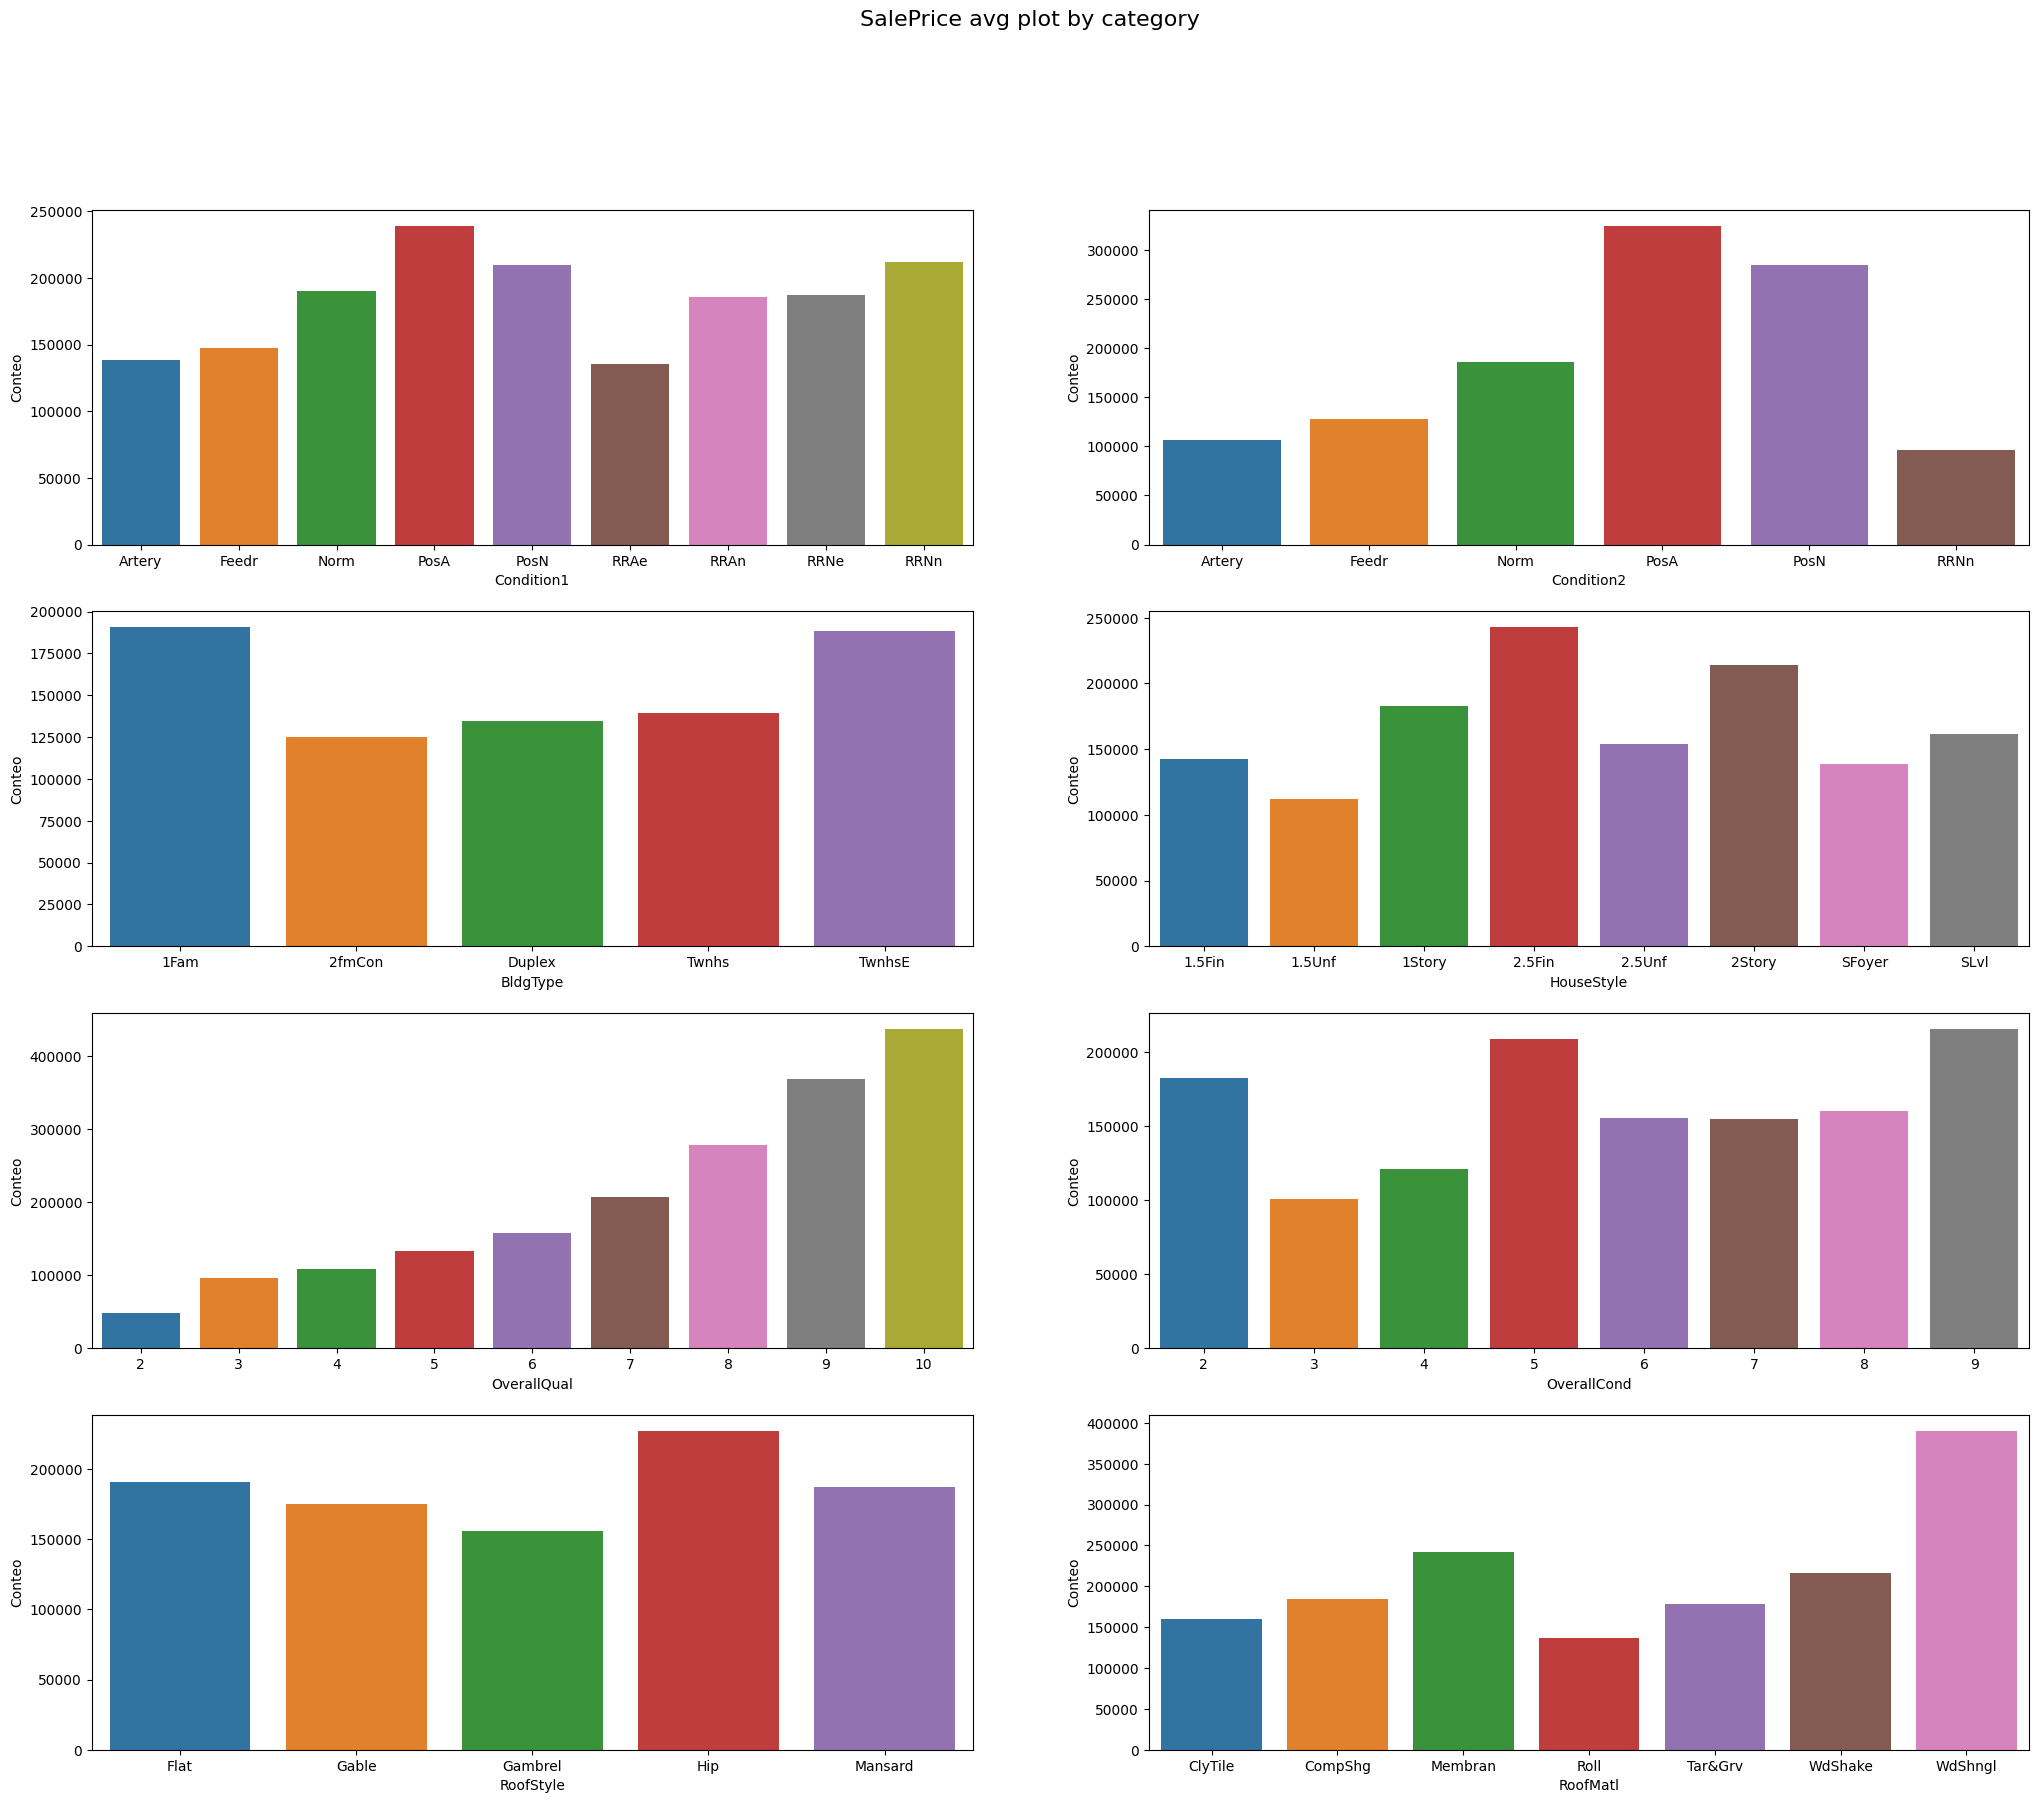

Text(0.5, 0.98, 'SalePrice avg plot by category')

<Axes: xlabel='Exterior1st', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Exterior1st')

<Axes: xlabel='Exterior2nd', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Exterior2nd')

<Axes: xlabel='MasVnrType', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'MasVnrType')

<Axes: xlabel='ExterQual', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'ExterQual')

<Axes: xlabel='ExterCond', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'ExterCond')

<Axes: xlabel='Foundation', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Foundation')

<Axes: xlabel='BsmtQual', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'BsmtQual')

<Axes: xlabel='BsmtCond', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'BsmtCond')

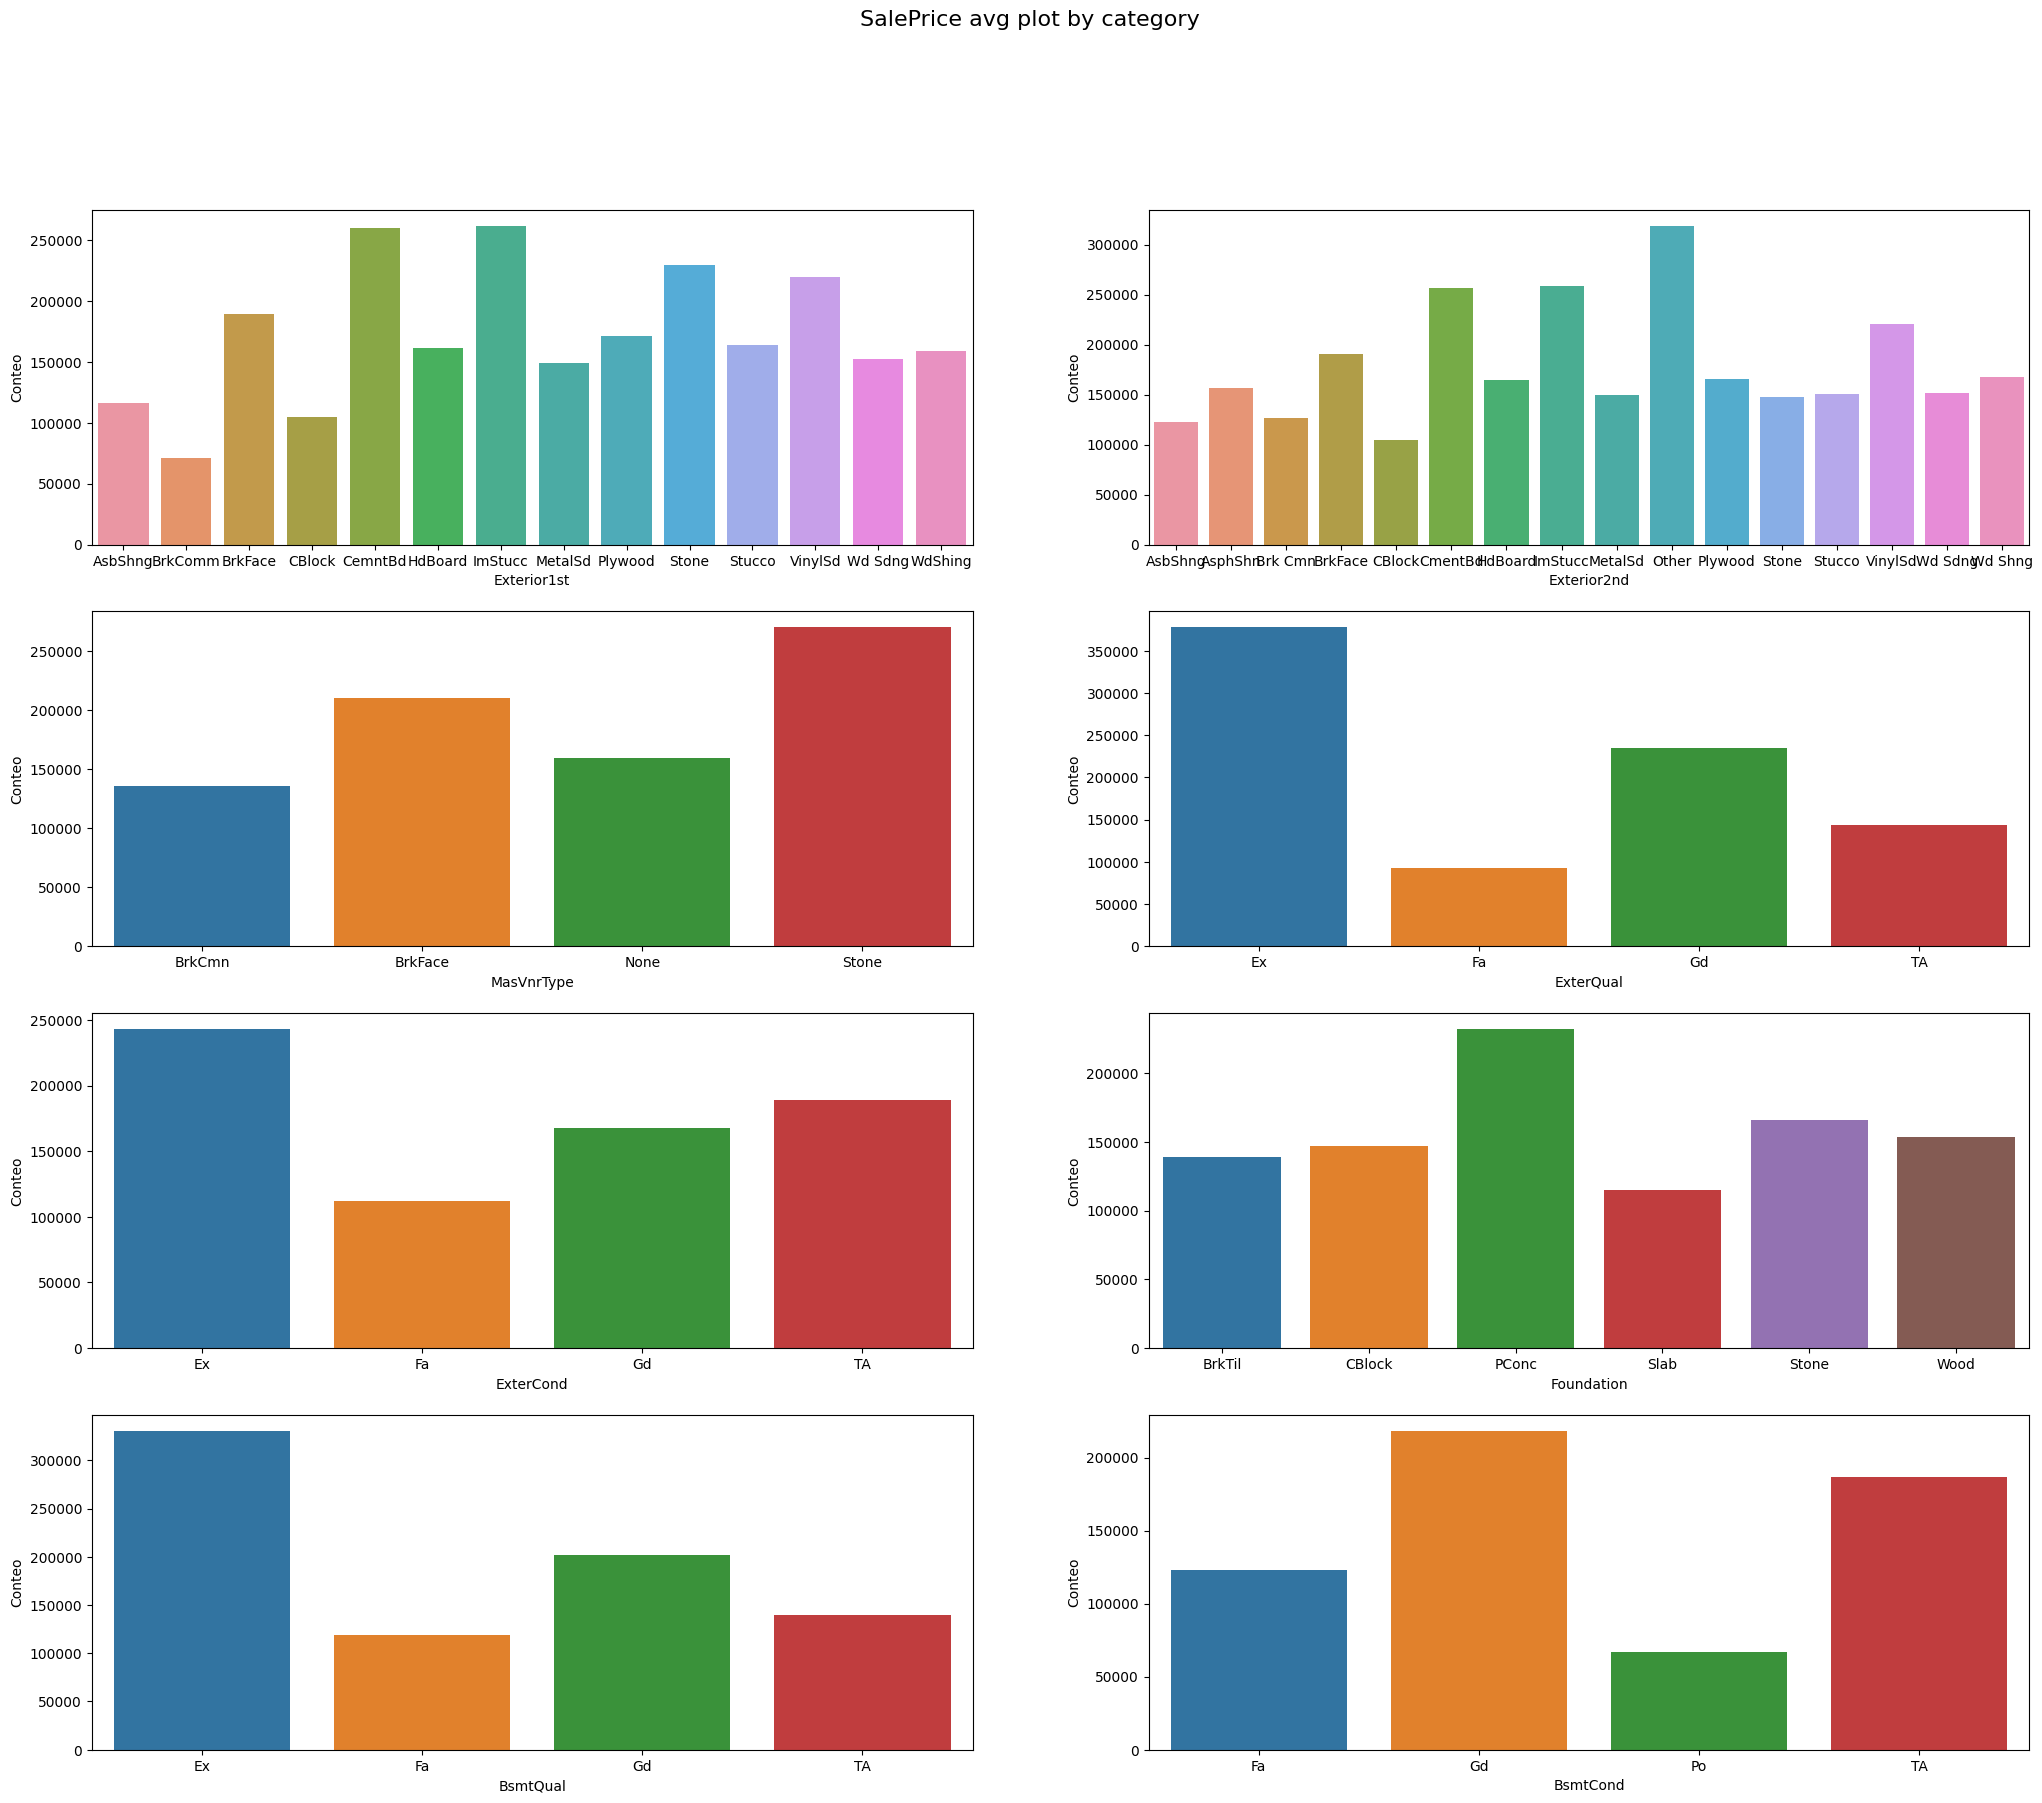

Text(0.5, 0.98, 'SalePrice avg plot by category')

<Axes: xlabel='BsmtExposure', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'BsmtExposure')

<Axes: xlabel='BsmtFinType1', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'BsmtFinType1')

<Axes: xlabel='BsmtFinType2', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'BsmtFinType2')

<Axes: xlabel='Heating', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Heating')

<Axes: xlabel='HeatingQC', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'HeatingQC')

<Axes: xlabel='CentralAir', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'CentralAir')

<Axes: xlabel='Electrical', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Electrical')

<Axes: xlabel='BsmtFullBath', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'BsmtFullBath')

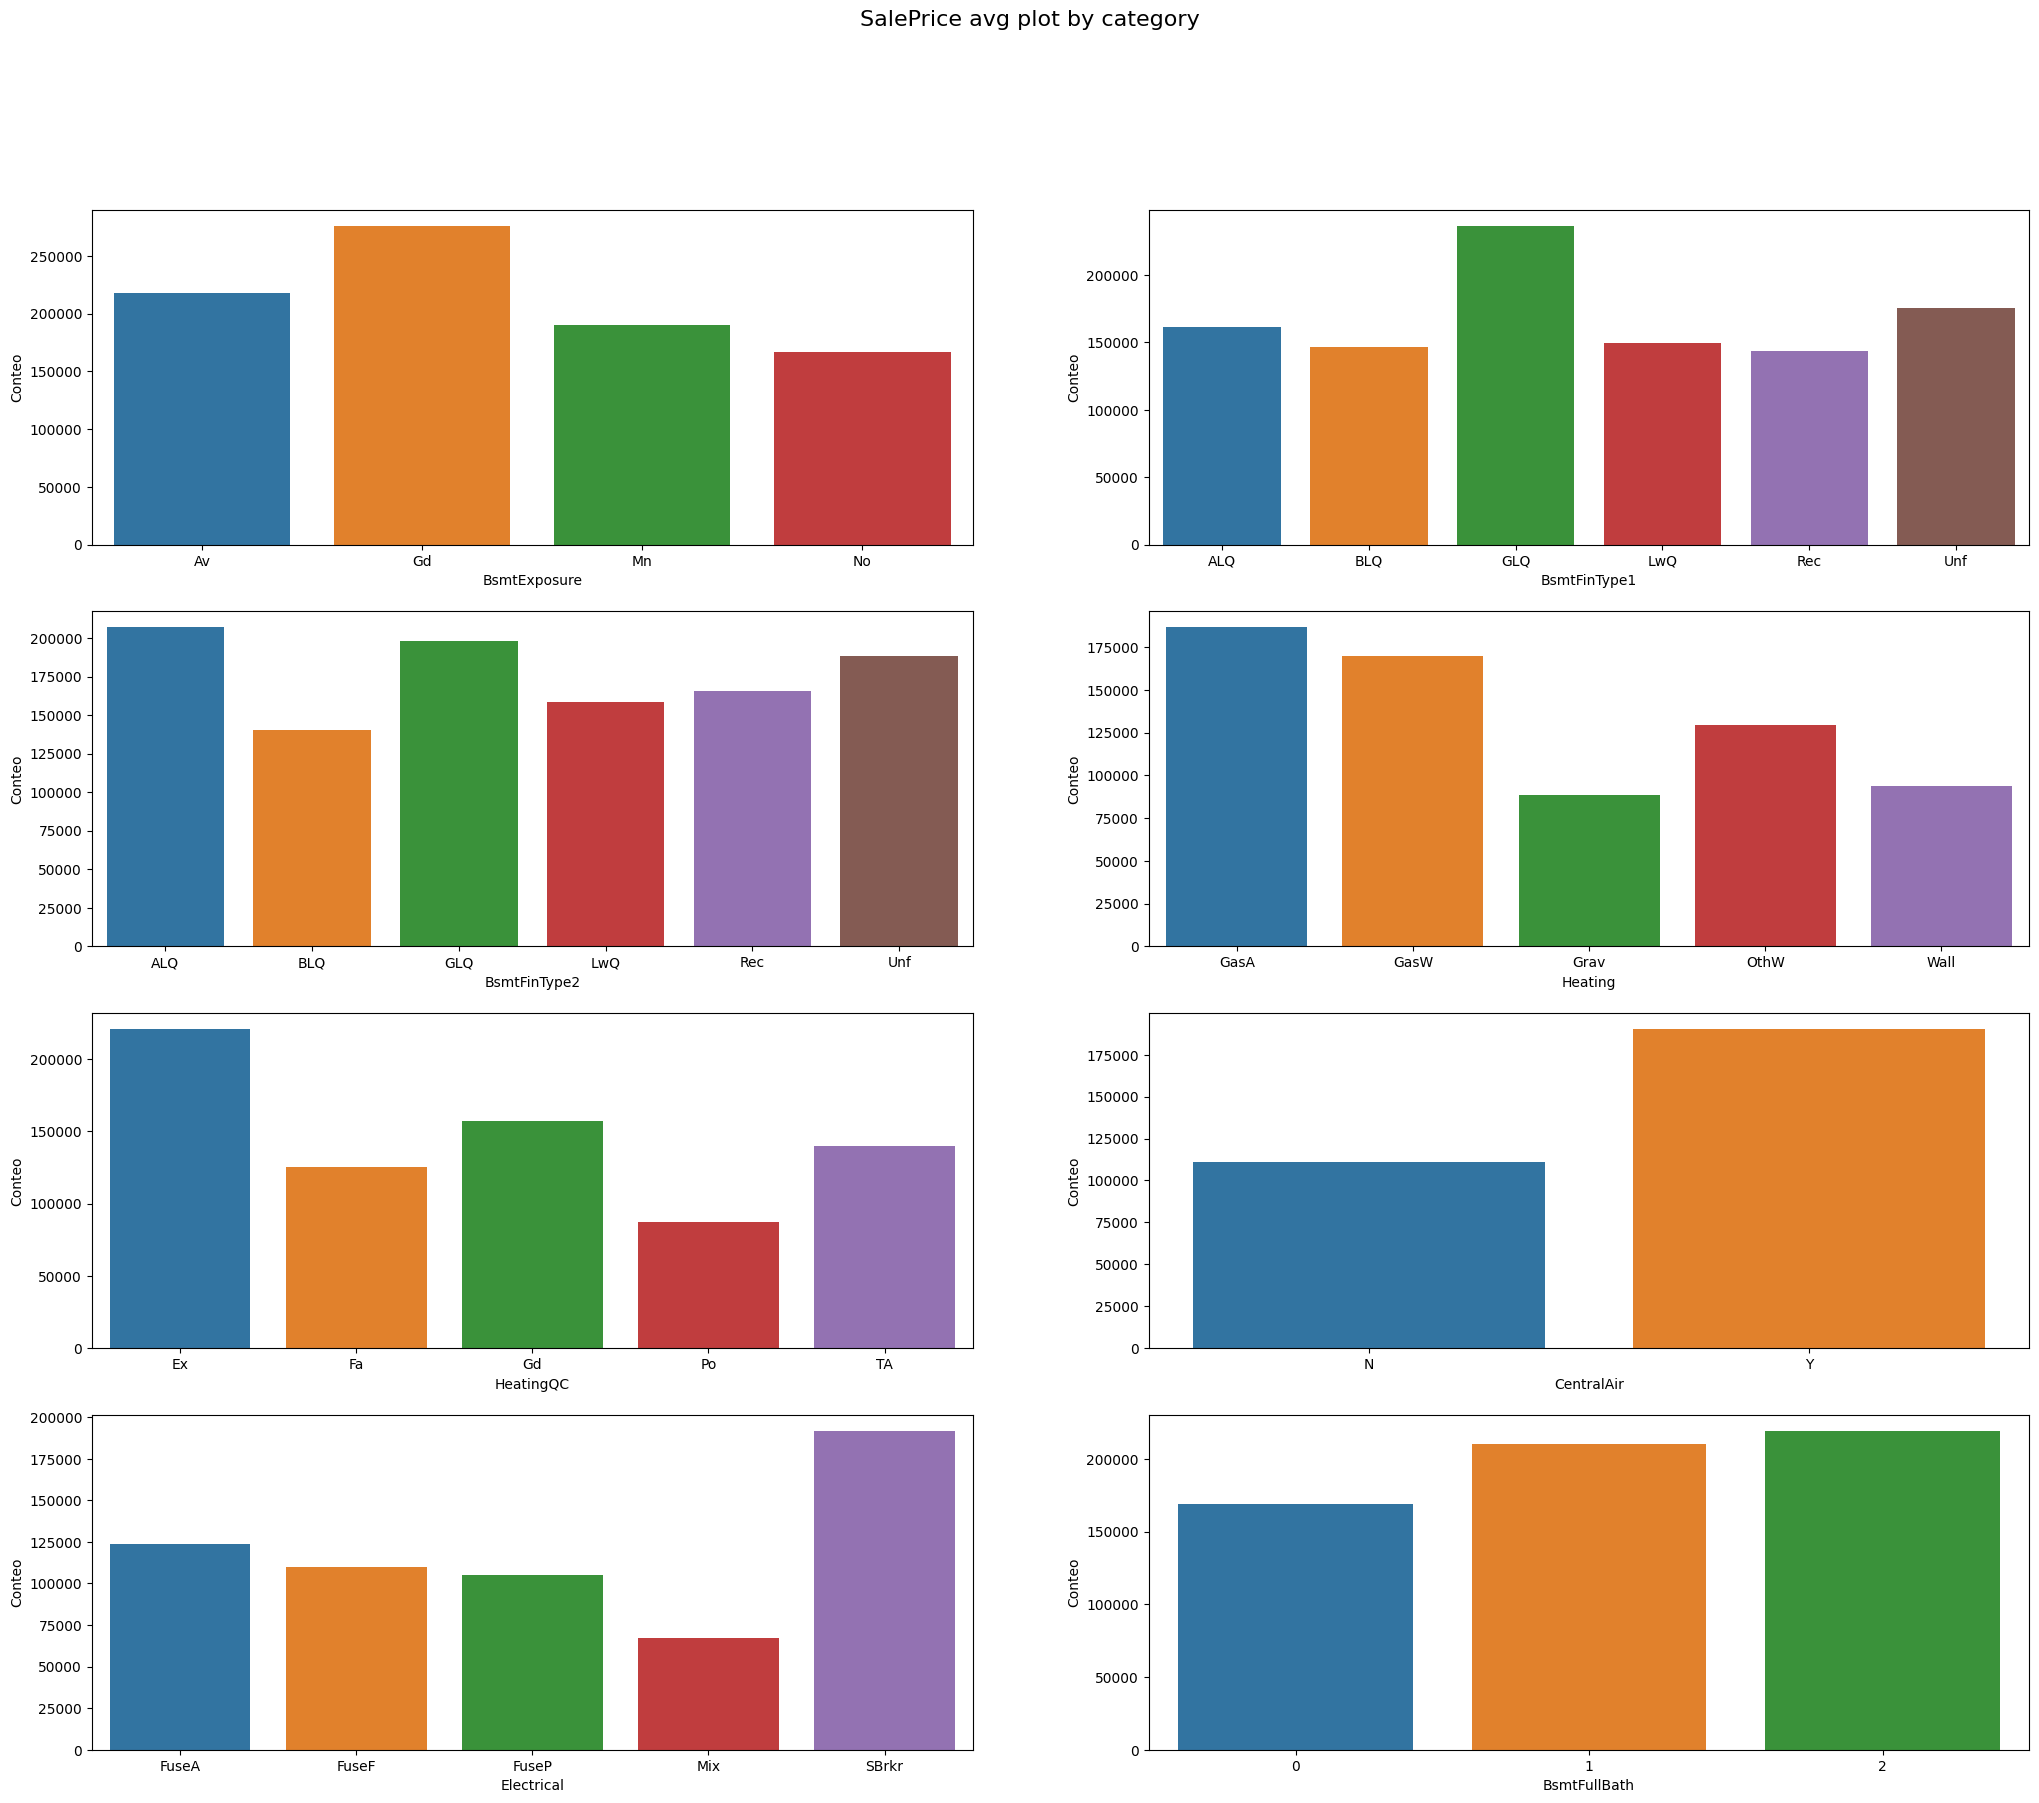

Text(0.5, 0.98, 'SalePrice avg plot by category')

<Axes: xlabel='BsmtHalfBath', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'BsmtHalfBath')

<Axes: xlabel='FullBath', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'FullBath')

<Axes: xlabel='HalfBath', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'HalfBath')

<Axes: xlabel='BedroomAbvGr', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'BedroomAbvGr')

<Axes: xlabel='KitchenAbvGr', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'KitchenAbvGr')

<Axes: xlabel='KitchenQual', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'KitchenQual')

<Axes: xlabel='TotRmsAbvGrd', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'TotRmsAbvGrd')

<Axes: xlabel='Functional', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Functional')

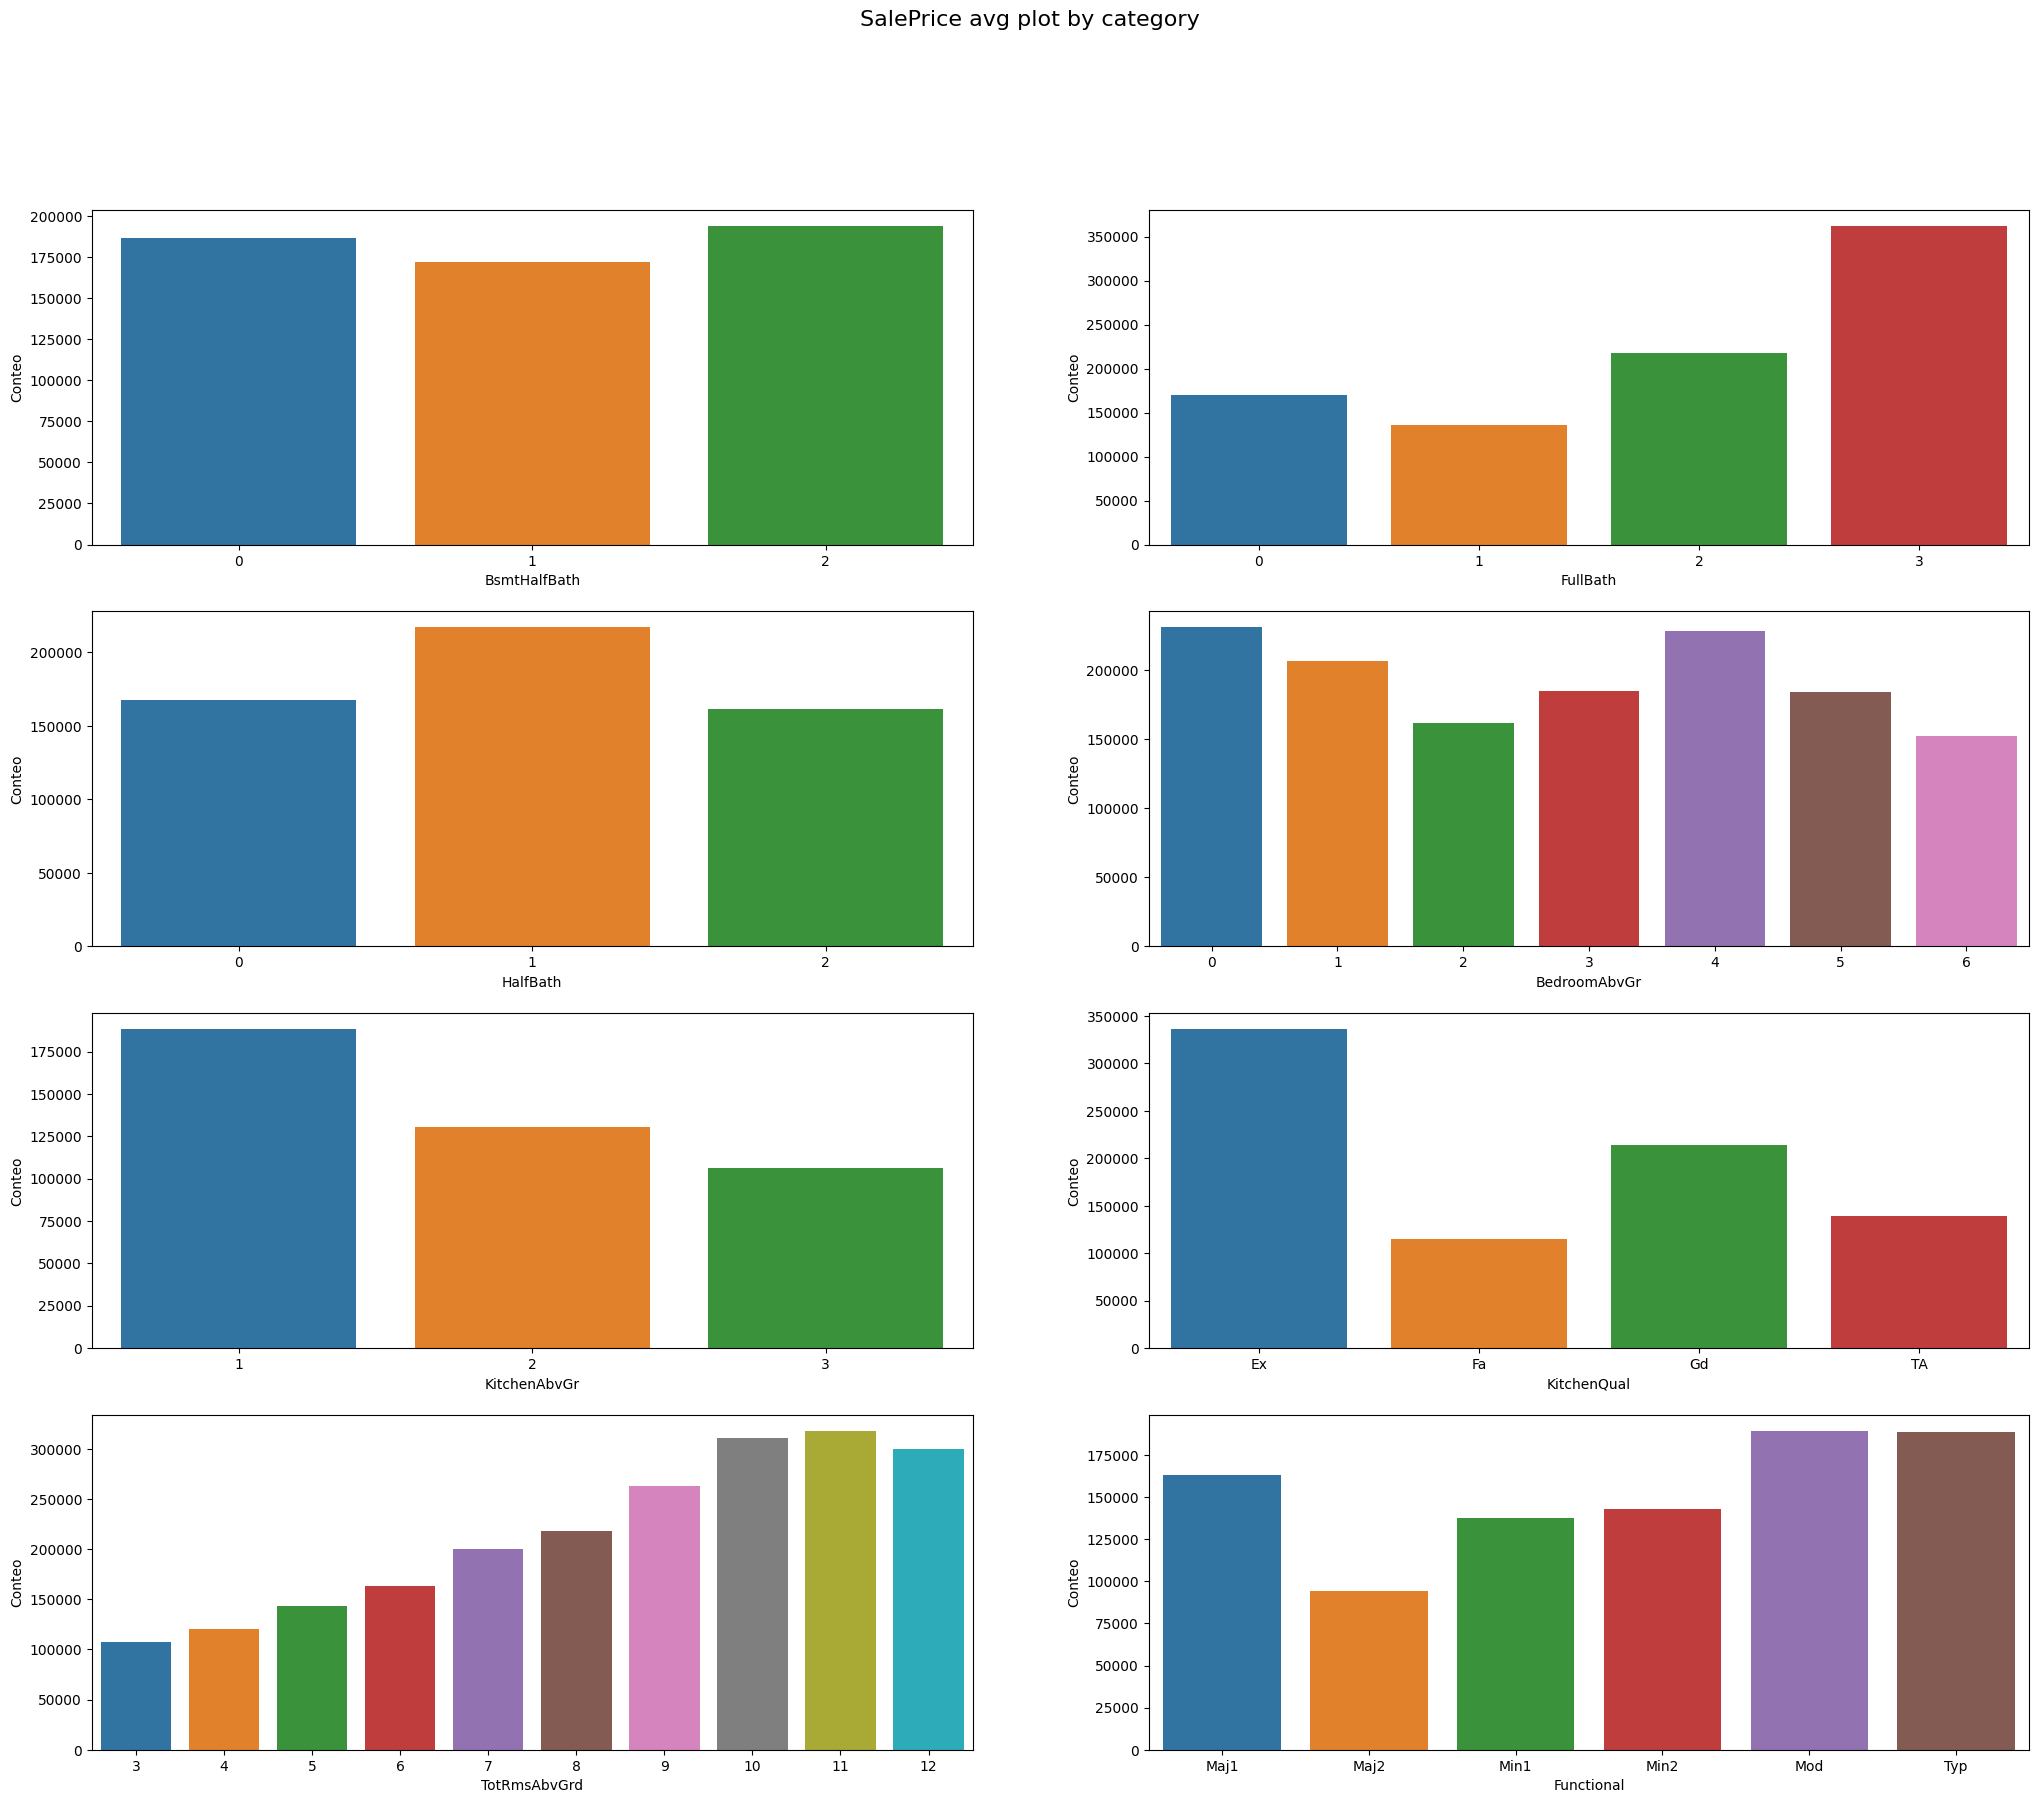

Text(0.5, 0.98, 'SalePrice avg plot by category')

<Axes: xlabel='Fireplaces', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'Fireplaces')

<Axes: xlabel='GarageType', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'GarageType')

<Axes: xlabel='GarageFinish', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'GarageFinish')

<Axes: xlabel='GarageCars', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'GarageCars')

<Axes: xlabel='GarageQual', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'GarageQual')

<Axes: xlabel='GarageCond', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'GarageCond')

<Axes: xlabel='PavedDrive', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'PavedDrive')

<Axes: xlabel='MoSold', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'MoSold')

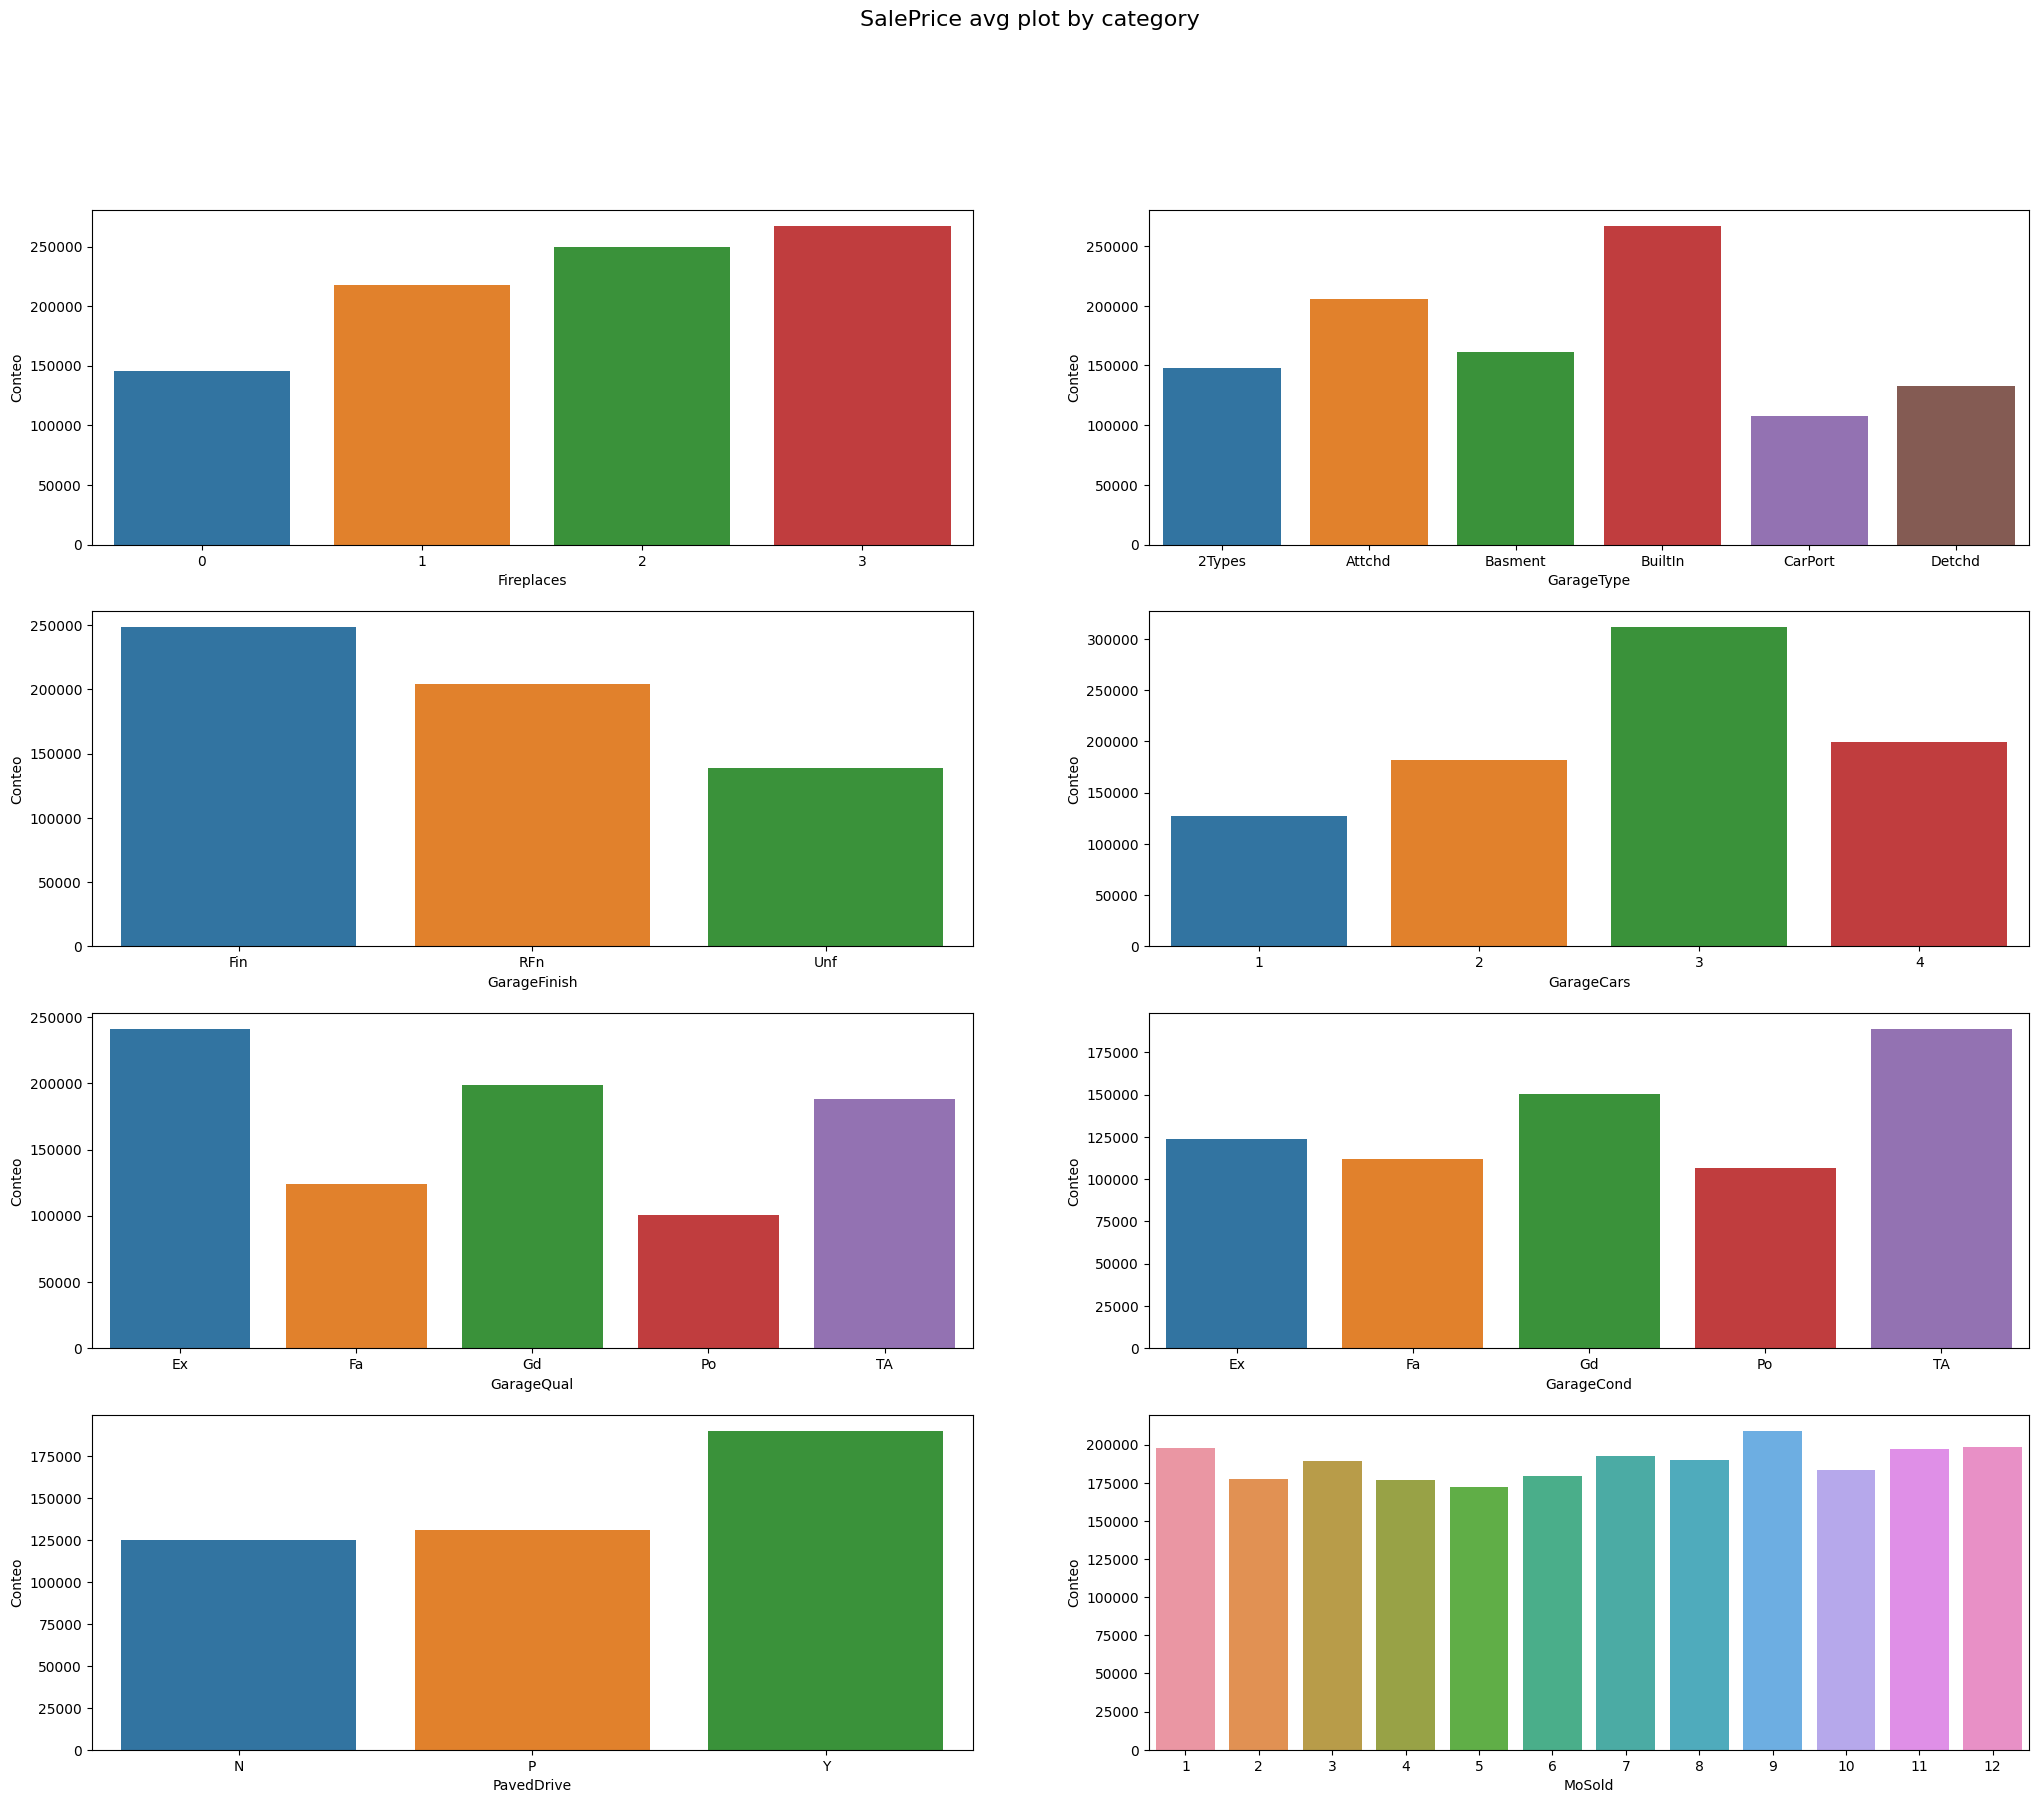

Text(0.5, 0.98, 'SalePrice avg plot by category')

<Axes: xlabel='YrSold', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'YrSold')

<Axes: xlabel='SaleType', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'SaleType')

<Axes: xlabel='SaleCondition', ylabel='Promedio'>

Text(0, 0.5, 'Conteo')

Text(0.5, 0, 'SaleCondition')

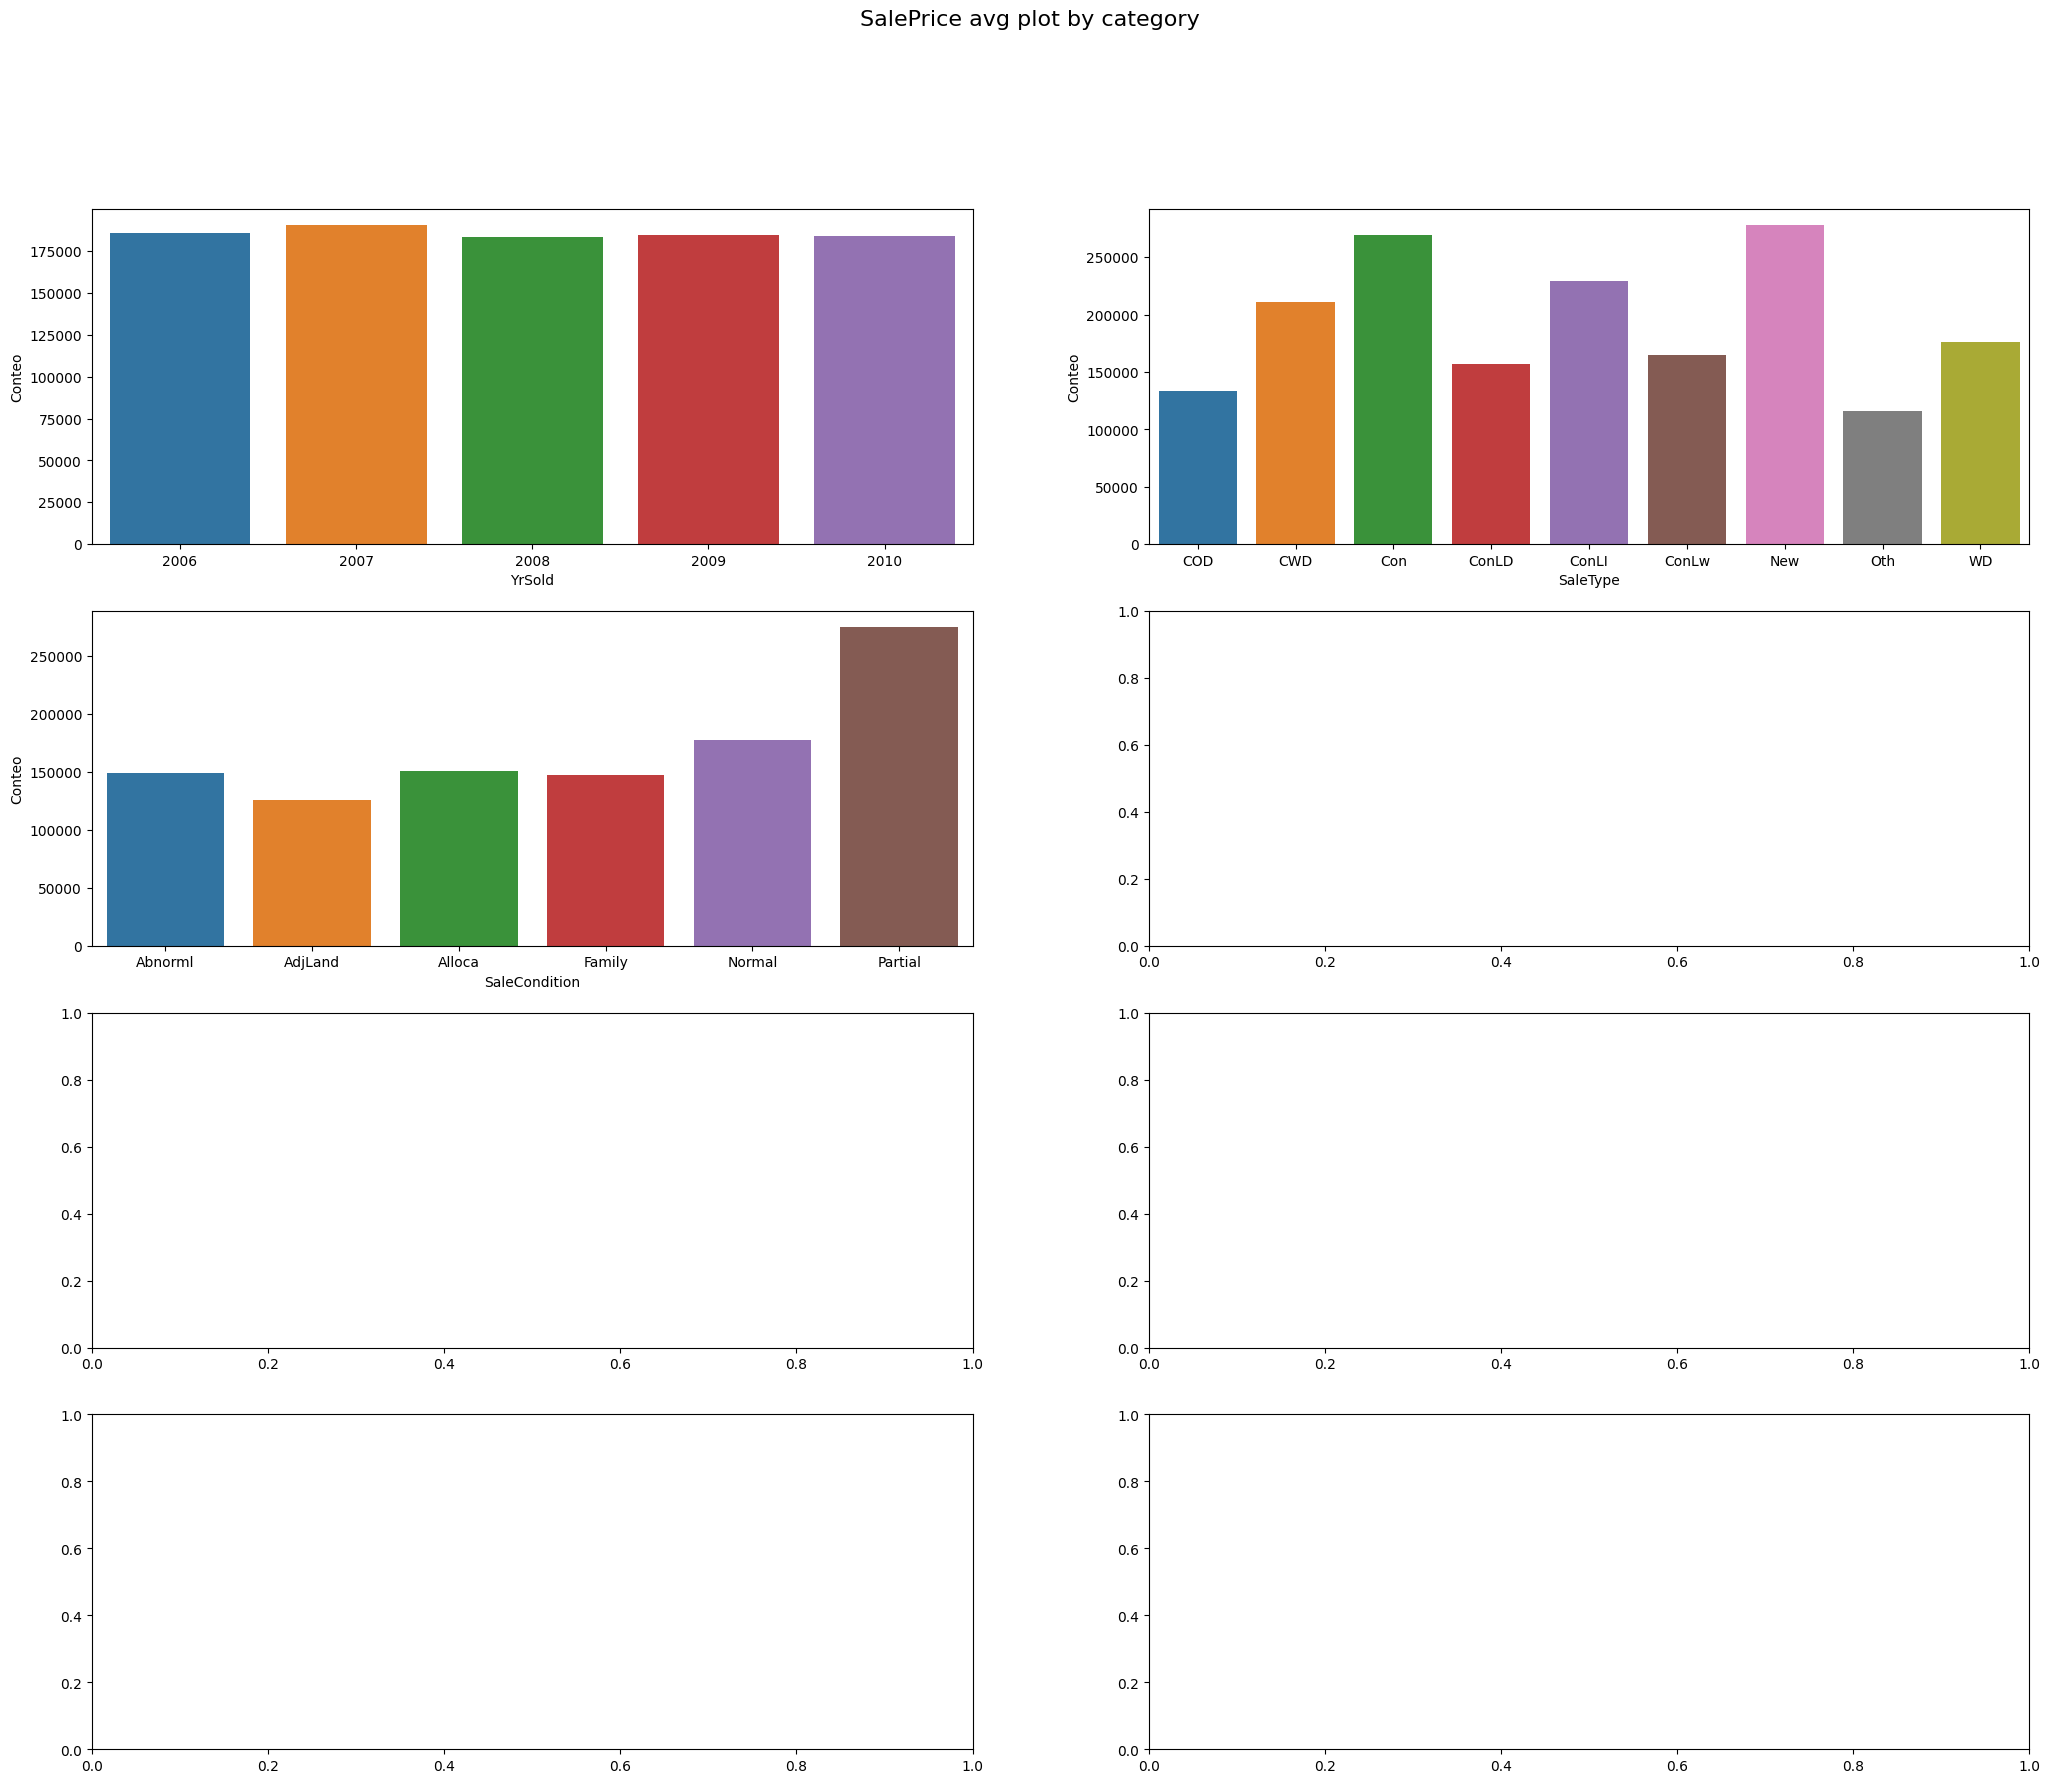

In [ ]:
## Imprimimos diagramas de barrras por todas las varibles categoricas versus el promedio de precio de venta
for h  in range(0,len(columnas_categoricas),8):
  fig, axes = plt.subplots(4, 2, figsize=(25, 20))
  fig.suptitle("SalePrice avg plot by category", fontsize=16)
  colcate = columnas_categoricas[h:h+8]
  for i, column_ in enumerate(colcate):
      row = i // 2
      col = i % 2

      grouped_df = df.groupby(column_)['SalePrice'].mean().reset_index(name='Promedio')
      sns.barplot(x=column_, y='Promedio', data=grouped_df, ax=axes[row, col])

      # Set plot labels
      axes[row, col].set_ylabel("Conteo")
      axes[row, col].set_xlabel(f"{column_}")


  # Show the plot
  plt.show()

# 6. Preparacion de Datos y Modelado


Revision de dataset despues de la limpieza

In [ ]:
dff

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0             60         3        65.00     8450       1         3   
1             20         3        80.00     9600       1         3   
2             60         3        68.00    11250       1         0   
3             70         3        60.00     9550       1         0   
4             60         3        84.00    14260       1         0   
...          ...       ...          ...      ...     ...       ...   
1455          60         3        62.00     7917       1         3   
1456          20         3        85.00    13175       1         3   
1457          70         3        66.00     9042       1         3   
1458          20         3        68.00     9717       1         3   
1459          20         3        75.00     9937       1         3   

      LandContour  LotConfig  LandSlope  Neighborhood  ...  EnclosedPorch  \
0               3          4          0             5  ...              0   
1               3          2          0            24  ...              0   
2               3          4          0             5  ...              0   
3               3          0          0             6  ...            272   
4               3          2          0            15  ...              0   
...           ...        ...        ...           ...  ...            ...   
1455            3          4          0             8  ...              0   
1456            3          4          0            14  ...              0   
1457            3          4          0             6  ...              0   
1458            3          4          0            12  ...            112   
1459            3          4          0             7  ...              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0             0            0         0        0       2    2008         8   
1             0            0         0        0       5    2007         8   
2             0            0         0        0       9    2008         8   
3             0            0         0        0       2    2006         8   
4             0            0         0        0      12    2008         8   
...         ...          ...       ...      ...     ...     ...       ...   
1455          0            0         0        0       8    2007         8   
1456          0            0         0        0       2    2010         8   
1457          0            0         0     2500       5    2010         8   
1458          0            0         0        0       4    2010         8   
1459          0            0         0        0       6    2008         8   

      SaleCondition  SalePrice  
0                 4     208500  
1                 4     181500  
2                 4     223500  
3                 0     140000  
4                 4     250000  
...             ...        ...  
1455              4     175000  
1456              4     210000  
1457              4     266500  
1458              4     142125  
1459              4     147500  

[1127 rows x 74 columns]

Separando nuestra variable objetivo: SalePrice

In [ ]:
X = dff.drop("SalePrice", axis=1)
y = dff["SalePrice"]

### 6.1 Splitting data into Train Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# 7. Construccion-del-Modelo


Utilizaremos las variantes "CV" (Validación Cruzada) de los modelos Ridge, Lasso y ElasticNet en lugar de las versiones base, ya que tienen ventajas importantes relacionadas con la selección automática de hiperparámetros y la robustez del modelo, dentro los hiperparametros: evalúan automáticamente una serie de valores de hiperparámetros y seleccionan aquellos que dan como resultado el mejor rendimiento en términos de alguna métrica

### 7.1 Ridge Regression


Ridge es un modelo regresión lineal regularizado que agrega una penalización L2 a la función de costo. La penalización L2 tiende a reducir los coeficientes hacia cero, pero no necesariamente a cero. Esto significa que Ridge tiende a mantener todas las características en el modelo, pero con coeficientes más pequeños.
Ridge es útil para prevenir el sobreajuste y mejorar la estabilidad del modelo cuando hay multicolinealidad entre las características.

Explicacion de los parametros utilizados:
* modelo = RidgeCV(...): Crea una instancia del modelo de regresión RidgeCV.

* alphas = np.logspace(-10, 3, 200): Define un conjunto de 200 valores de alpha distribuidos de manera logarítmica en un rango desde 1e-10 hasta 1e2 (desde 0.0000000001 hasta 1000). Estos valores de alpha se utilizarán en la búsqueda de hiperparámetros. RidgeCV probará cada uno de estos valores de alpha en combinación con validación cruzada para encontrar el mejor alpha que minimice alguna métrica de rendimiento.

* fit_intercept = True: Esto indica que el modelo debe ajustar una intersección (también conocida como término de sesgo) en el modelo de regresión. En otras palabras, el modelo incluirá un término independiente (el punto en el que la línea de regresión cruza el eje vertical) en su ecuación.

* store_cv_values = True: Esto indica que el modelo debe almacenar los valores de validación cruzada para cada combinación de alpha que se pruebe. Esto es útil si deseas acceder a los resultados de validación cruzada más adelante para fines de análisis o visualización.

In [ ]:
modeloRidge = RidgeCV(
            alphas          = np.logspace(-10, 3, 200),
            fit_intercept   = True,
            store_cv_values = True
         )

modeloRidge.fit(X_train,y_train)

RidgeCV(alphas=array([1.00000000e-10, 1.16232247e-10, 1.35099352e-10, 1.57029012e-10,
       1.82518349e-10, 2.12145178e-10, 2.46581108e-10, 2.86606762e-10,
       3.33129479e-10, 3.87203878e-10, 4.50055768e-10, 5.23109931e-10,
       6.08022426e-10, 7.06718127e-10, 8.21434358e-10, 9.54771611e-10,
       1.10975250e-09, 1.28989026e-09, 1.49926843e-09, 1.74263339e-09,
       2.02550194e-09, 2.35428641e-0...
       3.14403547e+01, 3.65438307e+01, 4.24757155e+01, 4.93704785e+01,
       5.73844165e+01, 6.66991966e+01, 7.75259749e+01, 9.01101825e+01,
       1.04737090e+02, 1.21738273e+02, 1.41499130e+02, 1.64467618e+02,
       1.91164408e+02, 2.22194686e+02, 2.58261876e+02, 3.00183581e+02,
       3.48910121e+02, 4.05546074e+02, 4.71375313e+02, 5.47890118e+02,
       6.36824994e+02, 7.40196000e+02, 8.60346442e+02, 1.00000000e+03]),
        store_cv_values=True)

In [ ]:
best_alphaR = modeloRidge.alpha_
print(f"El mejor valor de lambda encontrado es: {best_alphaR}")

El mejor valor de lambda encontrado es: 90.11018251665037


In [ ]:
print('Ridge score: ',modeloRidge.score(X_test,y_test))
RidgeScore = modeloRidge.score(X_test,y_test)

Ridge score:  0.8721780748067949


In [ ]:
#Predicciones con el modelo de entrenamiento.
y_pred_trainR = modeloRidge.predict(X_train)
y_pred_trainR

array([121720.85204571, 410373.33263268, 135192.04051575, 114233.01313802,
       176304.57067289, 185749.54991592, 207900.5895675 , 271098.42482224,
       177748.01229689, 172601.8905296 , 412140.75344321, 108759.43042455,
       206232.73474749, 156633.32744094, 123226.21572999, 266763.66749932,
       102995.56140111, 210185.601671  , 176822.18653616, 118645.29339476,
       164982.69742485, 108687.18473597, 188964.01079515, 194810.91234533,
       160973.45382482, 145621.63132141, 116693.16673941, 174845.03644652,
       133019.53683144, 129017.82543267, 181885.86903485, 142721.87346291,
       301663.14948899, 122039.6188032 , 105668.74126185, 104585.0864955 ,
       221716.32449573, 242674.8331759 , 164861.15419545, 179991.82383673,
       149797.13833756, 180019.84017721, 136209.49322457, 242593.70970147,
       237157.56965725, 154699.04655794, 302996.09841411,  72711.11507229,
       147434.24930215, 230885.54824392,  78779.10074433, 157299.45907609,
       127821.62325989,  

In [ ]:
# Calcula el R² en el conjunto de entrenamiento
r2_trainR = r2_score(y_train, y_pred_trainR)

print(f"R² en el conjunto de entrenamiento: {r2_trainR}")

R² en el conjunto de entrenamiento: 0.8346514492251512


In [ ]:
# Realiza predicciones en el conjunto de prueba
y_pred_testR = modeloRidge.predict(X_test)

# Calcula el R² en el conjunto de prueba
r2_testR = r2_score(y_test, y_pred_testR)

print(f"R² en el conjunto de prueba: {r2_testR}")

R² en el conjunto de prueba: 0.8721780748067949


In [ ]:
#Evalúa el rendimiento del modelo.
mseRidge = mean_squared_error(y_test, y_pred_testR)
print("Error cuadrático medio:", mseRidge)

Error cuadrático medio: 742079118.3600447


In [ ]:
rmseRidge = np.sqrt(mseRidge)
print("Error de raíz cuadrada media (RMSE):", rmseRidge)

Error de raíz cuadrada media (RMSE): 27241.12916822731


### 7.2 Lasso Regression


Lasso (Least Absolute Shrinkage and Selection Operator) es un modelo de regresión lineal regularizado que agrega una penalización L1 a la función de costo. Esta penalización L1 ayuda a forzar que algunos coeficientes de características sean exactamente cero, lo que lleva a la selección de características y, en esencia, permite la eliminación automática de características menos importantes.

Para el modelo Lasso utilizarmeos los mismos parametros que Ridge incluyendo cv:
* cv = 10: Especifica el número de divisiones en la validación cruzada k-fold. En este caso, se está utilizando una validación cruzada de 10-fold. Esto significa que los datos se dividen en 10 partes iguales, y el modelo se entrena y evalúa 10 veces, utilizando una parte diferente como conjunto de prueba en cada iteración. La validación cruzada ayuda a estimar el rendimiento del modelo de manera más robusta y a seleccionar el mejor valor de alpha.

In [ ]:
modeloLasso = LassoCV(
            alphas = np.logspace(-10, 3, 200),
            cv = 10
         )
modeloLasso.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-10, 1.16232247e-10, 1.35099352e-10, 1.57029012e-10,
       1.82518349e-10, 2.12145178e-10, 2.46581108e-10, 2.86606762e-10,
       3.33129479e-10, 3.87203878e-10, 4.50055768e-10, 5.23109931e-10,
       6.08022426e-10, 7.06718127e-10, 8.21434358e-10, 9.54771611e-10,
       1.10975250e-09, 1.28989026e-09, 1.49926843e-09, 1.74263339e-09,
       2.02550194e-09, 2.35428641e-0...
       3.14403547e+01, 3.65438307e+01, 4.24757155e+01, 4.93704785e+01,
       5.73844165e+01, 6.66991966e+01, 7.75259749e+01, 9.01101825e+01,
       1.04737090e+02, 1.21738273e+02, 1.41499130e+02, 1.64467618e+02,
       1.91164408e+02, 2.22194686e+02, 2.58261876e+02, 3.00183581e+02,
       3.48910121e+02, 4.05546074e+02, 4.71375313e+02, 5.47890118e+02,
       6.36824994e+02, 7.40196000e+02, 8.60346442e+02, 1.00000000e+03]),
        cv=10)

In [ ]:
best_alphaL = modeloLasso.alpha_
print(f"El mejor valor de lambda encontrado es: {best_alphaL}")

El mejor valor de lambda encontrado es: 1000.0


In [ ]:
print('Lasso score: ',modeloLasso.score(X_test,y_test))
LassoScore = modeloLasso.score(X_test,y_test)

Lasso score:  0.8722363899163617


In [ ]:
#Predicciones con el modelo entrenamiento
y_pred_trainL = modeloLasso.predict(X_train)
y_pred_trainL

array([122815.05015734, 400242.20242725, 136132.12703839, 115260.99579373,
       181138.18425517, 184333.96308526, 211472.83754962, 274328.85920739,
       171741.67708466, 174552.95329272, 401360.92435201, 109830.49584489,
       205600.60108587, 158504.72766698, 124871.21738497, 266533.71358778,
       106284.78579965, 207406.63322346, 173230.32681496, 126961.59208197,
       171919.86565095, 111767.18876861, 192064.18208262, 199906.37125926,
       156118.76339484, 140270.18917249, 112697.17629438, 165120.67254451,
       138665.08408443, 135766.98478577, 181772.38684803, 145587.35766246,
       297497.60131722, 118463.45865943, 107062.84001758,  94147.36645465,
       225494.04269362, 244717.34183113, 164982.62312815, 183695.67753492,
       155742.33283005, 172580.93872097, 142259.20975841, 239621.2993509 ,
       235269.2301825 , 159407.24443346, 298143.71580311,  79656.46348682,
       149288.37084765, 231405.20890481,  78624.30776526, 153783.62607349,
       133622.79312858,  

In [ ]:
# Calcula el R² en el conjunto de entrenamiento
r2_trainL = r2_score(y_train, y_pred_trainL)

print(f"R² en el conjunto de entrenamiento: {r2_trainL}")

R² en el conjunto de entrenamiento: 0.8267222096674578


In [ ]:
# Realiza predicciones en el conjunto de prueba
y_pred_testL = modeloLasso.predict(X_test)

# Calcula el R² en el conjunto de prueba
r2_testL = r2_score(y_test, y_pred_testL)

print(f"R² en el conjunto de prueba: {r2_testL}")

R² en el conjunto de prueba: 0.8722363899163617


In [ ]:
#Evaluacion del rendimiento del modelo.
mseLasso = mean_squared_error(y_test, y_pred_testL)
print("Error cuadrático medio:", mseLasso)

Error cuadrático medio: 741740565.9166436


In [ ]:
rmseLasso = np.sqrt(mseLasso)
print("Error de raíz cuadrada media (RMSE):",rmseLasso)

Error de raíz cuadrada media (RMSE): 27234.914465014273


### 7.3 ElasticNet Regression


ElasticNet es una combinación de Lasso y Ridge. Agrega penalizaciones L1 (como en Lasso) y L2 (como en Ridge) a la función de costo. Esto permite la selección de características como Lasso y la estabilidad de los coeficientes como Ridge.
ElasticNet es útil cuando se enfrenta a un conjunto de datos en el que hay muchas características y algunas de ellas están altamente correlacionadas.

Para el modelo de ElasticNet agregamos el parametro l1_ratio que significa que:
 * l1_ratio = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99]: El parámetro controla la proporción de regularización L1 (Lasso) frente a la regularización L2 (Ridge) en el modelo ElasticNet. Los valores proporcionados en esta lista representan diferentes combinaciones de L1 y L2. Un valor de 0 significa que todo el énfasis está en la regularización L2 (como en Ridge), un valor de 1 significa que todo el énfasis está en la regularización L1 (como en Lasso), y los valores intermedios representan combinaciones mixtas de ambas regularizaciones. Al proporcionar esta lista de valores, el modelo ElasticNetCV realizará una búsqueda automática para encontrar la mejor combinación de L1 y L2.

In [ ]:
modeloElasticNet = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            cv              = 10
         )
modeloElasticNet.fit(X = X_train, y = y_train)

ElasticNetCV(alphas=array([1.00000000e-10, 1.16232247e-10, 1.35099352e-10, 1.57029012e-10,
       1.82518349e-10, 2.12145178e-10, 2.46581108e-10, 2.86606762e-10,
       3.33129479e-10, 3.87203878e-10, 4.50055768e-10, 5.23109931e-10,
       6.08022426e-10, 7.06718127e-10, 8.21434358e-10, 9.54771611e-10,
       1.10975250e-09, 1.28989026e-09, 1.49926843e-09, 1.74263339e-09,
       2.02550194e-09, 2.354286...
       3.14403547e+01, 3.65438307e+01, 4.24757155e+01, 4.93704785e+01,
       5.73844165e+01, 6.66991966e+01, 7.75259749e+01, 9.01101825e+01,
       1.04737090e+02, 1.21738273e+02, 1.41499130e+02, 1.64467618e+02,
       1.91164408e+02, 2.22194686e+02, 2.58261876e+02, 3.00183581e+02,
       3.48910121e+02, 4.05546074e+02, 4.71375313e+02, 5.47890118e+02,
       6.36824994e+02, 7.40196000e+02, 8.60346442e+02, 1.00000000e+03]),
             cv=10, l1_ratio=[0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99])

In [ ]:
best_alphaE = modeloElasticNet.alpha_
print(f"El mejor valor de lambda encontrado para ElastiNet es: {best_alphaE}")

El mejor valor de lambda encontrado para ElastiNet es: 0.10353218432956658


In [ ]:
print('ElastitNet score: ',modeloElasticNet.score(X_test,y_test))
ElasticScore = modeloElasticNet.score(X_test,y_test)

ElastitNet score:  0.8718120987353056


In [ ]:
#Predicciones con el modelo de entrenamiento.
y_pred_train = modeloElasticNet.predict(X_train)
y_pred_train

array([121866.02921326, 410521.23076582, 134973.68713098, 114044.29563977,
       176275.80129371, 185491.96174645, 207743.10451208, 270861.98370157,
       178064.67159193, 172653.63942504, 412507.18556304, 108791.45945026,
       206299.76170497, 156360.4662419 , 123042.4687257 , 266936.45164688,
       102907.83024047, 210230.99926023, 176808.94105786, 118639.70934103,
       164961.70306713, 108484.23013909, 188897.55315257, 194728.06909747,
       160967.17121989, 145368.34606983, 116542.9588094 , 175349.23447384,
       132976.34068477, 128844.18594705, 181715.00196116, 142689.52308558,
       301444.53471195, 122336.46983266, 105590.0403835 , 104350.4035248 ,
       221686.75465086, 242523.52980521, 164704.00282066, 180002.68841713,
       149508.13176383, 179962.66430876, 136176.982645  , 242505.78024994,
       237256.67854017, 154397.08100279, 303217.43521302,  72628.18356513,
       147579.66924778, 230744.27230201,  78817.6694376 , 157719.45532662,
       127659.39062721,  

In [ ]:
# Calcula el R² en el conjunto de entrenamiento
r2_train = r2_score(y_train, y_pred_train)

print(f"R² en el conjunto de entrenamiento: {r2_train}")

R² en el conjunto de entrenamiento: 0.8349606293848901


In [70]:
# Realiza predicciones en el conjunto de prueba
y_pred_test = modeloElasticNet.predict(X_test)

# Calcula el R² en el conjunto de prueba
r2_test = r2_score(y_test, y_pred_test)

print(f"R² en el conjunto de prueba: {r2_test}")

R² en el conjunto de prueba: 0.8718120987353056


In [71]:
#Predicciones con el modelo de prueba.
y_pred = modeloElasticNet.predict(X_test)
y_pred

array([192202.71185694, 169051.86070221, 152135.47979762, 257474.56089485,
       133576.35171357, 132650.45463916, 211844.10275427, 111896.63954979,
       132012.50780238, 111687.32759184, 159033.16200695, 132058.38551963,
       124257.30489046, 144040.40051816, 212433.69265589, 130255.62555643,
       103645.42117056, 270605.97388793,  74904.85312771, 146639.48742639,
       327263.85217189, 138021.18184181, 167050.73096327, 160716.80035665,
       177612.19771468, 104583.63597478, 177005.18760981, 208231.68783439,
        83488.80205533, 330327.0074579 , 249213.07947757, 180646.36789596,
       219495.8577495 , 182616.48750601, 113992.30721949, 153487.93121602,
       203020.90209214, 212385.63803592, 322950.05973428, 191739.42083186,
       210383.10798924, 219160.58259254, 178027.87321437, 309827.78231316,
       113692.06423661, 269371.22809057, 141411.46780482, 224385.29098444,
       295386.41550495, 268809.11368059, 163254.51933307, 152001.68367639,
       114628.91453099, 1

In [72]:
#Evaluacion del rendimiento del modelo.
mseElastic = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mseElastic)

Error cuadrático medio: 744203818.0159218


In [73]:
rmseElastic = np.sqrt(mseElastic)
print("Error de raíz cuadrada media (RMSE):", rmseElastic)

Error de raíz cuadrada media (RMSE): 27280.099303630144


## Comparación de resultados de los modelos

In [74]:
from tabulate import tabulate
from IPython.display import HTML, display

a_list = [
   [ 'Modelos ', 'Ridge', 'Lasso','ElasticNet'],
   [  'Score ', RidgeScore, LassoScore, ElasticScore],
   [  'RMSE ', rmseRidge, rmseLasso, rmseElastic]
]


table = tabulate(a_list, tablefmt='html')

display(HTML(table))


# Importancia de las Caracteristicas (Feature Importance)

In [68]:
from sklearn.feature_selection import RFE
rfe_ridge = RFE(modeloRidge,  n_features_to_select=5)
rfe_ridge.fit(X, y)

RFE(estimator=RidgeCV(alphas=array([1.00000000e-10, 1.16232247e-10, 1.35099352e-10, 1.57029012e-10,
       1.82518349e-10, 2.12145178e-10, 2.46581108e-10, 2.86606762e-10,
       3.33129479e-10, 3.87203878e-10, 4.50055768e-10, 5.23109931e-10,
       6.08022426e-10, 7.06718127e-10, 8.21434358e-10, 9.54771611e-10,
       1.10975250e-09, 1.28989026e-09, 1.49926843e-09, 1.74263339e-09,
       2.02550194e-09...
       3.14403547e+01, 3.65438307e+01, 4.24757155e+01, 4.93704785e+01,
       5.73844165e+01, 6.66991966e+01, 7.75259749e+01, 9.01101825e+01,
       1.04737090e+02, 1.21738273e+02, 1.41499130e+02, 1.64467618e+02,
       1.91164408e+02, 2.22194686e+02, 2.58261876e+02, 3.00183581e+02,
       3.48910121e+02, 4.05546074e+02, 4.71375313e+02, 5.47890118e+02,
       6.36824994e+02, 7.40196000e+02, 8.60346442e+02, 1.00000000e+03]),
                      store_cv_values=True),
    n_features_to_select=5)

In [69]:
feature_names = X.columns
selected_features_ridge = [feature for feature, selected in zip(feature_names, rfe_ridge.support_) if selected]
print("Características seleccionadas Ridge:", selected_features_ridge)

Características seleccionadas Ridge: ['Street', 'LandSlope', 'OverallQual', 'ExterQual', 'GarageCars']


# 8. Conclusiones y Observaciones

* Comparando los modelos, con los datos obtenidos, los 3 modelos son bastante similares sin embargo el que tiene un mejor score y un RMSE menor es Lasso
* Para Ridge tenemos que: R^2 0.8721 y RMSE 27241.1290
* Para Lasso tenemos que: R^2 0.8722 y RMSE 27234.9144
* Para ElasticNet tenemos que: R^2 0.8718 y RMSE 27280.0993
* Para la seleccion de características mas importantes tenemos que: ['Street', 'LandSlope', 'OverallQual', 'ExterQual', 'GarageCars']